In [ ]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
# use TF 1.x
%tensorflow_version 1.x

In [ ]:
# Verify our version is correct
!python -c 'import keras; print(keras.__version__)'

Using TensorFlow backend.
2.2.4


In [ ]:
pip install livelossplot


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/CNHIinternship/


In [ ]:
import os

if not os.path.isdir('model_data'):
    os.makedirs('model_data')

if not os.path.isdir('dataset'):
    os.makedirs('dataset')

if not os.path.isdir('dataset/training_set'):
    os.makedirs('dataset/training_set')

### Define Dataset

In [ ]:
import urllib.request

def download_model(url, dest):
  if not os.path.isfile(dest):
    print("Download file: " + url + " to " + dest)
    urllib.request.urlretrieve(url,dest)
    print("File downloaded")
  else:
    print("File already exists. Skipping Download")


In [ ]:
# training_data_url1 = "https://bitbucket.org/saniaj22/thesis-part4/raw/0cd80e14aaa598b2c34fd753dd2d62ee3c158a8b/dataset/training_set1.zip"
# zip_file_dest = "/content/dataset/training_data1.zip"
# download_model(training_data_url1, zip_file_dest)

# training_data_url2 = "https://bitbucket.org/saniaj22/thesis-part5/raw/2a19b0e6120c48172f7a09c34ed65d348fc379b9/dataset/training_set2.zip"
# zip_file_dest = "/content/dataset/training_data2.zip"
# download_model(training_data_url2, zip_file_dest)

# test_data_url = "https://bitbucket.org/saniaj22/thesis-deep-learning/raw/057cfa4b1518900b270547773d7d8ca280182d68/dataset/test_set.zip"
# zip_file_dest = "/content/dataset/test_data.zip"
# download_model(test_data_url, zip_file_dest)

# val_data_url = "https://bitbucket.org/saniaj22/thesis-deep-learning/raw/057cfa4b1518900b270547773d7d8ca280182d68/dataset/validation_set.zip"
# zip_file_dest = "/content/dataset/validation_data.zip"
# download_model(val_data_url, zip_file_dest)

# aug_data_url = "https://bitbucket.org/saniaj22/thesis-part2/raw/a2edff924eb494363624e03dbe17b121439f5040/dataset/aug_images.zip"
# zip_file_dest = "/content/dataset/aug_data.zip"
# download_model(aug_data_url, zip_file_dest)


Download file: https://bitbucket.org/saniaj22/thesis-part4/raw/0cd80e14aaa598b2c34fd753dd2d62ee3c158a8b/dataset/training_set1.zip to /content/dataset/training_data1.zip
File downloaded
Download file: https://bitbucket.org/saniaj22/thesis-part5/raw/2a19b0e6120c48172f7a09c34ed65d348fc379b9/dataset/training_set2.zip to /content/dataset/training_data2.zip
File downloaded
Download file: https://bitbucket.org/saniaj22/thesis-deep-learning/raw/057cfa4b1518900b270547773d7d8ca280182d68/dataset/test_set.zip to /content/dataset/test_data.zip
File downloaded
Download file: https://bitbucket.org/saniaj22/thesis-deep-learning/raw/057cfa4b1518900b270547773d7d8ca280182d68/dataset/validation_set.zip to /content/dataset/validation_data.zip
File downloaded


In [ ]:
# aug_data_url = "https://bitbucket.org/saniaj22/thesis-part2/raw/a2edff924eb494363624e03dbe17b121439f5040/dataset/aug_images.zip"
# zip_file_dest = "/content/dataset/aug_data.zip"
# download_model(aug_data_url, zip_file_dest)

In [ ]:
%cd dataset

!unzip training_data1.zip
!unzip training_data2.zip
!unzip test_data.zip
!unzip validation_data.zip
# !unzip aug_data.zip

In [ ]:
!mv training_set1/*.jpg training_set/
!mv training_set2/*.jpg training_set/

In [ ]:
!rm -r training_set1/
!rm -r training_set2/

In [ ]:
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/a2edff924eb494363624e03dbe17b121439f5040/training_annotations.txt
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/c8d999770626e789ccf7c5d7e028509e2e30c72a/validation_annotations.txt
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/c8d999770626e789ccf7c5d7e028509e2e30c72a/test_annotations.txt
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/f2a81a4c99d8040174fc53beaf95b618184db531/classes.txt

In [ ]:
#!mv training_annotations.txt dataset/

In [ ]:
%cd '/content'

### NORMALISE IMAGES

In [ ]:
import cv2

train_file = "dataset/training_annotations.txt"
val_file = "dataset/validation_annotations.txt"
test_file = "dataset/test_annotations.txt"
dataType="validation"
final_imgs = "dataset/".format(dataType)

def read_img_paths(file, labeldirectory, dataType):
    f = open(labeldirectory+dataType+'_annotations_normalised'+'.txt',"a")
    with open(file) as fp:
        fp.seek(0, 0)
        line = fp.readline()
        while line:
            if (("aug_images" not in line)):
              data = line.strip().split(" ")
              imgName = data[0]
              img = cv2.imread(imgName)
              # print(img.shape)
              img_ht, img_wt, _ = img.shape
              print(data[1:])
              box_str = imgName
              for boxes in data[1:]:
                  box_info = boxes.split(',')
                  x1 = int(box_info[0])
                  y1 = int(box_info[1])
                  x2 = int(box_info[2])
                  y2 = int(box_info[3])
                  w = x2 - x1
                  h = y2 - y1
                  if ((w <= img_wt) and (h <= img_ht)):
                    if (int(box_info[0]) < 0):
                        box_info[0] = '0'
                    if (int(box_info[1]) < 0):
                        box_info[1] = '0'
                    if (int(box_info[2]) > img_wt):
                        box_info[2] = '{}'.format(img_wt)
                    if (int(box_info[3]) > img_ht):
                        box_info[3] = '{}'.format(img_ht)
                    box_str += " " + (',').join(box_info)
  #             image_paths.append(origDirectory+line.strip())
              print(box_str)
              f.write(box_str+"\n")
            line = fp.readline()
        
read_img_paths(train_file, final_imgs, "training")
read_img_paths(val_file, final_imgs, "validation")
read_img_paths(test_file, final_imgs, "test")
# print(imagePaths[1], len(imagePaths))

In [ ]:
import sys
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as pyplot #change all variable names
import numpy as np
import cv2
import random

def draw_outputs(img, box_info, box_type):
    # boxes, objectness, classes, nums = outputs
    # boxes, objectness, classes, nums = boxes[0], objectness[0], classes[0], nums[0]
    # wh = np.flip(img.shape[0:2])
    # box_info = []
    print(box_type, box_info)
    color = (255, 0, 0)
    if (box_type == "gt"):
        color = (0, 255, 0)
    for boxes in box_info:
        box_info = boxes.split(',')
        x = int(box_info[0])
        y = int(box_info[1])
        w = int(box_info[2])
        h = int(box_info[3])
        img = cv2.rectangle(img, (x,y), (w,h), color, 2)
        # img = cv2.putText(img, '{} {:.4f}'.format(
        #     box["class_name"], 1),
        #     (x1,y1), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 255), 2)
    return img

class_type = "wheat"
data_type="training"
main_dir = "/content/dataset/"
file_name = "{}{}_annotations_normalised.txt".format(main_dir, data_type)
# file_name = "{}{}_annotations.txt".format(main_dir, data_type)
cropped_path = "/home/sania/Documents/KULeuven/internship/CNHi%20Grain%20Loss%20App/common/dataPreProcessing/scripts/PythonFiles/cropped_images/new_data/{}_set/".format(data_type)
data_path = "/home/sania/Documents/KULeuven/internship/CNHi%20Grain%20Loss%20App/common/dataPreProcessing/scripts/PythonFiles/ground_truth_txt_files/new_data/{}_set/".format(data_type)
detections_path =  main_dir+"grains-output/{}".format(data_type)
final_detctions_path = "/content/".format(data_type)

def draw_ground_truths(line):
    # with open(file_name) as file_pointer:
       # i = 1
       # file_pointer.seek(0, 0)
       # line = file_pointer.readline()
       # while line:
     data = line.strip().split(" ")
     img_name = data[0]
     image = cv2.imread(img_name)
     file_data = os.path.join(data_path,line.strip().replace(".jpg",".txt")) 
     print(img_name)
     box_info =  data[1:]
     new_img = draw_outputs(image,box_info,"gt")
     return new_img
        # cv2.imshow("img", new_img)
        # cv2.waitKey(1000)
     # line = file_pointer.readline()
     # i += 1

def draw_detections(line, image):
    # with open(file_name) as file_pointer:
       # i = 1
       # file_pointer.seek(0, 0)
       # line = file_pointer.readline()
       # while line:
         # img_name = line.strip()
         # img_name = cropped_path+line.strip()
         # image = cv2.imread(img_name)
     file_data = os.path.join(detections_path,line.strip().replace(".jpg",".txt")) 
     # print(img_name)
     print(file_data)
     with open(file_data) as fp:
        fp.seek(0, 0)
        line2 = fp.readline()
        box_info = []
        while line2:
            data = line2.strip().split(" ")
            x1 = int(data[2]) #int((int(data[2]) / dt_img_size) * gt_img_size)
            y1 = int(data[3]) #int((int(data[3]) / dt_img_size) * gt_img_size)
            x2 = int(data[4]) #int((int(data[4]) / dt_img_size) * gt_img_size)
            y2 = int(data[5]) #int((int(data[5]) / dt_img_size) * gt_img_size)
            obj = {"class_name": data[0], "x1": x1,"y1": y1,"x2": x2,"y2": y2}
            box_info.append(obj)
            line2 = fp.readline()
        new_img = draw_outputs(image,box_info,"dt")
        return new_img
            # cv2.imshow("img", new_img)
            # cv2.waitKey(1000)
         # line = file_pointer.readline()
         # i += 1


def draw_boxes():
    with open(file_name) as file_pointer:
       i = 1
       file_pointer.seek(0, 0)
       line = file_pointer.readline()
       j = random.randint(0, 747)
       while line:
            if i == j:
              img = draw_ground_truths(line)
              data = line.strip().split(" ")
              img_name = data[0].split("/").pop()
              img_name = final_detctions_path+img_name
              print(img_name)
              cv2.imwrite(img_name, img)
            line = file_pointer.readline()
            i += 1
    print("Data is successfully detected.")

# draw_boxes()

# def draw_boxes_1_img(line):
# 	img = draw_ground_truths(line)
# 	cv2.imwrite("test_label.jpg", img)
# 	print("Data is successfully detected.")


# lin = "66c5db93-0000000.jpg"
# #lin = "cd263332-0000000.jpg"
# draw_boxes_1_img(lin)
# cv2.imshow("j", draw_ground_truths("51965a94-0000000.jpg"))
# cv2.waitKey(5000)

### Download pre-trained weights

In [ ]:
# download our DarkNet weights 
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-08-06 02:21:20--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   289KB/s    in 11m 46s 

2020-08-06 02:33:08 (343 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://bitbucket.org/saniaj22/thesis-part2/raw/60c4ce6d8c4c138b8d9d39e7e64e1d9e025e0acb/convert.py
!wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolov3.cfg

--2020-08-06 02:33:18--  https://bitbucket.org/saniaj22/thesis-part2/raw/60c4ce6d8c4c138b8d9d39e7e64e1d9e025e0acb/convert.py
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10093 (9.9K) [text/plain]
Saving to: ‘convert.py’

convert.py          100%[===================>]   9.86K  --.-KB/s    in 0s      

2020-08-06 02:33:19 (142 MB/s) - ‘convert.py’ saved [10093/10093]

--2020-08-06 02:33:33--  https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[=============

In [ ]:
!ls .
# os.chdir("/content")

convert.py  gdrive	sample_data  yolov3.weights
dataset     model_data	yolov3.cfg


In [ ]:
# call a Python script to set up our architecture with downloaded pre-trained weights
# !python convert.py yolov3-tiny.cfg yolov3-tiny.weights model_data/yolo_weights.h5
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-08-06 02:34:06.476224: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2020-08-06 02:34:06.476638: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1b22a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-06 02:34:06.476678: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-08-06 02:34:06.482878: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-06 02:34:06.634723: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node

### Define Utils

In [ ]:
"""Miscellaneous utility functions."""

from functools import reduce

from PIL import Image
import numpy as np
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

def compose(*funcs):
    """Compose arbitrarily many functions, evaluated left to right.

    Reference: https://mathieularose.com/function-composition-in-python/
    """
    # return lambda x: reduce(lambda v, f: f(v), funcs, x)
    if funcs:
        return reduce(lambda f, g: lambda *a, **kw: g(f(*a, **kw)), funcs)
    else:
        raise ValueError('Composition of empty sequence not supported.')

def letterbox_image(image, size):
    '''resize image with unchanged aspect ratio using padding'''
    iw, ih = image.size
    w, h = size
    scale = min(w/iw, h/ih)
    nw = int(iw*scale)
    nh = int(ih*scale)

    image = image.resize((nw,nh), Image.BICUBIC)
    new_image = Image.new('RGB', size, (128,128,128))
    new_image.paste(image, ((w-nw)//2, (h-nh)//2))
    return new_image

def rand(a=0, b=1):
    return np.random.rand()*(b-a) + a

def improve_contrast_image_using_clahe(bgr_image: np.array) -> np.array:
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(20, 20))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv = cv2.merge(hsv_planes)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def preprocess_image(pil_image):
    opencvImage = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    arr = improve_contrast_image_using_clahe(opencvImage)
    arr = arr[:,:,::-1]
    PIL_image = Image.fromarray(arr.astype('uint8'), 'RGB')
    return PIL_image

def get_random_data(annotation_line, input_shape, random=True, max_boxes=100, jitter=.3, hue=.1, sat=1.5, val=1.5, proc_img=True):
    '''random preprocessing for real-time data augmentation'''
    
    line = annotation_line.split()
    image = Image.open(line[0])
    # image = preprocess_image(image)
    iw, ih = image.size
    h, w = input_shape
    # print(line)
    box = np.array([np.array(list(map(int,box.split(',')))) for box in line[1:]])
    # print("box san3: ",box)

    if not random:
        # resize image
        scale = min(w/iw, h/ih)
        nw = int(iw*scale)
        nh = int(ih*scale)
        dx = (w-nw)//2
        dy = (h-nh)//2
        image_data=0
        if proc_img:
          # flip image or not
          flip = rand()<.5
          if flip: image = image.transpose(Image.FLIP_LEFT_RIGHT)
          image = image.resize((nw,nh), Image.BICUBIC)
          new_image = Image.new('RGB', (w,h), (128,128,128))
          new_image.paste(image, (dx, dy))
          image_data = np.array(new_image)/255.

        # correct boxes
        box_data = np.zeros((max_boxes,5))
        if len(box)>0:
            # print("box san: ",box)
            np.random.shuffle(box)
            if len(box)>max_boxes: box = box[:max_boxes]
            box[:, [0,2]] = box[:, [0,2]]*scale + dx
            box[:, [1,3]] = box[:, [1,3]]*scale + dy
            if flip: box[:, [0,2]] = w - box[:, [2,0]]
            box[:, 0:2][box[:, 0:2]<0] = 0
            box[:, 2][box[:, 2]>w] = w
            box[:, 3][box[:, 3]>h] = h
            box_w = box[:, 2] - box[:, 0]
            box_h = box[:, 3] - box[:, 1]
            # print(box_w, box_h, nw,nh,np.logical_and(box_w>1, box_h>1))
            box = box[np.logical_and(box_w>1, box_h>1)] # discard invalid box
            box_data[:len(box)] = box

        return image_data, box_data

    # resize image
    new_ar = w/h * rand(1-jitter,1+jitter)/rand(1-jitter,1+jitter)
    scale = rand(.25, 2)
    if new_ar < 1:
        nh = int(scale*h)
        nw = int(nh*new_ar)
    else:
        nw = int(scale*w)
        nh = int(nw/new_ar)
    image = image.resize((nw,nh), Image.BICUBIC)

    # place image
    dx = int(rand(0, w-nw))
    dy = int(rand(0, h-nh))
    new_image = Image.new('RGB', (w,h), (128,128,128))
    new_image.paste(image, (dx, dy))
    image = new_image

    # flip image or not
    flip = rand()<.5
    if flip: image = image.transpose(Image.FLIP_LEFT_RIGHT)

    # preprocess image or not
    preprocess = rand()<.5
    if preprocess: image = preprocess_image(image)

# Uncomment for HSV distortion
    # # distort image
    # hue = rand(-hue, hue)
    # sat = rand(1, sat) if rand()<.5 else 1/rand(1, sat)
    # val = rand(1, val) if rand()<.5 else 1/rand(1, val)
    # x = rgb_to_hsv(np.array(image)/255.)
    # x[..., 0] += hue
    # x[..., 0][x[..., 0]>1] -= 1
    # x[..., 0][x[..., 0]<0] += 1
    # x[..., 1] *= sat
    # x[..., 2] *= val
    # x[x>1] = 1
    # x[x<0] = 0
    # image_data = hsv_to_rgb(x) # numpy array, 0 to 1

    # correct boxes
    # print(max_boxes)
    box_data = np.zeros((max_boxes,5))
    if len(box)>0:
        # print("box san2: ",box)
        np.random.shuffle(box)
        box[:, [0,2]] = box[:, [0,2]]*nw/iw + dx
        box[:, [1,3]] = box[:, [1,3]]*nh/ih + dy
        if flip: box[:, [0,2]] = w - box[:, [2,0]]
        box[:, 0:2][box[:, 0:2]<0] = 0
        box[:, 2][box[:, 2]>w] = w
        box[:, 3][box[:, 3]>h] = h
        box_w = box[:, 2] - box[:, 0]
        box_h = box[:, 3] - box[:, 1]
        box = box[np.logical_and(box_w>1, box_h>1)] # discard invalid box
        if len(box)>max_boxes: box = box[:max_boxes]
        box_data[:len(box)] = box

    return image_data, box_data


#### INPUT_IMG_HEIGHT

In [ ]:
INPUT_IMG_HEIGHT = 1024
INPUT_IMG_WIDTH = 1024

### Efficient Net

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# A tf.keras implementation of Google efficientnet,
# ported from https://github.com/keras-team/keras-applications/blob/master/keras_applications/efficientnet.py
#

"""EfficientNet models for Keras.
# Reference paper
- [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks]
  (https://arxiv.org/abs/1905.11946) (ICML 2019)
# Reference implementation
- [TensorFlow]
  (https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet)
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import math

import keras_applications.imagenet_utils as keras_utils
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_applications.imagenet_utils import preprocess_input as _preprocess_input

# from tensorflow.keras.utils import get_source_inputs, get_file
from keras.utils import get_source_inputs, get_file
# from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, Dense, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D
from keras.layers import Conv2D, DepthwiseConv2D, Dense, MaxPool2D, GlobalMaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D
# from tensorflow.keras.layers import BatchNormalization, Lambda, Dropout, DepthwiseConv2D, Reshape
from keras.layers import BatchNormalization, Lambda, Dropout, DepthwiseConv2D, Reshape
# from tensorflow.keras.layers import Input, Activation, Concatenate, multiply, add
from keras.layers import Input, Activation, Concatenate, multiply, add
# from tensorflow.keras.models import Model
from keras.models import Model

# import tensorflow as tf
# from keras import backend as K
# from keras.layers import Conv2D, Add, ZeroPadding2D, UpSampling2D, Concatenate, MaxPooling2D
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.normalization import BatchNormalization
# from keras.models import Model
# from keras.regularizers import l2

# from tensorflow.python import tf2
# from tensorflow.keras import backend as K


#backend = None
#layers = None
#models = None
#keras_utils = None


BASE_WEIGHTS_PATH = (
    'https://github.com/Callidior/keras-applications/'
    'releases/download/efficientnet/')
WEIGHTS_HASHES = {
    'b0': ('e9e877068bd0af75e0a36691e03c072c',
           '345255ed8048c2f22c793070a9c1a130'),
    'b1': ('8f83b9aecab222a9a2480219843049a1',
           'b20160ab7b79b7a92897fcb33d52cc61'),
    'b2': ('b6185fdcd190285d516936c09dceeaa4',
           'c6e46333e8cddfa702f4d8b8b6340d70'),
    'b3': ('b2db0f8aac7c553657abb2cb46dcbfbb',
           'e0cf8654fad9d3625190e30d70d0c17d'),
    'b4': ('ab314d28135fe552e2f9312b31da6926',
           'b46702e4754d2022d62897e0618edc7b'),
    'b5': ('8d60b903aff50b09c6acf8eaba098e09',
           '0a839ac36e46552a881f2975aaab442f'),
    'b6': ('a967457886eac4f5ab44139bdd827920',
           '375a35c17ef70d46f9c664b03b4437f2'),
    'b7': ('e964fd6e26e9a4c144bcb811f2a10f20',
           'd55674cc46b805f4382d18bc08ed43c1')
}


DEFAULT_BLOCKS_ARGS = [
    {'kernel_size': 3, 'repeats': 1, 'filters_in': 32, 'filters_out': 16,
     'expand_ratio': 1, 'id_skip': True, 'strides': 1, 'se_ratio': 0.25},
    {'kernel_size': 3, 'repeats': 2, 'filters_in': 16, 'filters_out': 24,
     'expand_ratio': 6, 'id_skip': True, 'strides': 2, 'se_ratio': 0.25},
    {'kernel_size': 5, 'repeats': 2, 'filters_in': 24, 'filters_out': 40,
     'expand_ratio': 6, 'id_skip': True, 'strides': 2, 'se_ratio': 0.25},
    {'kernel_size': 3, 'repeats': 3, 'filters_in': 40, 'filters_out': 80,
     'expand_ratio': 6, 'id_skip': True, 'strides': 2, 'se_ratio': 0.25},
    {'kernel_size': 5, 'repeats': 3, 'filters_in': 80, 'filters_out': 112,
     'expand_ratio': 6, 'id_skip': True, 'strides': 1, 'se_ratio': 0.25},
    {'kernel_size': 5, 'repeats': 4, 'filters_in': 112, 'filters_out': 192,
     'expand_ratio': 6, 'id_skip': True, 'strides': 2, 'se_ratio': 0.25},
    {'kernel_size': 3, 'repeats': 1, 'filters_in': 192, 'filters_out': 320,
     'expand_ratio': 6, 'id_skip': True, 'strides': 1, 'se_ratio': 0.25}
]

CONV_KERNEL_INITIALIZER = {
    'class_name': 'VarianceScaling',
    'config': {
        'scale': 2.0,
        'mode': 'fan_out',
        # EfficientNet actually uses an untruncated normal distribution for
        # initializing conv layers, but keras.initializers.VarianceScaling use
        # a truncated distribution.
        # We decided against a custom initializer for better serializability.
        'distribution': 'normal'
    }
}

DENSE_KERNEL_INITIALIZER = {
    'class_name': 'VarianceScaling',
    'config': {
        'scale': 1. / 3.,
        'mode': 'fan_out',
        'distribution': 'uniform'
    }
}


def correct_pad(backend, inputs, kernel_size):
    """Returns a tuple for zero-padding for 2D convolution with downsampling.
    # Arguments
        input_size: An integer or tuple/list of 2 integers.
        kernel_size: An integer or tuple/list of 2 integers.
    # Returns
        A tuple.
    """
    img_dim = 2 if backend.image_data_format() == 'channels_first' else 1
    input_size = backend.int_shape(inputs)[img_dim:(img_dim + 2)]

    if isinstance(kernel_size, int):
        kernel_size = (kernel_size, kernel_size)

    if input_size[0] is None:
        adjust = (1, 1)
    else:
        adjust = (1 - input_size[0] % 2, 1 - input_size[1] % 2)

    correct = (kernel_size[0] // 2, kernel_size[1] // 2)

    return ((correct[0] - adjust[0], correct[0]),
            (correct[1] - adjust[1], correct[1]))


def swish(x):
    """Swish activation function.
    # Arguments
        x: Input tensor.
    # Returns
        The Swish activation: `x * sigmoid(x)`.
    # References
        [Searching for Activation Functions](https://arxiv.org/abs/1710.05941)
    """
    if K.backend() == 'tensorflow':
        try:
            # The native TF implementation has a more
            # memory-efficient gradient implementation
            return K.tf.nn.swish(x)
        except AttributeError:
            pass

    return x * K.sigmoid(x)


def block(inputs, activation_fn=swish, drop_rate=0., name='',
          filters_in=32, filters_out=16, kernel_size=3, strides=1,
          expand_ratio=1, se_ratio=0., id_skip=True):
    """A mobile inverted residual block.
    # Arguments
        inputs: input tensor.
        activation_fn: activation function.
        drop_rate: float between 0 and 1, fraction of the input units to drop.
        name: string, block label.
        filters_in: integer, the number of input filters.
        filters_out: integer, the number of output filters.
        kernel_size: integer, the dimension of the convolution window.
        strides: integer, the stride of the convolution.
        expand_ratio: integer, scaling coefficient for the input filters.
        se_ratio: float between 0 and 1, fraction to squeeze the input filters.
        id_skip: boolean.
    # Returns
        output tensor for the block.
    """
    bn_axis = 3 if K.image_data_format() == 'channels_last' else 1

    # Expansion phase
    filters = filters_in * expand_ratio
    if expand_ratio != 1:
        x = Conv2D(filters, 1,
                          padding='same',
                          use_bias=False,
                          kernel_initializer=CONV_KERNEL_INITIALIZER,
                          name=name + 'expand_conv')(inputs)
        x = BatchNormalization(axis=bn_axis, name=name + 'expand_bn')(x)
        x = Activation(activation_fn, name=name + 'expand_activation')(x)
    else:
        x = inputs

    # Depthwise Convolution
    if strides == 2:
        x = ZeroPadding2D(padding=correct_pad(K, x, kernel_size),
                                 name=name + 'dwconv_pad')(x)
        conv_pad = 'valid'
    else:
        conv_pad = 'same'
    x = DepthwiseConv2D(kernel_size,
                               strides=strides,
                               padding=conv_pad,
                               use_bias=False,
                               depthwise_initializer=CONV_KERNEL_INITIALIZER,
                               name=name + 'dwconv')(x)
    x = BatchNormalization(axis=bn_axis, name=name + 'bn')(x)
    x = Activation(activation_fn, name=name + 'activation')(x)

    # Squeeze and Excitation phase
    if 0 < se_ratio <= 1:
        filters_se = max(1, int(filters_in * se_ratio))
        se = GlobalAveragePooling2D(name=name + 'se_squeeze')(x)
        se = Reshape((1, 1, filters), name=name + 'se_reshape')(se)
        se = Conv2D(filters_se, 1,
                           padding='same',
                           activation=activation_fn,
                           kernel_initializer=CONV_KERNEL_INITIALIZER,
                           name=name + 'se_reduce')(se)
        se = Conv2D(filters, 1,
                           padding='same',
                           activation='sigmoid',
                           kernel_initializer=CONV_KERNEL_INITIALIZER,
                           name=name + 'se_expand')(se)
        if K.backend() == 'theano':
            # For the Theano backend, we have to explicitly make
            # the excitation weights broadcastable.
            se = Lambda(
                lambda x: K.pattern_broadcast(x, [True, True, True, False]),
                output_shape=lambda input_shape: input_shape,
                name=name + 'se_broadcast')(se)
        x = multiply([x, se], name=name + 'se_excite')

    # Output phase
    x = Conv2D(filters_out, 1,
                      padding='same',
                      use_bias=False,
                      kernel_initializer=CONV_KERNEL_INITIALIZER,
                      name=name + 'project_conv')(x)
    x = BatchNormalization(axis=bn_axis, name=name + 'project_bn')(x)
    if (id_skip is True and strides == 1 and filters_in == filters_out):
        if drop_rate > 0:
            # if tf2.enabled():
            if False:
                x = Dropout(drop_rate,
                               noise_shape=(None, 1, 1, 1),
                               name=name + 'drop')(x)
            else:
                x = Dropout(drop_rate,
                               #noise_shape=(None, 1, 1, 1),
                               name=name + 'drop')(x)
        x = add([x, inputs], name=name + 'add')

    return x


def EfficientNet(width_coefficient,
                 depth_coefficient,
                 default_size,
                 dropout_rate=0.2,
                 drop_connect_rate=0.2,
                 depth_divisor=8,
                 activation_fn=swish,
                 blocks_args=DEFAULT_BLOCKS_ARGS,
                 model_name='efficientnet',
                 include_top=True,
                 weights='imagenet',
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000,
                 **kwargs):
    """Instantiates the EfficientNet architecture using given scaling coefficients.
    Optionally loads weights pre-trained on ImageNet.
    Note that the data format convention used by the model is
    the one specified in your Keras config at `~/.keras/keras.json`.
    # Arguments
        width_coefficient: float, scaling coefficient for network width.
        depth_coefficient: float, scaling coefficient for network depth.
        default_size: integer, default input image size.
        dropout_rate: float, dropout rate before final classifier layer.
        drop_connect_rate: float, dropout rate at skip connections.
        depth_divisor: integer, a unit of network width.
        activation_fn: activation function.
        blocks_args: list of dicts, parameters to construct block modules.
        model_name: string, model name.
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet),
              or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor
            (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False.
            It should have exactly 3 inputs channels.
        pooling: optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    #global backend, layers, models, keras_utils
    #backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=default_size,
                                      min_size=32,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top,
                                      weights=weights)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        #if not K.is_keras_tensor(input_tensor):
            #img_input = Input(tensor=input_tensor, shape=input_shape)
        #else:
            #img_input = input_tensor
        img_input = input_tensor

    bn_axis = 3 if K.image_data_format() == 'channels_last' else 1

    def round_filters(filters, divisor=depth_divisor):
        """Round number of filters based on depth multiplier."""
        filters *= width_coefficient
        new_filters = max(divisor, int(filters + divisor / 2) // divisor * divisor)
        # Make sure that round down does not go down by more than 10%.
        if new_filters < 0.9 * filters:
            new_filters += divisor
        return int(new_filters)

    def round_repeats(repeats):
        """Round number of repeats based on depth multiplier."""
        return int(math.ceil(depth_coefficient * repeats))

    # Build stem
    x = img_input
    print(x)
    x = ZeroPadding2D(padding=correct_pad(K, x, 3),
                             name='stem_conv_pad')(x)
    x = Conv2D(round_filters(32), 3,
                      strides=2,
                      padding='valid',
                      use_bias=False,
                      kernel_initializer=CONV_KERNEL_INITIALIZER,
                      name='stem_conv')(x)
    x = BatchNormalization(axis=bn_axis, name='stem_bn')(x)
    x = Activation(activation_fn, name='stem_activation')(x)

    # Build blocks
    from copy import deepcopy
    blocks_args = deepcopy(blocks_args)

    b = 0
    blocks = float(sum(args['repeats'] for args in blocks_args))
    for (i, args) in enumerate(blocks_args):
        assert args['repeats'] > 0
        # Update block input and output filters based on depth multiplier.
        args['filters_in'] = round_filters(args['filters_in'])
        args['filters_out'] = round_filters(args['filters_out'])

        for j in range(round_repeats(args.pop('repeats'))):
            # The first block needs to take care of stride and filter size increase.
            if j > 0:
                args['strides'] = 1
                args['filters_in'] = args['filters_out']
            x = block(x, activation_fn, drop_connect_rate * b / blocks,
                      name='block{}{}_'.format(i + 1, chr(j + 97)), **args)
            b += 1

    # Build top
    x = Conv2D(round_filters(1280), 1,
                      padding='same',
                      use_bias=False,
                      kernel_initializer=CONV_KERNEL_INITIALIZER,
                      name='top_conv')(x)
    x = BatchNormalization(axis=bn_axis, name='top_bn')(x)
    x = Activation(activation_fn, name='top_activation')(x)
    if include_top:
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        if dropout_rate > 0:
            x = Dropout(dropout_rate, name='top_dropout')(x)
        x = Dense(classes,
                         activation='softmax',
                         kernel_initializer=DENSE_KERNEL_INITIALIZER,
                         name='probs')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D(name='avg_pool')(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D(name='max_pool')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    # Create model.
    model = Model(inputs, x, name=model_name)

    # Load weights.
    if weights == 'imagenet':
        if include_top:
            file_suff = '_weights_tf_dim_ordering_tf_kernels_autoaugment.h5'
            file_hash = WEIGHTS_HASHES[model_name[-2:]][0]
        else:
            file_suff = '_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5'
            file_hash = WEIGHTS_HASHES[model_name[-2:]][1]
        file_name = model_name + file_suff
        weights_path = get_file(file_name,
                                            BASE_WEIGHTS_PATH + file_name,
                                            cache_subdir='models',
                                            file_hash=file_hash)
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model


def EfficientNetB0(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.0, 1.0, 224, 0.2,
                        model_name='efficientnet-b0',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB1(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.0, 1.1, 240, 0.2,
                        model_name='efficientnet-b1',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB2(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.1, 1.2, 260, 0.3,
                        model_name='efficientnet-b2',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB3(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.2, 1.4, 300, 0.3,
                        model_name='efficientnet-b3',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB4(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.4, 1.8, 380, 0.4,
                        model_name='efficientnet-b4',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB5(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.6, 2.2, 456, 0.4,
                        model_name='efficientnet-b5',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB6(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(1.8, 2.6, 528, 0.5,
                        model_name='efficientnet-b6',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)


def EfficientNetB7(include_top=True,
                   weights='imagenet',
                   input_tensor=None,
                   input_shape=None,
                   pooling=None,
                   classes=1000,
                   **kwargs):
    return EfficientNet(2.0, 3.1, 600, 0.5,
                        model_name='efficientnet-b7',
                        include_top=include_top, weights=weights,
                        input_tensor=input_tensor, input_shape=input_shape,
                        pooling=pooling, classes=classes,
                        **kwargs)



def preprocess_input(x):
    """
    "mode" option description in preprocess_input
    mode: One of "caffe", "tf" or "torch".
        - caffe: will convert the images from RGB to BGR,
            then will zero-center each color channel with
            respect to the ImageNet dataset,
            without scaling.
        - tf: will scale pixels between -1 and 1,
            sample-wise.
        - torch: will scale pixels between 0 and 1 and then
            will normalize each channel with respect to the
            ImageNet dataset.
    """
    x = _preprocess_input(x, mode='torch', backend=K)
    #x /= 255.
    #mean = [0.485, 0.456, 0.406]
    #std = [0.229, 0.224, 0.225]

    #x[..., 0] -= mean[0]
    #x[..., 1] -= mean[1]
    #x[..., 2] -= mean[2]
    #if std is not None:
        #x[..., 0] /= std[0]
        #x[..., 1] /= std[1]
        #x[..., 2] /= std[2]

    return x


setattr(EfficientNetB0, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB1, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB2, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB3, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB4, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB5, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB6, '__doc__', EfficientNet.__doc__)
setattr(EfficientNetB7, '__doc__', EfficientNet.__doc__)


# if __name__ == '__main__':
#     input_tensor = Input(shape=(None, None, 3), name='image_input')
#     #model = EfficientNetB0(include_top=False, input_shape=(416, 416, 3), weights='imagenet')
#     model = EfficientNetB0(include_top=True, input_tensor=input_tensor, weights='imagenet')
#     model.summary()

#     import numpy as np
#     #from keras_applications.imagenet_utils import preprocess_input, decode_predictions
#     from tensorflow.keras.applications.resnet50 import decode_predictions
#     from keras_preprocessing import image

#     img = image.load_img('../../example/eagle.jpg', target_size=(224, 224))
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)

#     preds = model.predict(x)
#     print('Predicted:', decode_predictions(preds))

Using TensorFlow backend.


### Define model

In [ ]:
"""YOLO_v3 Model Defined in Keras."""

from functools import wraps

import numpy as np
from keras import backend as K
from keras.layers import Conv2D, Add, ZeroPadding2D, UpSampling2D, Concatenate, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.regularizers import l2

from keras.layers import Dropout
import tensorflow as tf
# tf.python_io.control_flow_ops = tf
# tf.merge_all_summaries = tf.summary.merge_all
# tf.train.SummaryWriter = tf.summary.FileWriter
# from tensorflow.python import tf2
# import tensorflow as tf
# tf.python.control_flow_ops = tf

@wraps(Conv2D)
def DarknetConv2D(*args, **kwargs):
    """Wrapper to set Darknet parameters for Convolution2D."""
    darknet_conv_kwargs = {'kernel_regularizer': l2(5e-4)}
    darknet_conv_kwargs['padding'] = 'valid' if kwargs.get('strides')==(2,2) else 'same'
    darknet_conv_kwargs.update(kwargs)
    return Conv2D(*args, **darknet_conv_kwargs)

def DarknetConv2D_BN_Leaky(*args, **kwargs):
    """Darknet Convolution2D followed by BatchNormalization and LeakyReLU."""
    no_bias_kwargs = {'use_bias': False}
    no_bias_kwargs.update(kwargs)
    return compose(
        DarknetConv2D(*args, **no_bias_kwargs),
        BatchNormalization(),
        LeakyReLU(alpha=0.1))

def resblock_body(x, num_filters, num_blocks):
    '''A series of resblocks starting with a downsampling Convolution2D'''
    # Darknet uses left and top padding instead of 'same' mode
    x = ZeroPadding2D(((1,0),(1,0)))(x)
    x = DarknetConv2D_BN_Leaky(num_filters, (3,3), strides=(2,2))(x)
    for i in range(num_blocks):
        y = compose(
                # Dropout(0.2),
                DarknetConv2D_BN_Leaky(num_filters//2, (1,1)),
                # Dropout(0.2),
                DarknetConv2D_BN_Leaky(num_filters, (3,3)))(x)
        x = Add()([x,y])
    return x

def darknet_body(x):
    '''Darknent body having 52 Convolution2D layers'''
    x = DarknetConv2D_BN_Leaky(32, (3,3))(x)
    x = resblock_body(x, 64, 1)
    x = resblock_body(x, 128, 2)
    x = resblock_body(x, 256, 8)
    x = resblock_body(x, 512, 8)
    x = resblock_body(x, 1024, 4)
    return x

def make_last_layers(x, num_filters, out_filters):
    '''6 Conv2D_BN_Leaky layers followed by a Conv2D_linear layer'''
    x = compose(
            DarknetConv2D_BN_Leaky(num_filters, (1,1)),
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D_BN_Leaky(num_filters, (1,1)),
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D_BN_Leaky(num_filters, (1,1)))(x)
    y = compose(
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D(out_filters, (1,1)))(x)
    return x, y

def make_last_layers(x, num_filters, out_filters, predict_filters=None, predict_id='1'):
    '''6 Conv2D_BN_Leaky layers followed by a Conv2D_linear layer'''
    x = compose(
            DarknetConv2D_BN_Leaky(num_filters, (1,1)),
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D_BN_Leaky(num_filters, (1,1)),
            DarknetConv2D_BN_Leaky(num_filters*2, (3,3)),
            DarknetConv2D_BN_Leaky(num_filters, (1,1)))(x)

    if predict_filters is None:
        predict_filters = num_filters*2
    y = compose(
            DarknetConv2D_BN_Leaky(predict_filters, (3,3)),
            DarknetConv2D(out_filters, (1,1), name='predict_conv_' + predict_id))(x)
    return x, y

def get_efficientnet_backbone_info(input_tensor, level=0):
    """Parse different level EfficientNet backbone feature map info for YOLOv3 head build."""
    if level == 0:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 1280
        # block6a_expand_activation(middle in block6a): 26 x 26 x 672
        # block5c_add(end of block5c): 26 x 26 x 112
        # block4a_expand_activation(middle in block4a): 52 x 52 x 240
        # block3b_add(end of block3b): 52 x 52 x 40
        efficientnet = EfficientNetB0(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 1280
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 672
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 240

    elif level == 1:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 1280
        # block6a_expand_activation(middle in block6a): 26 x 26 x 672
        # block5d_add(end of block5d): 26 x 26 x 112
        # block4a_expand_activation(middle in block4a): 52 x 52 x 240
        # block3c_add(end of block3c): 52 x 52 x 40
        efficientnet = EfficientNetB1(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 1280
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 672
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 240

    elif level == 2:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 1408
        # block6a_expand_activation(middle in block6a): 26 x 26 x 720
        # block5d_add(end of block5d): 26 x 26 x 120
        # block4a_expand_activation(middle in block4a): 52 x 52 x 288
        # block3c_add(end of block3c): 52 x 52 x 48
        efficientnet = EfficientNetB2(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 1408
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 720
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 288

    elif level == 3:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 1536
        # block6a_expand_activation(middle in block6a): 26 x 26 x 816
        # block5e_add(end of block5e): 26 x 26 x 136
        # block4a_expand_activation(middle in block4a): 52 x 52 x 288
        # block3c_add(end of block3c): 52 x 52 x 48
        efficientnet = EfficientNetB3(input_tensor=input_tensor, weights='imagenet', include_top=False)
        print('backbone layers number: {}'.format(len(efficientnet.layers)))
        f1_name = 'top_activation'
        f1_channel_num = 1536
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 816
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 288

    elif level == 4:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 1792
        # block6a_expand_activation(middle in block6a): 26 x 26 x 960
        # block5f_add(end of block5f): 26 x 26 x 160
        # block4a_expand_activation(middle in block4a): 52 x 52 x 336
        # block3d_add(end of block3d): 52 x 52 x 56
        efficientnet = EfficientNetB4(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 1792
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 960
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 336

    elif level == 5:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 2048
        # block6a_expand_activation(middle in block6a): 26 x 26 x 1056
        # block5g_add(end of block5g): 26 x 26 x 176
        # block4a_expand_activation(middle in block4a): 52 x 52 x 384
        # block3e_add(end of block3e): 52 x 52 x 64
        efficientnet = EfficientNetB5(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 2048
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 1056
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 384

    elif level == 6:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 2304
        # block6a_expand_activation(middle in block6a): 26 x 26 x 1200
        # block5h_add(end of block5h): 26 x 26 x 200
        # block4a_expand_activation(middle in block4a): 52 x 52 x 432
        # block3f_add(end of block3f): 52 x 52 x 72
        efficientnet = EfficientNetB6(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 2304
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 1200
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 432

    elif level == 7:
        # input: 416 x 416 x 3
        # top_activation: 13 x 13 x 2560
        # block6a_expand_activation(middle in block6a): 26 x 26 x 1344
        # block5j_add(end of block5j): 26 x 26 x 224
        # block4a_expand_activation(middle in block4a): 52 x 52 x 480
        # block3g_add(end of block3g): 52 x 52 x 80
        efficientnet = EfficientNetB7(input_tensor=input_tensor, weights='imagenet', include_top=False)

        f1_name = 'top_activation'
        f1_channel_num = 2560
        f2_name = 'block6a_expand_activation'
        f2_channel_num = 1344
        f3_name = 'block4a_expand_activation'
        f3_channel_num = 480

    else:
        raise ValueError('Invalid efficientnet backbone type')

    # f1 shape : 13 x 13 x f1_channel_num
    # f2 shape : 26 x 26 x f2_channel_num
    # f3 shape : 52 x 52 x f3_channel_num
    feature_map_info = {'f1_name' : f1_name,
                        'f1_channel_num' : f1_channel_num,
                        'f2_name' : f2_name,
                        'f2_channel_num' : f2_channel_num,
                        'f3_name' : f3_name,
                        'f3_channel_num' : f3_channel_num,
                        }

    return efficientnet, feature_map_info


def yolo3_efficientnet_body(inputs, num_anchors, num_classes, level=3):
    '''
    Create YOLO_v3 EfficientNet model CNN body in keras.
    # Arguments
        level: EfficientNet level number.
            by default we use EfficientNetB3 as backbone
    '''
    efficientnet, feature_map_info = get_efficientnet_backbone_info(inputs, level=level)
    print('backbone layers number: {}'.format(len(efficientnet.layers)))

    f1 = efficientnet.get_layer('top_activation').output
    f1_channel_num = feature_map_info['f1_channel_num']

    f2 = efficientnet.get_layer('block6a_expand_activation').output
    f2_channel_num = feature_map_info['f2_channel_num']

    f3 = efficientnet.get_layer('block4a_expand_activation').output
    f3_channel_num = feature_map_info['f3_channel_num']

    print(f1, f2, f3, f1_channel_num, f2_channel_num, f3_channel_num)
    y1, y2, y3 = yolo3_predictions((f1, f2, f3), (f1_channel_num, f2_channel_num, f3_channel_num), num_anchors, num_classes)

    return Model(inputs = inputs, outputs=[y1,y2,y3])


def yolo3_predictions(feature_maps, feature_channel_nums, num_anchors, num_classes, use_spp=False):
    f1, f2, f3 = feature_maps
    f1_channel_num, f2_channel_num, f3_channel_num = feature_channel_nums

    #feature map 1 head & output (13x13 for 416 input)
    if use_spp:
        x, y1 = make_spp_last_layers(f1, f1_channel_num//2, num_anchors * (num_classes + 5), predict_id='1')
    else:
        x, y1 = make_last_layers(f1, f1_channel_num//2, num_anchors * (num_classes + 5), predict_id='1')

    #upsample fpn merge for feature map 1 & 2
    x = compose(
            DarknetConv2D_BN_Leaky(f2_channel_num//2, (1,1)),
            UpSampling2D(2))(x)
    x = Concatenate()([x,f2])

    #feature map 2 head & output (26x26 for 416 input)
    x, y2 = make_last_layers(x, f2_channel_num//2, num_anchors*(num_classes+5), predict_id='2')

    #upsample fpn merge for feature map 2 & 3
    x = compose(
            DarknetConv2D_BN_Leaky(f3_channel_num//2, (1,1)),
            UpSampling2D(2))(x)
    x = Concatenate()([x, f3])

    #feature map 3 head & output (52x52 for 416 input)
    x, y3 = make_last_layers(x, f3_channel_num//2, num_anchors*(num_classes+5), predict_id='3')

    return y1, y2, y3

def yolo_body(inputs, num_anchors, num_classes):
    """Create YOLO_V3 model CNN body in Keras."""
    darknet = Model(inputs, darknet_body(inputs))

    x, y1 = make_last_layers(darknet.output, 512, num_anchors*(num_classes+5))

    x = compose(
            DarknetConv2D_BN_Leaky(256, (1,1)),
            UpSampling2D(2))(x)
    x = Concatenate()([x,darknet.layers[152].output])
    x, y2 = make_last_layers(x, 256, num_anchors*(num_classes+5))

    x = compose(
            DarknetConv2D_BN_Leaky(128, (1,1)),
            UpSampling2D(2))(x)
    x = Concatenate()([x,darknet.layers[92].output])
    x, y3 = make_last_layers(x, 128, num_anchors*(num_classes+5))

    return Model(inputs, [y1,y2,y3])

def tiny_yolo_body(inputs, num_anchors, num_classes):
    '''Create Tiny YOLO_v3 model CNN body in keras.'''
    x1 = compose(
            DarknetConv2D_BN_Leaky(16, (3,3)),
            MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
            DarknetConv2D_BN_Leaky(32, (3,3)),
            MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
            DarknetConv2D_BN_Leaky(64, (3,3)),
            MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
            DarknetConv2D_BN_Leaky(128, (3,3)),
            MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
            DarknetConv2D_BN_Leaky(256, (3,3)))(inputs)
    x2 = compose(
            MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
            DarknetConv2D_BN_Leaky(512, (3,3)),
            MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'),
            DarknetConv2D_BN_Leaky(1024, (3,3)),
            DarknetConv2D_BN_Leaky(256, (1,1)))(x1)
    y1 = compose(
            DarknetConv2D_BN_Leaky(512, (3,3)),
            DarknetConv2D(num_anchors*(num_classes+5), (1,1)))(x2)

    x2 = compose(
            DarknetConv2D_BN_Leaky(128, (1,1)),
            UpSampling2D(2))(x2)
    y2 = compose(
            Concatenate(),
            DarknetConv2D_BN_Leaky(256, (3,3)),
            DarknetConv2D(num_anchors*(num_classes+5), (1,1)))([x2,x1])

    return Model(inputs, [y1,y2])


def yolo_head(feats, anchors, num_classes, input_shape, calc_loss=False):
    """Convert final layer features to bounding box parameters."""
    num_anchors = len(anchors)
    # Reshape to batch, height, width, num_anchors, box_params.
    anchors_tensor = K.reshape(K.constant(anchors), [1, 1, 1, num_anchors, 2])

    grid_shape = K.shape(feats)[1:3] # height, width
    grid_y = K.tile(K.reshape(K.arange(0, stop=grid_shape[0]), [-1, 1, 1, 1]),
        [1, grid_shape[1], 1, 1])
    grid_x = K.tile(K.reshape(K.arange(0, stop=grid_shape[1]), [1, -1, 1, 1]),
        [grid_shape[0], 1, 1, 1])
    grid = K.concatenate([grid_x, grid_y])
    grid = K.cast(grid, K.dtype(feats))

    feats = K.reshape(
        feats, [-1, grid_shape[0], grid_shape[1], num_anchors, num_classes + 5])

    # Adjust preditions to each spatial grid point and anchor size.
    box_xy = (K.sigmoid(feats[..., :2]) + grid) / K.cast(grid_shape[::-1], K.dtype(feats))
    box_wh = K.exp(feats[..., 2:4]) * anchors_tensor / K.cast(input_shape[::-1], K.dtype(feats))
    box_confidence = K.sigmoid(feats[..., 4:5])
    box_class_probs = K.sigmoid(feats[..., 5:])

    if calc_loss == True:
        return grid, feats, box_xy, box_wh
    return box_xy, box_wh, box_confidence, box_class_probs


def yolo_correct_boxes(box_xy, box_wh, input_shape, image_shape):
    '''Get corrected boxes'''
    box_yx = box_xy[..., ::-1]
    box_hw = box_wh[..., ::-1]
    input_shape = K.cast(input_shape, K.dtype(box_yx))
    image_shape = K.cast(image_shape, K.dtype(box_yx))
    new_shape = K.round(image_shape * K.min(input_shape/image_shape))
    offset = (input_shape-new_shape)/2./input_shape
    scale = input_shape/new_shape
    box_yx = (box_yx - offset) * scale
    box_hw *= scale

    box_mins = box_yx - (box_hw / 2.)
    box_maxes = box_yx + (box_hw / 2.)
    boxes =  K.concatenate([
        box_mins[..., 0:1],  # y_min
        box_mins[..., 1:2],  # x_min
        box_maxes[..., 0:1],  # y_max
        box_maxes[..., 1:2]  # x_max
    ])

    # Scale boxes back to original image shape.
    boxes *= K.concatenate([image_shape, image_shape])
    return boxes


def yolo_boxes_and_scores(feats, anchors, num_classes, input_shape, image_shape):
    '''Process Conv layer output'''
    box_xy, box_wh, box_confidence, box_class_probs = yolo_head(feats,
        anchors, num_classes, input_shape)
    boxes = yolo_correct_boxes(box_xy, box_wh, input_shape, image_shape)
    boxes = K.reshape(boxes, [-1, 4])
    box_scores = box_confidence * box_class_probs
    box_scores = K.reshape(box_scores, [-1, num_classes])
    return boxes, box_scores


def yolo_eval(yolo_outputs,
              anchors,
              num_classes,
              image_shape,
              max_boxes=100,
              score_threshold=.6,
              iou_threshold=.5):
    """Evaluate YOLO model on given input and return filtered boxes."""
    num_layers = len(yolo_outputs)
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]] # default setting
    input_shape = K.shape(yolo_outputs[0])[1:3] * 32
    boxes = []
    box_scores = []
    for l in range(num_layers):
        _boxes, _box_scores = yolo_boxes_and_scores(yolo_outputs[l],
            anchors[anchor_mask[l]], num_classes, input_shape, image_shape)
        boxes.append(_boxes)
        box_scores.append(_box_scores)
    boxes = K.concatenate(boxes, axis=0)
    box_scores = K.concatenate(box_scores, axis=0)

    mask = box_scores >= score_threshold
    max_boxes_tensor = K.constant(max_boxes, dtype='int32')
    boxes_ = []
    scores_ = []
    classes_ = []
    for c in range(num_classes):
        # TODO: use keras backend instead of tf.
        class_boxes = tf.boolean_mask(boxes, mask[:, c])
        class_box_scores = tf.boolean_mask(box_scores[:, c], mask[:, c])
        nms_index = tf.image.non_max_suppression(
            class_boxes, class_box_scores, max_boxes_tensor, iou_threshold=iou_threshold)
        class_boxes = K.gather(class_boxes, nms_index)
        class_box_scores = K.gather(class_box_scores, nms_index)
        classes = K.ones_like(class_box_scores, 'int32') * c
        boxes_.append(class_boxes)
        scores_.append(class_box_scores)
        classes_.append(classes)
    boxes_ = K.concatenate(boxes_, axis=0)
    scores_ = K.concatenate(scores_, axis=0)
    classes_ = K.concatenate(classes_, axis=0)

    return boxes_, scores_, classes_


def preprocess_true_boxes(true_boxes, input_shape, anchors, num_classes):
    '''Preprocess true boxes to training input format

    Parameters
    ----------
    true_boxes: array, shape=(m, T, 5)
        Absolute x_min, y_min, x_max, y_max, class_id relative to input_shape.
    input_shape: array-like, hw, multiples of 32
    anchors: array, shape=(N, 2), wh
    num_classes: integer

    Returns
    -------
    y_true: list of array, shape like yolo_outputs, xywh are reletive value

    '''
    assert (true_boxes[..., 4]<num_classes).all(), 'class id must be less than num_classes'
    num_layers = len(anchors)//3 # default setting
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]]

    true_boxes = np.array(true_boxes, dtype='float32')
    input_shape = np.array(input_shape, dtype='int32')
    boxes_xy = (true_boxes[..., 0:2] + true_boxes[..., 2:4]) // 2
    boxes_wh = true_boxes[..., 2:4] - true_boxes[..., 0:2]
    true_boxes[..., 0:2] = boxes_xy/input_shape[::-1]
    true_boxes[..., 2:4] = boxes_wh/input_shape[::-1]

    m = true_boxes.shape[0]
    grid_shapes = [input_shape//{0:32, 1:16, 2:8}[l] for l in range(num_layers)]
    y_true = [np.zeros((m,grid_shapes[l][0],grid_shapes[l][1],len(anchor_mask[l]),5+num_classes),
        dtype='float32') for l in range(num_layers)]

    # Expand dim to apply broadcasting.
    anchors = np.expand_dims(anchors, 0)
    anchor_maxes = anchors / 2.
    anchor_mins = -anchor_maxes
    valid_mask = boxes_wh[..., 0]>0

    for b in range(m):
        # Discard zero rows.
        wh = boxes_wh[b, valid_mask[b]]
        if len(wh)==0: continue
        # Expand dim to apply broadcasting.
        wh = np.expand_dims(wh, -2)
        box_maxes = wh / 2.
        box_mins = -box_maxes

        intersect_mins = np.maximum(box_mins, anchor_mins)
        intersect_maxes = np.minimum(box_maxes, anchor_maxes)
        intersect_wh = np.maximum(intersect_maxes - intersect_mins, 0.)
        intersect_area = intersect_wh[..., 0] * intersect_wh[..., 1]
        box_area = wh[..., 0] * wh[..., 1]
        anchor_area = anchors[..., 0] * anchors[..., 1]
        iou = intersect_area / (box_area + anchor_area - intersect_area)

        # Find best anchor for each true box
        best_anchor = np.argmax(iou, axis=-1)

        for t, n in enumerate(best_anchor):
            for l in range(num_layers):
                if n in anchor_mask[l]:
                    i = np.floor(true_boxes[b,t,0]*grid_shapes[l][1]).astype('int32')
                    j = np.floor(true_boxes[b,t,1]*grid_shapes[l][0]).astype('int32')
                    k = anchor_mask[l].index(n)
                    c = true_boxes[b,t, 4].astype('int32')
                    y_true[l][b, j, i, k, 0:4] = true_boxes[b,t, 0:4]
                    y_true[l][b, j, i, k, 4] = 1
                    y_true[l][b, j, i, k, 5+c] = 1

    return y_true


def box_iou(b1, b2):
    '''Return iou tensor

    Parameters
    ----------
    b1: tensor, shape=(i1,...,iN, 4), xywh
    b2: tensor, shape=(j, 4), xywh

    Returns
    -------
    iou: tensor, shape=(i1,...,iN, j)

    '''

    # Expand dim to apply broadcasting.
    b1 = K.expand_dims(b1, -2)
    b1_xy = b1[..., :2]
    b1_wh = b1[..., 2:4]
    b1_wh_half = b1_wh/2.
    b1_mins = b1_xy - b1_wh_half
    b1_maxes = b1_xy + b1_wh_half

    # Expand dim to apply broadcasting.
    b2 = K.expand_dims(b2, 0)
    b2_xy = b2[..., :2]
    b2_wh = b2[..., 2:4]
    b2_wh_half = b2_wh/2.
    b2_mins = b2_xy - b2_wh_half
    b2_maxes = b2_xy + b2_wh_half

    intersect_mins = K.maximum(b1_mins, b2_mins)
    intersect_maxes = K.minimum(b1_maxes, b2_maxes)
    intersect_wh = K.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_area = intersect_wh[..., 0] * intersect_wh[..., 1]
    b1_area = b1_wh[..., 0] * b1_wh[..., 1]
    b2_area = b2_wh[..., 0] * b2_wh[..., 1]
    iou = intersect_area / (b1_area + b2_area - intersect_area)

    return iou

def yolo_loss_original(args, anchors, num_classes, ignore_thresh=.5, print_loss=True):
    '''Return yolo_loss tensor

    Parameters
    ----------
    yolo_outputs: list of tensor, the output of yolo_body or tiny_yolo_body
    y_true: list of array, the output of preprocess_true_boxes
    anchors: array, shape=(N, 2), wh
    num_classes: integer
    ignore_thresh: float, the iou threshold whether to ignore object confidence loss

    Returns
    -------
    loss: tensor, shape=(1,)

    '''
    num_layers = len(anchors)//3 # default setting
    yolo_outputs = args[:num_layers]
    y_true = args[num_layers:]
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]]
    input_shape = K.cast(K.shape(yolo_outputs[0])[1:3] * 32, K.dtype(y_true[0]))
    grid_shapes = [K.cast(K.shape(yolo_outputs[l])[1:3], K.dtype(y_true[0])) for l in range(num_layers)]
    loss = 0
    m = K.shape(yolo_outputs[0])[0] # batch size, tensor
    mf = K.cast(m, K.dtype(yolo_outputs[0]))

    for l in range(num_layers):
        object_mask = y_true[l][..., 4:5]
        true_class_probs = y_true[l][..., 5:]

        grid, raw_pred, pred_xy, pred_wh = yolo_head(yolo_outputs[l],
             anchors[anchor_mask[l]], num_classes, input_shape, calc_loss=True)
        pred_box = K.concatenate([pred_xy, pred_wh])

        # Darknet raw box to calculate loss.
        raw_true_xy = y_true[l][..., :2]*grid_shapes[l][::-1] - grid
        raw_true_wh = K.log(y_true[l][..., 2:4] / anchors[anchor_mask[l]] * input_shape[::-1])
        raw_true_wh = K.switch(object_mask, raw_true_wh, K.zeros_like(raw_true_wh)) # avoid log(0)=-inf
        box_loss_scale = 2 - y_true[l][...,2:3]*y_true[l][...,3:4]

        # Find ignore mask, iterate over each of batch.
        ignore_mask = tf.TensorArray(K.dtype(y_true[0]), size=1, dynamic_size=True)
        object_mask_bool = K.cast(object_mask, 'bool')
        def loop_body(b, ignore_mask):
            true_box = tf.boolean_mask(y_true[l][b,...,0:4], object_mask_bool[b,...,0])
            iou = box_iou(pred_box[b], true_box)
            best_iou = K.max(iou, axis=-1)
            ignore_mask = ignore_mask.write(b, K.cast(best_iou<ignore_thresh, K.dtype(true_box)))
            return b+1, ignore_mask
        _, ignore_mask = K.control_flow_ops.while_loop(lambda b,*args: b<m, loop_body, [0, ignore_mask])
        ignore_mask = ignore_mask.stack()
        ignore_mask = K.expand_dims(ignore_mask, -1)

        # K.binary_crossentropy is helpful to avoid exp overflow.
       
        xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        print(raw_true_xy, raw_pred[...,0:2], "xy loss: ")
        wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        confidence_loss = object_mask * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True)+ \
            (1-object_mask) * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True) * ignore_mask
        print(true_class_probs, raw_pred[...,5:], "class loss: ")
        class_loss = object_mask * K.binary_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True)

        xy_loss = K.sum(xy_loss) / mf
        wh_loss = K.sum(wh_loss) / mf
        confidence_loss = K.sum(confidence_loss) / mf
        class_loss = K.sum(class_loss) / mf
        loss += xy_loss + wh_loss + confidence_loss + class_loss
        if False:
            loss = tf.Print(loss, [loss, xy_loss, wh_loss, confidence_loss, class_loss, K.sum(ignore_mask)], message='loss: ')
        loss = K.expand_dims(loss, axis=-1)
    return loss

def yolo_loss(args, anchors, num_classes, ignore_thresh=.5, print_loss=True):
    '''Return yolo_loss tensor

    Parameters
    ----------
    yolo_outputs: list of tensor, the output of yolo_body or tiny_yolo_body
    y_true: list of array, the output of preprocess_true_boxes
    anchors: array, shape=(N, 2), wh
    num_classes: integer
    ignore_thresh: float, the iou threshold whether to ignore object confidence loss

    Returns
    -------
    loss: tensor, shape=(1,)

    '''
  
    num_layers = len(anchors)//3 # default setting
    yolo_outputs = args[:num_layers]
    y_true = args[num_layers:]
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]]
    input_shape = K.cast(K.shape(yolo_outputs[0])[1:3] * 32, K.dtype(y_true[0]))
    grid_shapes = [K.cast(K.shape(yolo_outputs[l])[1:3], K.dtype(y_true[0])) for l in range(num_layers)]
    loss = 0
    m = K.shape(yolo_outputs[0])[0] # batch size, tensor
    mf = K.cast(m, K.dtype(yolo_outputs[0]))

    # num_layers = len(anchors)//3 # default setting
    # yolo_outputs = args[:num_layers]
    # y_true = args[num_layers:]
    # anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [1,2,3]]
    # input_shape = K.cast(K.shape(yolo_outputs[0])[1:3] * 32, K.dtype(y_true[0]))
    # grid_shapes = [K.cast(K.shape(yolo_outputs[l])[1:3], K.dtype(y_true[0])) for l in range(num_layers)]
    # loss = 0
    # m = K.shape(yolo_outputs[0])[0] # batch size, tensor
    # mf = K.cast(m, K.dtype(yolo_outputs[0]))
    total_location_loss = 0
    total_class_loss = 0
    total_confidence_loss = 0
    for l in range(num_layers):
        object_mask = y_true[l][..., 4:5]
        true_class_probs = y_true[l][..., 5:]

        grid, raw_pred, pred_xy, pred_wh = yolo_head(yolo_outputs[l],
             anchors[anchor_mask[l]], num_classes, input_shape, calc_loss=True)
        pred_box = K.concatenate([pred_xy, pred_wh])

        # Darknet raw box to calculate loss.
        raw_true_xy = y_true[l][..., :2]*grid_shapes[l][::-1] - grid
        raw_true_wh = K.log(y_true[l][..., 2:4] / anchors[anchor_mask[l]] * input_shape[::-1])
        raw_true_wh = K.switch(object_mask, raw_true_wh, K.zeros_like(raw_true_wh)) # avoid log(0)=-inf
        box_loss_scale = 2 - y_true[l][...,2:3]*y_true[l][...,3:4]

        # Find ignore mask, iterate over each of batch.
        ignore_mask = tf.TensorArray(K.dtype(y_true[0]), size=1, dynamic_size=True)
        object_mask_bool = K.cast(object_mask, 'bool')
        def loop_body(b, ignore_mask):
            true_box = tf.boolean_mask(y_true[l][b,...,0:4], object_mask_bool[b,...,0])
            iou = box_iou(pred_box[b], true_box)
            best_iou = K.max(iou, axis=-1)
            ignore_mask = ignore_mask.write(b, K.cast(best_iou<ignore_thresh, K.dtype(true_box)))
            return b+1, ignore_mask
        _, ignore_mask = K.control_flow_ops.while_loop(lambda b,*args: b<m, loop_body, [0, ignore_mask])
        ignore_mask = ignore_mask.stack()
        ignore_mask = K.expand_dims(ignore_mask, -1)

        # K.binary_crossentropy is helpful to avoid exp overflow.
       
        xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        print(raw_true_xy, raw_pred[...,0:2], "xy loss: ")
        wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        confidence_loss = object_mask * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True)+ \
            (1-object_mask) * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True) * ignore_mask
        print(true_class_probs, raw_pred[...,5:], "class loss: ")
        class_loss = object_mask * K.binary_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True)

        xy_loss = K.sum(xy_loss) / mf
        wh_loss = K.sum(wh_loss) / mf
        confidence_loss = K.sum(confidence_loss) / mf
        class_loss = K.sum(class_loss) / mf
        loss += xy_loss + wh_loss + confidence_loss + class_loss
        if print_loss:
            loss = tf.Print(loss, [loss, xy_loss, wh_loss, confidence_loss, class_loss, K.sum(ignore_mask)], message='loss: ')

        # xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        # print(raw_true_xy, raw_pred[...,0:2], "xy loss: ")
        # wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        # confidence_loss = object_mask * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True)+ \
        #     (1-object_mask) * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True) * ignore_mask
        # print(true_class_probs, raw_pred[...,5:], "class loss: ")
        # class_loss = object_mask * K.binary_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True)

        # xy_loss = K.sum(xy_loss) / mf
        # wh_loss = K.sum(wh_loss) / mf
        # confidence_loss = K.sum(confidence_loss) / mf
        # class_loss = K.sum(class_loss) / mf
        # loss += xy_loss + wh_loss + confidence_loss + class_loss
        # location_loss = xy_loss + wh_loss
        # if print_loss:
            # loss = tf.Print(loss, [loss, xy_loss, wh_loss, confidence_loss, class_loss, K.sum(ignore_mask)], message='loss: ')
        
        # use_diou_loss = False
        # # total_location_loss = 0
        # if use_diou_loss:
        #     # Calculate DIoU loss as location loss
        #     raw_true_box = y_true[l][...,0:4]
        #     diou = box_diou(raw_true_box, pred_box)
        #     diou_loss = object_mask * box_loss_scale * (1 - diou)
        #     diou_loss = K.sum(diou_loss) / mf
        #     location_loss = diou_loss
        # if False:
        #     xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        #     print(raw_true_xy, raw_pred[...,0:2], "xy loss: ")
        #     wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        #     confidence_loss = object_mask * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True)+ \
        #         (1-object_mask) * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True) * ignore_mask
        #     print(true_class_probs, raw_pred[...,5:], "class loss: ")
        #     class_loss = object_mask * K.binary_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True)

        #     xy_loss = K.sum(xy_loss) / mf
        #     wh_loss = K.sum(wh_loss) / mf
        #     confidence_loss = K.sum(confidence_loss) / mf
        #     class_loss = K.sum(class_loss) / mf
        #     loss += xy_loss + wh_loss + confidence_loss + class_loss
        #     if print_loss:
        #         loss = tf.Print(loss, [loss, xy_loss, wh_loss, confidence_loss, class_loss, K.sum(ignore_mask)], message='loss: ')
        #     # Standard YOLOv3 location loss
        #     # K.binary_crossentropy is helpful to avoid exp overflow.
        #     # xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        #     # print(raw_true_xy, raw_pred[...,0:2], "xy loss: ")
        #     # wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        #     # xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
        #     # wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
        #     # xy_loss = K.sum(xy_loss) / mf
        #     # wh_loss = K.sum(wh_loss) / mf
        #     location_loss = xy_loss + wh_loss

        # confidence_loss = K.sum(confidence_loss) / mf
        # class_loss = K.sum(class_loss) / mf
        # loss += location_loss + confidence_loss + class_loss
        # total_location_loss += location_loss
        # total_confidence_loss += confidence_loss
        # total_class_loss += class_loss
        # if print_loss:
            # loss = tf.Print(loss, [loss, xy_loss, wh_loss, confidence_loss, class_loss, K.sum(ignore_mask)], message='loss: ')

   
    return loss, total_location_loss, total_confidence_loss, total_class_loss

def yolo3_head(feats, anchors, num_classes, input_shape, calc_loss=False):
    """Convert final layer features to bounding box parameters."""
    num_anchors = len(anchors)
    # Reshape to batch, height, width, num_anchors, box_params.
    anchors_tensor = K.reshape(K.constant(anchors), [1, 1, 1, num_anchors, 2])

    grid_shape = K.shape(feats)[1:3] # height, width
    grid_y = K.tile(K.reshape(K.arange(0, stop=grid_shape[0]), [-1, 1, 1, 1]),
        [1, grid_shape[1], 1, 1])
    grid_x = K.tile(K.reshape(K.arange(0, stop=grid_shape[1]), [1, -1, 1, 1]),
        [grid_shape[0], 1, 1, 1])
    grid = K.concatenate([grid_x, grid_y])
    grid = K.cast(grid, K.dtype(feats))

    feats = K.reshape(
        feats, [-1, grid_shape[0], grid_shape[1], num_anchors, num_classes + 5])

    # Adjust preditions to each spatial grid point and anchor size.
    box_xy = (K.sigmoid(feats[..., :2]) + grid) / K.cast(grid_shape[..., ::-1], K.dtype(feats))
    box_wh = K.exp(feats[..., 2:4]) * anchors_tensor / K.cast(input_shape[..., ::-1], K.dtype(feats))
    box_confidence = K.sigmoid(feats[..., 4:5])
    box_class_probs = K.sigmoid(feats[..., 5:])

    if calc_loss == True:
        return grid, feats, box_xy, box_wh
    return box_xy, box_wh, box_confidence, box_class_probs

def softmax_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    """
    Compute softmax focal loss.
    Reference Paper:
        "Focal Loss for Dense Object Detection"
        https://arxiv.org/abs/1708.02002

    # Arguments
        y_true: Ground truth targets,
            tensor of shape (?, num_boxes, num_classes).
        y_pred: Predicted logits,
            tensor of shape (?, num_boxes, num_classes).
        gamma: exponent of the modulating factor (1 - p_t) ^ gamma.
        alpha: optional alpha weighting factor to balance positives vs negatives.

    # Returns
        softmax_focal_loss: Softmax focal loss, tensor of shape (?, num_boxes).
    """

    # Scale predictions so that the class probas of each sample sum to 1
    #y_pred /= K.sum(y_pred, axis=-1, keepdims=True)

    # Clip the prediction value to prevent NaN's and Inf's
    #epsilon = K.epsilon()
    #y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    y_pred = tf.nn.softmax(y_pred)
    y_pred = tf.maximum(tf.minimum(y_pred, 1 - 1e-15), 1e-15)

    # Calculate Cross Entropy
    cross_entropy = -y_true * tf.math.log(y_pred)

    # Calculate Focal Loss
    softmax_focal_loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy

    return softmax_focal_loss


def sigmoid_focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    """
    Compute sigmoid focal loss.
    Reference Paper:
        "Focal Loss for Dense Object Detection"
        https://arxiv.org/abs/1708.02002

    # Arguments
        y_true: Ground truth targets,
            tensor of shape (?, num_boxes, num_classes).
        y_pred: Predicted logits,
            tensor of shape (?, num_boxes, num_classes).
        gamma: exponent of the modulating factor (1 - p_t) ^ gamma.
        alpha: optional alpha weighting factor to balance positives vs negatives.

    # Returns
        sigmoid_focal_loss: Sigmoid focal loss, tensor of shape (?, num_boxes).
    """
    sigmoid_loss = K.binary_crossentropy(y_true, y_pred, from_logits=True)

    pred_prob = tf.sigmoid(y_pred)
    p_t = ((y_true * pred_prob) + ((1 - y_true) * (1 - pred_prob)))
    modulating_factor = tf.pow(1.0 - p_t, gamma)
    alpha_weight_factor = (y_true * alpha + (1 - y_true) * (1 - alpha))

    sigmoid_focal_loss = modulating_factor * alpha_weight_factor * sigmoid_loss
    #sigmoid_focal_loss = tf.reduce_sum(sigmoid_focal_loss, axis=-1)

    return sigmoid_focal_loss


def box_iou(b1, b2):
    """
    Return iou tensor

    Parameters
    ----------
    b1: tensor, shape=(i1,...,iN, 4), xywh
    b2: tensor, shape=(j, 4), xywh

    Returns
    -------
    iou: tensor, shape=(i1,...,iN, j)
    """
    # Expand dim to apply broadcasting.
    b1 = K.expand_dims(b1, -2)
    b1_xy = b1[..., :2]
    b1_wh = b1[..., 2:4]
    b1_wh_half = b1_wh/2.
    b1_mins = b1_xy - b1_wh_half
    b1_maxes = b1_xy + b1_wh_half

    # Expand dim to apply broadcasting.
    b2 = K.expand_dims(b2, 0)
    b2_xy = b2[..., :2]
    b2_wh = b2[..., 2:4]
    b2_wh_half = b2_wh/2.
    b2_mins = b2_xy - b2_wh_half
    b2_maxes = b2_xy + b2_wh_half

    intersect_mins = K.maximum(b1_mins, b2_mins)
    intersect_maxes = K.minimum(b1_maxes, b2_maxes)
    intersect_wh = K.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_area = intersect_wh[..., 0] * intersect_wh[..., 1]
    b1_area = b1_wh[..., 0] * b1_wh[..., 1]
    b2_area = b2_wh[..., 0] * b2_wh[..., 1]
    iou = intersect_area / (b1_area + b2_area - intersect_area)

    return iou


def box_giou(b_true, b_pred):
    """
    Calculate GIoU loss on anchor boxes
    Reference Paper:
        "Generalized Intersection over Union: A Metric and A Loss for Bounding Box Regression"
        https://arxiv.org/abs/1902.09630

    Parameters
    ----------
    b_true: GT boxes tensor, shape=(batch, feat_w, feat_h, anchor_num, 4), xywh
    b_pred: predict boxes tensor, shape=(batch, feat_w, feat_h, anchor_num, 4), xywh

    Returns
    -------
    giou: tensor, shape=(batch, feat_w, feat_h, anchor_num, 1)
    """
    b_true_xy = b_true[..., :2]
    b_true_wh = b_true[..., 2:4]
    b_true_wh_half = b_true_wh/2.
    b_true_mins = b_true_xy - b_true_wh_half
    b_true_maxes = b_true_xy + b_true_wh_half

    b_pred_xy = b_pred[..., :2]
    b_pred_wh = b_pred[..., 2:4]
    b_pred_wh_half = b_pred_wh/2.
    b_pred_mins = b_pred_xy - b_pred_wh_half
    b_pred_maxes = b_pred_xy + b_pred_wh_half

    intersect_mins = K.maximum(b_true_mins, b_pred_mins)
    intersect_maxes = K.minimum(b_true_maxes, b_pred_maxes)
    intersect_wh = K.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_area = intersect_wh[..., 0] * intersect_wh[..., 1]
    b_true_area = b_true_wh[..., 0] * b_true_wh[..., 1]
    b_pred_area = b_pred_wh[..., 0] * b_pred_wh[..., 1]
    union_area = b_true_area + b_pred_area - intersect_area
    # calculate IoU, add epsilon in denominator to avoid dividing by 0
    iou = intersect_area / (union_area + K.epsilon())

    # get enclosed area
    enclose_mins = K.minimum(b_true_mins, b_pred_mins)
    enclose_maxes = K.maximum(b_true_maxes, b_pred_maxes)
    enclose_wh = K.maximum(enclose_maxes - enclose_mins, 0.0)
    enclose_area = enclose_wh[..., 0] * enclose_wh[..., 1]
    # calculate GIoU, add epsilon in denominator to avoid dividing by 0
    giou = iou - 1.0 * (enclose_area - union_area) / (enclose_area + K.epsilon())
    giou = K.expand_dims(giou, -1)

    return giou


def box_diou(b_true, b_pred, use_ciou=False):
    """
    Calculate DIoU/CIoU loss on anchor boxes
    Reference Paper:
        "Distance-IoU Loss: Faster and Better Learning for Bounding Box Regression"
        https://arxiv.org/abs/1911.08287

    Parameters
    ----------
    b_true: GT boxes tensor, shape=(batch, feat_w, feat_h, anchor_num, 4), xywh
    b_pred: predict boxes tensor, shape=(batch, feat_w, feat_h, anchor_num, 4), xywh
    use_ciou: bool flag to indicate whether to use CIoU loss type

    Returns
    -------
    diou: tensor, shape=(batch, feat_w, feat_h, anchor_num, 1)
    """
    b_true_xy = b_true[..., :2]
    b_true_wh = b_true[..., 2:4]
    b_true_wh_half = b_true_wh/2.
    b_true_mins = b_true_xy - b_true_wh_half
    b_true_maxes = b_true_xy + b_true_wh_half

    b_pred_xy = b_pred[..., :2]
    b_pred_wh = b_pred[..., 2:4]
    b_pred_wh_half = b_pred_wh/2.
    b_pred_mins = b_pred_xy - b_pred_wh_half
    b_pred_maxes = b_pred_xy + b_pred_wh_half

    intersect_mins = K.maximum(b_true_mins, b_pred_mins)
    intersect_maxes = K.minimum(b_true_maxes, b_pred_maxes)
    intersect_wh = K.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_area = intersect_wh[..., 0] * intersect_wh[..., 1]
    b_true_area = b_true_wh[..., 0] * b_true_wh[..., 1]
    b_pred_area = b_pred_wh[..., 0] * b_pred_wh[..., 1]
    union_area = b_true_area + b_pred_area - intersect_area
    # calculate IoU, add epsilon in denominator to avoid dividing by 0
    iou = intersect_area / (union_area + K.epsilon())

    # box center distance
    center_distance = K.sum(K.square(b_true_xy - b_pred_xy), axis=-1)
    # get enclosed area
    enclose_mins = K.minimum(b_true_mins, b_pred_mins)
    enclose_maxes = K.maximum(b_true_maxes, b_pred_maxes)
    enclose_wh = K.maximum(enclose_maxes - enclose_mins, 0.0)
    # get enclosed diagonal distance
    enclose_diagonal = K.sum(K.square(enclose_wh), axis=-1)
    # calculate DIoU, add epsilon in denominator to avoid dividing by 0
    diou = iou - 1.0 * (center_distance) / (enclose_diagonal + K.epsilon())

    if use_ciou:
        # calculate param v and alpha to extend to CIoU
        v = 4*K.square(tf.math.atan2(b_true_wh[..., 0], b_true_wh[..., 1]) - tf.math.atan2(b_pred_wh[..., 0], b_pred_wh[..., 1])) / (math.pi * math.pi)

        # a trick: here we add an non-gradient coefficient w^2+h^2 to v to customize it's back-propagate,
        #          to match related description for equation (12) in original paper
        #
        #
        #          v'/w' = (8/pi^2) * (arctan(wgt/hgt) - arctan(w/h)) * (h/(w^2+h^2))          (12)
        #          v'/h' = -(8/pi^2) * (arctan(wgt/hgt) - arctan(w/h)) * (w/(w^2+h^2))
        #
        #          The dominator w^2+h^2 is usually a small value for the cases
        #          h and w ranging in [0; 1], which is likely to yield gradient
        #          explosion. And thus in our implementation, the dominator
        #          w^2+h^2 is simply removed for stable convergence, by which
        #          the step size 1/(w^2+h^2) is replaced by 1 and the gradient direction
        #          is still consistent with Eqn. (12).
        v = v * tf.stop_gradient(b_pred_wh[..., 0] * b_pred_wh[..., 0] + b_pred_wh[..., 1] * b_pred_wh[..., 1])

        alpha = v / (1.0 - iou + v)
        diou = diou - alpha*v

    diou = K.expand_dims(diou, -1)
    return diou


def _smooth_labels(y_true, label_smoothing):
    label_smoothing = K.constant(label_smoothing, dtype=K.floatx())
    return y_true * (1.0 - label_smoothing) + 0.5 * label_smoothing


def yolo3_loss(args, anchors, num_classes, ignore_thresh=.5, label_smoothing=0, use_focal_loss=False, use_focal_obj_loss=False, use_softmax_loss=False, use_giou_loss=False, use_diou_loss=False):
    '''
    YOLOv3 loss function.

    Parameters
    ----------
    yolo_outputs: list of tensor, the output of yolo_body or tiny_yolo_body
    y_true: list of array, the output of preprocess_true_boxes
    anchors: array, shape=(N, 2), wh
    num_classes: integer
    ignore_thresh: float, the iou threshold whether to ignore object confidence loss

    Returns
    -------
    loss: tensor, shape=(1,)

    '''
    num_layers = len(anchors)//3 # default setting
    yolo_outputs = args[:num_layers]
    y_true = args[num_layers:]
    anchor_mask = [[6,7,8], [3,4,5], [0,1,2]] if num_layers==3 else [[3,4,5], [0,1,2]]
    input_shape = K.cast(K.shape(yolo_outputs[0])[1:3] * 32, K.dtype(y_true[0]))
    grid_shapes = [K.cast(K.shape(yolo_outputs[l])[1:3], K.dtype(y_true[0])) for l in range(num_layers)]
    loss = 0
    total_location_loss = 0
    total_confidence_loss = 0
    total_class_loss = 0
    batch_size = K.shape(yolo_outputs[0])[0] # batch size, tensor
    batch_size_f = K.cast(batch_size, K.dtype(yolo_outputs[0]))

    for l in range(num_layers):
        object_mask = y_true[l][..., 4:5]
        true_class_probs = y_true[l][..., 5:]
        if label_smoothing:
            true_class_probs = _smooth_labels(true_class_probs, label_smoothing)
            true_objectness_probs = _smooth_labels(object_mask, label_smoothing)
        else:
            true_objectness_probs = object_mask

        grid, raw_pred, pred_xy, pred_wh = yolo_head(yolo_outputs[l],
             anchors[anchor_mask[l]], num_classes, input_shape, calc_loss=True)
        # grid, raw_pred, pred_xy, pred_wh = yolo_head(yolo_outputs[l],
        #     anchors[anchor_mask[l]], num_classes, input_shape, calc_loss=True)
        pred_box = K.concatenate([pred_xy, pred_wh])

        # Darknet raw box to calculate loss.
        raw_true_xy = y_true[l][..., :2]*grid_shapes[l][::-1] - grid
        raw_true_wh = K.log(y_true[l][..., 2:4] / anchors[anchor_mask[l]] * input_shape[::-1])
        raw_true_wh = K.switch(object_mask, raw_true_wh, K.zeros_like(raw_true_wh)) # avoid log(0)=-inf
        box_loss_scale = 2 - y_true[l][...,2:3]*y_true[l][...,3:4]

        # Find ignore mask, iterate over each of batch.
        ignore_mask = tf.TensorArray(K.dtype(y_true[0]), size=1, dynamic_size=True)
        object_mask_bool = K.cast(object_mask, 'bool')
        def loop_body(b, ignore_mask):
            true_box = tf.boolean_mask(y_true[l][b,...,0:4], object_mask_bool[b,...,0])
            iou = box_iou(pred_box[b], true_box)
            best_iou = K.max(iou, axis=-1)
            ignore_mask = ignore_mask.write(b, K.cast(best_iou<ignore_thresh, K.dtype(true_box)))
            return b+1, ignore_mask
        _, ignore_mask = tf.while_loop(lambda b,*args: b<batch_size, loop_body, [0, ignore_mask])
        ignore_mask = ignore_mask.stack()
        ignore_mask = K.expand_dims(ignore_mask, -1)

        if use_focal_obj_loss:
            # Focal loss for objectness confidence
            confidence_loss = sigmoid_focal_loss(true_objectness_probs, raw_pred[...,4:5])
        else:
            confidence_loss = object_mask * K.binary_crossentropy(true_objectness_probs, raw_pred[...,4:5], from_logits=True)+ \
                (1-object_mask) * K.binary_crossentropy(object_mask, raw_pred[...,4:5], from_logits=True) * ignore_mask

        if use_focal_loss:
            # Focal loss for classification score
            if use_softmax_loss:
                class_loss = softmax_focal_loss(true_class_probs, raw_pred[...,5:])
            else:
                class_loss = sigmoid_focal_loss(true_class_probs, raw_pred[...,5:])
        else:
            if use_softmax_loss:
                # use softmax style classification output
                class_loss = object_mask * K.expand_dims(K.categorical_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True), axis=-1)
            else:
                # use sigmoid style classification output
                class_loss = object_mask * K.binary_crossentropy(true_class_probs, raw_pred[...,5:], from_logits=True)


        if use_giou_loss:
            # Calculate GIoU loss as location loss
            raw_true_box = y_true[l][...,0:4]
            giou = box_giou(raw_true_box, pred_box)
            giou_loss = object_mask * box_loss_scale * (1 - giou)
            giou_loss = K.sum(giou_loss) / batch_size_f
            location_loss = giou_loss
        elif use_diou_loss:
            # Calculate DIoU loss as location loss
            raw_true_box = y_true[l][...,0:4]
            diou = box_diou(raw_true_box, pred_box)
            diou_loss = object_mask * box_loss_scale * (1 - diou)
            diou_loss = K.sum(diou_loss) / batch_size_f
            location_loss = diou_loss
        else:
            # Standard YOLOv3 location loss
            # K.binary_crossentropy is helpful to avoid exp overflow.
            xy_loss = object_mask * box_loss_scale * K.binary_crossentropy(raw_true_xy, raw_pred[...,0:2], from_logits=True)
            wh_loss = object_mask * box_loss_scale * 0.5 * K.square(raw_true_wh-raw_pred[...,2:4])
            xy_loss = K.sum(xy_loss) / batch_size_f
            wh_loss = K.sum(wh_loss) / batch_size_f
            location_loss = xy_loss + wh_loss

        confidence_loss = K.sum(confidence_loss) / batch_size_f
        class_loss = K.sum(class_loss) / batch_size_f
        loss += location_loss + confidence_loss + class_loss
        total_location_loss += location_loss
        total_confidence_loss += confidence_loss
        total_class_loss += class_loss

    # Fit for tf 2.0.0 loss shape
    loss = K.expand_dims(loss, axis=-1)
    # total_location_loss = K.expand_dims(total_location_loss, axis=-1)
    # total_confidence_loss = K.expand_dims(total_confidence_loss, axis=-1)
    # total_class_loss = K.expand_dims(total_class_loss, axis=-1)
    # log_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/'
    # with open(log_dir +"custom_loss_info.txt", "a") as file:
    #    file.write(" loss: "+str((loss))+ ' location_loss: '+str((location_loss))+' confidence_loss: '+str((confidence_loss))+ ' class_loss: '+str((class_loss))+"\n")
    #    file.write("\n")

    # loss = tf.Print(loss, [loss, total_location_loss, total_confidence_loss, total_class_loss, K.sum(ignore_mask)], message='custom_loss: ')
    # return loss, total_location_loss, total_confidence_loss, total_class_loss
    return loss


### Anchor Boxes using Kmeans

In [ ]:
import numpy as np

log_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/'
anchors_path = log_dir+"yolo_anchors.txt"

class YOLO_Kmeans:

    def __init__(self, cluster_number, filename):
        self.cluster_number = cluster_number
        self.filename = "dataset/test_annotations_normalised.txt"
        # self.filename = "dataset/test_annotations_rescaled.txt"

    def iou(self, boxes, clusters):  # 1 box -> k clusters
        n = boxes.shape[0]
        k = self.cluster_number

        box_area = boxes[:, 0] * boxes[:, 1]
        box_area = box_area.repeat(k)
        box_area = np.reshape(box_area, (n, k))

        cluster_area = clusters[:, 0] * clusters[:, 1]
        cluster_area = np.tile(cluster_area, [1, n])
        cluster_area = np.reshape(cluster_area, (n, k))

        box_w_matrix = np.reshape(boxes[:, 0].repeat(k), (n, k))
        cluster_w_matrix = np.reshape(np.tile(clusters[:, 0], (1, n)), (n, k))
        min_w_matrix = np.minimum(cluster_w_matrix, box_w_matrix)

        box_h_matrix = np.reshape(boxes[:, 1].repeat(k), (n, k))
        cluster_h_matrix = np.reshape(np.tile(clusters[:, 1], (1, n)), (n, k))
        min_h_matrix = np.minimum(cluster_h_matrix, box_h_matrix)
        inter_area = np.multiply(min_w_matrix, min_h_matrix)

        result = inter_area / (box_area + cluster_area - inter_area)
        return result

    def avg_iou(self, boxes, clusters):
        accuracy = np.mean([np.max(self.iou(boxes, clusters), axis=1)])
        return accuracy

    def kmeans(self, boxes, k, dist=np.median):
        box_number = boxes.shape[0]
        distances = np.empty((box_number, k))
        last_nearest = np.zeros((box_number,))
        np.random.seed()
        clusters = boxes[np.random.choice(
            box_number, k, replace=False)]  # init k clusters
        while True:

            distances = 1 - self.iou(boxes, clusters)

            current_nearest = np.argmin(distances, axis=1)
            if (last_nearest == current_nearest).all():
                break  # clusters won't change
            for cluster in range(k):
                clusters[cluster] = dist(  # update clusters
                    boxes[current_nearest == cluster], axis=0)

            last_nearest = current_nearest

        return clusters

    def result2txt(self, data):
        f = open(anchors_path, 'w')
        row = np.shape(data)[0]
        for i in range(row):
            if i == 0:
                x_y = "%d,%d" % (data[i][0], data[i][1])
            else:
                x_y = ", %d,%d" % (data[i][0], data[i][1])
            f.write(x_y)
        f.close()

    def txt2boxes(self):
        f = open(self.filename, 'r')
        dataSet = []
        for line in f:
            infos = line.split(" ")
            length = len(infos)
            print(infos)
            for i in range(1, length):
                width = int(infos[i].split(",")[2]) - \
                    int(infos[i].split(",")[0])
                height = int(infos[i].split(",")[3]) - \
                    int(infos[i].split(",")[1])
                dataSet.append([width, height])
        result = np.array(dataSet)
        f.close()
        return result

    def txt2clusters(self):
        all_boxes = self.txt2boxes()
        result = self.kmeans(all_boxes, k=self.cluster_number)
        result = result[np.lexsort(result.T[0, None])]
        self.result2txt(result)
        print("K anchors:\n {}".format(result))
        print("Accuracy: {:.2f}%".format(
            self.avg_iou(all_boxes, result) * 100))

def calculate_anchor_boxes():
    cluster_number = 9
    filename = "dataset/test_annotations_normalised.txt"
    # Row format: image_file_path box1 box2 ... boxN;
    # Box format: x_min,y_min,x_max,y_max,class_id (no space).
    kmeans = YOLO_Kmeans(cluster_number, filename)
    kmeans.txt2clusters()


In [ ]:
bboxes = np.array([[992,1675,1068,1767,0],
[9,1830,67,1915,0],
[62,1868,100,1941,0],
[668,1724,727,1769,0],
[741,1609,795,1686,0],
[508,1621,541,1667,0],
[143,1415,218,1474,0],
[1089,1788,1180,1839,0],
[1183,1560,1255,1632,0],
[1414,1913,1459,1945,0],
[1427,1785,1479,1854,0],
[1394,1726,1464,1789,0],
[1420,1404,1507,1464,0],
[1431,1446,1526,1487,0],
[1707,1530,1781,1576,0],
[1672,1426,1733,1461,0],
[1572,1700,1625,1802,0],
[339,491,419,551,0],
[438,707,507,787,0],
[582,736,671,793,0],
[792,1012,859,1077,0],
[941,999,982,1078,0],
[776,1143,854,1204,0],
[942,1084,971,1137,0],
[968,1155,1042,1214,0],
[1359,967,1455,1019,0],
[476,1452,517,1535,0],
[407,1438,454,1470,0],
[659,425,738,468,0]]).astype(np.float64)

def rescale_bboxes(bboxes, inp_dim):
    w,h = 1948, 1947
    scale = min(inp_dim/h, inp_dim/w)
    bboxes[:,:4] *= (scale)

    new_w = scale*w
    new_h = scale*h
    inp_dim = inp_dim   

    del_h = (inp_dim - new_h)/2
    del_w = (inp_dim - new_w)/2

    add_matrix = np.array([[del_w, del_h, del_w, del_h]]).astype(int)

    bboxes[:,:4] += add_matrix
    return(bboxes)
    
def rescale_annotations():
    filename = "dataset/test_annotations_normalised.txt"
    f = open(filename, 'r')
    f2 = open("dataset/test_annotations_rescaled.txt", 'w')
    for line in f:
        data = line.strip().split(" ")
        bboxes= np.array([np.fromstring(s[0:], dtype=np.int, sep=',') for s in data[1:]]).astype(np.float64)
        rescaled = rescale_bboxes(bboxes.copy(), INPUT_IMG_HEIGHT)
        # print(bboxes)
        # print("R: \n",rescaled)
        img_str = data[0]
        for i in rescaled:
          a_str = ','.join(str(int(x)) for x in i)
          print(a_str)
          img_str += " "+a_str
          # for j in i:
          #   print(i, str(i))
          #   img_str += (','.join(str(j)))
        print(img_str)
        f2.write(img_str+"\n")
        # length = len(infos)
        # dataset = []
        # for i in range(1, length):
          # bboxes = (infos[i].split(","))
        # dataset.append(bboxes)
        # print("Infos: ",dataset)
        print("New Image:")
    f2.close()
    # print(dataset)

rescale_annotations()

In [ ]:
calculate_anchor_boxes()

['dataset/test_set/2523348f-0000000.jpg', '78,109,152,165,0', '172,456,261,504,0', '0,425,67,490,0', '761,407,830,474,0', '966,419,1019,468,0', '595,495,687,536,0', '540,463,609,502,0', '668,583,732,633,0', '550,605,634,681,0', '218,1600,299,1658,0', '168,1383,249,1441,0', '0,1129,42,1181,0', '1311,1367,1375,1423,0', '1286,1401,1347,1500,0', '1342,1583,1418,1644,0', '1578,1643,1634,1731,0', '1117,1070,1184,1133,0', '1790,995,1842,1079,0', '1808,1294,1867,1362,0', '1731,786,1796,860,0', '1202,790,1291,839,0', '1168,825,1219,906,0', '1081,847,1141,912,0', '1772,1840,1865,1897,0', '1794,1392,1853,1457,0\n']
['dataset/test_set/78318588-0000000.jpg', '18,97,96,157,0', '732,388,812,460,0', '575,501,649,553,0', '505,468,573,509,0', '131,454,220,526,0', '643,594,713,648,0', '521,625,623,683,0', '1060,877,1128,949,0', '1151,850,1202,934,0', '1204,811,1287,868,0', '1218,883,1283,940,0', '1464,874,1542,923,0', '1727,814,1776,890,0', '1776,1017,1831,1096,0', '214,1651,305,1700,0', '170,1448,239,14

[[ 48  61]
 [ 52  87]
 [ 62  72]
 [ 65  45]
 [ 68  99]
 [ 76  61]
 [ 81  81]
 [ 91  50]
 [101  67]]


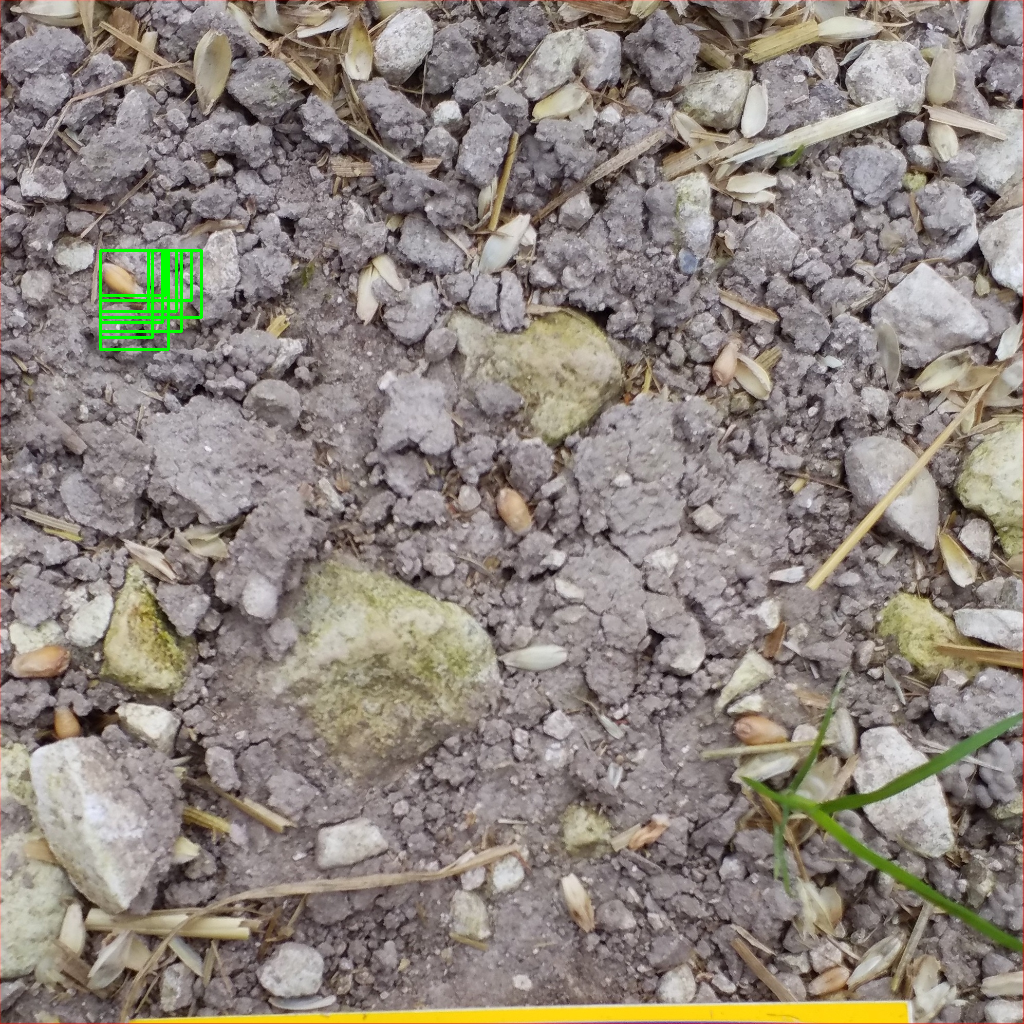

Plotted Anchor Boxes.


In [ ]:
import sys
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as pyplot #change all variable names
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img_path = "dataset/training_set/66c5db93-0000000.jpg"
log_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/'
anchors_path = log_dir+"yolo_anchors.txt"

def draw_boxes(img_path, anchors_path):
    color = (0, 255, 0)
    box_info = get_anchors(anchors_path)
    print(box_info)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH))
    for box in box_info:
        # x1,y1 = 193,512
        x1,y1 = 100,250
        x2,y2 = box[0]+x1,box[1]+y1
        img = cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)
    cv2_imshow(img)
    # cv2.waitKey(5000)
    cv2.imwrite("anchor_boxes_plot.jpg", img)
    print("Plotted Anchor Boxes.")


def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    # [10.0, 13.0, 16.0, 30.0, 33.0, 23.0, 30.0, 61.0, 62.0, 45.0, 59.0, 119.0, 116.0, 90.0, 156.0, 198.0, 373.0, 326.0]
    anchors = [int(x) for x in anchors.split(',')]
    # >>> anchors
    # array([[ 10.,  13.],
    #        [ 16.,  30.],
    #        [ 33.,  23.],
    #        [ 30.,  61.],
    #        [ 62.,  45.],
    #        [ 59., 119.],
    #        [116.,  90.],
    #        [156., 198.],
    #        [373., 326.]])
    return np.array(anchors).reshape(-1, 2)

draw_boxes(img_path, anchors_path)

In [ ]:
#!rm dataset/training_set/66c5db93-0000000.jpg

In [ ]:
!ls dataset//
# !ls '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/yolo_anchors.txt'
!ls '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/'

classes.txt			     training_data1.zip
test_annotations_normalised.txt      training_data2.zip
test_annotations_rescaled.txt	     training_set
test_annotations.txt		     validation_annotations_normalised.txt
test_data.zip			     validation_annotations.txt
test_set			     validation_data.zip
training_annotations_normalised.txt  validation_set
training_annotations.txt
ep003-loss79.279-val_loss46.857.h5	     train
ep021-loss55.350-val_loss36.115.h5	     trained_weights_final.h5
events.out.tfevents.1596657622.c95cfed26e36  trained_weights_final.json
events.out.tfevents.1596659187.c95cfed26e36  validation
log_acc_layer2.txt			     yolo_anchors.txt


### Training

In [ ]:
def inspect_conv_layers(model):
  print("Model Conv layers")
  j = 0
  for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    # print(layer," ", layer.name)
    if 'Conv2D' not in str(layer):
      continue
    # summarize output shape
    j += 1
    print(j, i, str(layer),layer.name, layer.input, layer.output.shape)

In [ ]:
"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.models import load_model
from livelossplot import PlotLossesKeras
import numpy
from keras.layers import Dropout
import tensorflow as tf
import keras.losses
import time

def train_data():
    start_time = time.process_time()
    # './export/_annotations.txt'
    training_annotation_path = 'dataset/training_annotations_normalised.txt'
    validation_annotation_path = 'dataset/validation_annotations_normalised.txt'
    # log_dir = 'logs/000/'
    log_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/'
    # './export/_annotations.txt'
    classes_path = '/content/dataset/classes.txt'
    anchors_path = log_dir+'yolo_anchors.txt'
    num_epoch_layer1 = 100
    num_epoch_layer2 = 150
    file =log_dir+"log_acc_layer1.txt"
    file2 =log_dir+"log_acc_layer2.txt"
    # model_path = 'model_data/7thjune/trained_weights_stage_1.h5'
    # model_path = log_dir+'ep081-loss7.194-val_loss7.207.h5'
    # model_path = log_dir+'trained_weights_final.h5'
    model_path = 'model_data/yolo.h5'


    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)
    num_anchors = len(anchors)
    # input_shape = (416,416) # multiple of 32, hw
    input_shape = (INPUT_IMG_HEIGHT,INPUT_IMG_WIDTH) # multiple of 32, hw

    is_tiny_version = False#len(anchors)==6 # default setting
    if is_tiny_version:
        model_path = '/content/model_data/tiny_yolo_weights.h5'
        anchors_path = '/content/dataset/yolo_anchors.txt'
        anchors = get_anchors(anchors_path)
        num_anchors = len(anchors)
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=0, weights_path=model_path)
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=0, weights_path=model_path) # make sure you know what you freeze
        # model = load_existing_model(model_path, num_anchors, num_classes)
        # model = model.add(Dropout(0.2, input_shape=image_input))

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2
    with open(training_annotation_path) as f1:
        training_data = f1.readlines()
    with open(validation_annotation_path) as f2:
        validation_data = f2.readlines()
    num_train = int(len(training_data))
    num_val = int(len(validation_data))
    # num_train = len(lines) - num_val
    
    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.

    if False:
        # model.compile(optimizer=RMSprop(lr=1e-3,rho=0.9, epsilon=1e-07), loss={'yolo_loss': lambda y_true, y_pred: y_pred}, metrics=['accuracy'])
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred}, metrics=['accuracy'])
        # model.compile(optimizer=Adam(lr=1e-3), loss='mean_squared_error', metrics=['accuracy', 'mean_squared_error'])

        batch_size = 16
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        hist = model.fit_generator(data_generator_wrapper(training_data[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(validation_data[:num_val], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=num_epoch_layer1,
                initial_epoch=81,
                callbacks=[logging, checkpoint, PlotLossesKeras()])
        with open(file,'a') as f:
            f.write("{}\n".format(hist.history))
        print("\nPrinting history: ", hist.history)
        model_json = model.to_json()
        with open(log_dir +"trained_weights_stage_1.json", "w") as json_file:
            json_file.write(model_json)
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')
        print("layer1: ",len(model.layers))
        model.summary()

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        print("layer 0:", len(model.layers))
        inspect_conv_layers(model)
        print(model.summary())
        # for i in range(len(model.layers)):
        #     print(i, model.layers[i])
        #     model.layers[i].trainable = True

        
        # model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        # model.compile(optimizer=Adam(lr=1e-3), loss={
        #     # use custom yolo_loss Lambda layer.
        #     'yolo_loss': lambda y_true, y_pred: y_pred})
      
        # model.compile(optimizer=RMSprop(lr=0.001,rho=0.9, epsilon=1e-07), loss={'yolo_loss': lambda y_true, y_pred: y_pred}, metrics=['accuracy'])
        # model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error']) # recompile to apply the change
        # model.compile(optimizer=Adam(lr=1e-3), loss='mean_squared_error', metrics=['accuracy', 'mean_squared_error'])

        # model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}, metrics=['accuracy', 'mean_squared_error']) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 1 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        hist = model.fit_generator(data_generator_wrapper(training_data[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(validation_data[:num_val], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=num_epoch_layer2,
            initial_epoch=0,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping, PlotLossesKeras()])
        # hist = model.fit_generator(data_generator_wrapper(training_data[:num_train], batch_size, input_shape, anchors, num_classes),
        #     steps_per_epoch=max(1, num_train//batch_size),
        #     validation_data=data_generator_wrapper(validation_data[:num_val], batch_size, input_shape, anchors, num_classes),
        #     validation_steps=max(1, num_val//batch_size),
        #     epochs=num_epoch_layer2,
        #     initial_epoch=50,
        #     callbacks=[logging, checkpoint])
        elapsed_time = time.process_time() - start_time
        print("Stage 2: ",elapsed_time, " seconds")
        with open(file2,'a') as f:
            f.write("{}\n".format(hist.history))
            f.write("Elapsed time stage 2: {} seconds".format(elapsed_time))
        # print("\nPrinting history: ", hist.history)

        # loss_history = hist.history["loss"]
        # numpy_loss_history = numpy.array(loss_history)
        # numpy.savetxt("layer2_loss_history.txt", numpy_loss_history, delimiter=",")

        # acc_history = hist.history["acc"]
        # numpy_acc_history = numpy.array(acc_history)
        # numpy.savetxt("layer2_acc_history.txt", numpy_acc_history, delimiter=",")

        # val_acc_history = hist.history["val_acc"]
        # numpy_acc_history = numpy.array(val_acc_history)
        # numpy.savetxt("layer2_val_acc_history.txt", numpy_acc_history, delimiter=",")

        # val_loss_history = hist.history["val_loss"]
        # numpy_loss_history = numpy.array(val_loss_history)
        # numpy.savetxt("layer2_val_loss_history.txt", numpy_loss_history, delimiter=",")
        model_json = model.to_json()
        with open(log_dir + "trained_weights_final.json", "w") as json_file:
            json_file.write(model_json)
        model.save_weights(log_dir + 'trained_weights_final.h5')
        print("layer2: ",len(model.layers))

        model.summary()

    # Further training if needed.

def load_existing_model(model_path, num_anchors, num_classes):
    # model = load_model(model_path, compile=False)
    # load_model(model_path, compile=False)
    # loaded_model = load_model(
    #     log_dir + 'trained_weights_stage_1.h5',
    #     custom_objects=None,
    #     compile=True
    # )
    # model = load_model(log_dir + 'trained_weights_stage_1.h5', custom_objects={'AttentionLayer': AttentionLayer})

    # summarize model.
    # model.summary()
    # class_names = get_classes(classes_path)
    # num_classes = len(class_names)
    # anchors = get_anchors(anchors_path)
    # num_anchors = len(anchors)
    model = 5
    try:
        model = load_model(model_path)
    except:
        model = yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
        model.load_weights(model_path) # make sure model, anchors and classes match
    # else:
        # assert yolo_model.layers[-1].output_shape[-1] == \
            # num_anchors/len(yolo_model.output) * (num_classes + 5), \
            # 'Mismatch between model and given anchor and class sizes'
    model.summary()
    return model

def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    # [10.0, 13.0, 16.0, 30.0, 33.0, 23.0, 30.0, 61.0, 62.0, 45.0, 59.0, 119.0, 116.0, 90.0, 156.0, 198.0, 373.0, 326.0]
    anchors = [float(x) for x in anchors.split(',')]
    # >>> anchors
    # array([[ 10.,  13.],
    #        [ 16.,  30.],
    #        [ 33.,  23.],
    #        [ 30.,  61.],
    #        [ 62.,  45.],
    #        [ 59., 119.],
    #        [116.,  90.],
    #        [156., 198.],
    #        [373., 326.]])
    return np.array(anchors).reshape(-1, 2)

def create_model(input_shape, anchors, num_classes, load_pretrained=False, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, 3))
    h, w = input_shape
    num_anchors = len(anchors)
    # >>> y = [(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], num_anchors//3, num_classes+5) for l in range(3)]
    # >>> y
    # [(13, 13, 3, 6), (26, 26, 3, 6), (52, 52, 3, 6)]
    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo3_efficientnet_body(image_input, num_anchors//3, num_classes)
    print(model_body.summary())
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))
    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        print('Total number of layers {}.'.format(len(model_body.layers)))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))
    
    print("Inside model here:")
    label_smoothing=0
    # model_loss = Lambda(yolo3_loss, name='yolo_loss',arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5, 'label_smoothing': label_smoothing})([*model_body.output, *y_true])
        
    # model_loss = Lambda(yolo_loss_original, output_shape=(1,), name='yolo_loss',
        # arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})([*model_body.output, *y_true])
    
    # model_loss, location_loss, confidence_loss, class_loss  = Lambda(yolo3_loss, output_shape=(1,), name='yolo_loss',
    #     arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})([*model_body.output, *y_true])

    model_loss = Lambda(yolo3_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})([*model_body.output, *y_true])

    model = Model([model_body.input, *y_true], model_loss)
    # loss_dict = {'location_loss':location_loss, 'confidence_loss':confidence_loss, 'class_loss':class_loss}
    # add_metrics(model, loss_dict)
    model.compile(optimizer=Adam(lr=1e-3), loss={
        # use custom yolo_loss Lambda layer.
        'yolo_loss': lambda y_true, y_pred: y_pred}, metrics=['accuracy'])

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    label_smoothing=0
    # model_loss = Lambda(yolo3_loss, name='yolo_loss',arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5, 'label_smoothing': label_smoothing})([*model_body.output, *y_true])
        
    # model_loss, location_loss, confidence_loss, class_loss = Lambda(yolo_loss_original, output_shape=(1,), name='yolo_loss',
        # arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})([*model_body.output, *y_true])
    
    model_loss  = Lambda(yolo3_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})([*model_body.output, *y_true])

    model = Model([model_body.input, *y_true], model_loss)
    # loss_dict = {'location_loss':location_loss, 'confidence_loss':confidence_loss, 'class_loss':class_loss}
    # add_metrics(model, loss_dict)
    model.compile(optimizer=Adam(lr=1e-3), loss={
        # use custom yolo_loss Lambda layer.
        'yolo_loss': lambda y_true, y_pred: y_pred}, metrics=['accuracy'])

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=False)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        # print(image_data, *y_true, np.zeros(batch_size))
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)



In [ ]:
#K.clear_session()
#train_data()

In [ ]:
#!rm -r "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/"
!ls "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/"
#!cp logs/000/trained_weights_stage_1.h5 /content/gdrive/My Drive/CNHIinternship/
#!cp logs/000/trained_weights_final.h5 /content/gdrive/My Drive/CNHIinternship/

ep003-loss79.279-val_loss46.857.h5	     train
ep021-loss55.350-val_loss36.115.h5	     trained_weights_final.h5
events.out.tfevents.1596657622.c95cfed26e36  trained_weights_final.json
events.out.tfevents.1596659187.c95cfed26e36  validation
log_acc_layer2.txt			     yolo_anchors.txt


### Visualising Convnets

In [ ]:
log_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/000/'
  # './export/_annotations.txt'
classes_path = '/content/dataset/classes.txt'
anchors_path = log_dir+'yolo_anchors.txt'
model_path = log_dir+'trained_weights_final.h5'
classes_path = '/content/dataset/classes.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)
num_anchors = len(anchors)
input_shape = (INPUT_IMG_HEIGHT,INPUT_IMG_WIDTH) 
model = create_model(input_shape, anchors, num_classes, freeze_body=0, weights_path=model_path)





Tensor("input_1:0", shape=(?, 1024, 1024, 3), dtype=float32)








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
44113920/44107200 [==============================] - 2s 0us/step
backbone layers number: 382
backbone layers number: 382
Tensor("top_activation/IdentityN:0", shape=(?, 32, 32, 1536), dtype=float32) Tensor("block6a_expand_activation/IdentityN:0", shape=(?, 64, 64, 816), dtype=float32) Tensor("block4a_expand_activation/IdentityN:0", shape=(?, 128, 128, 288), dtype=float32) 1536 816 288


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2

In [ ]:
j = 0
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'Conv2D' not in str(layer):
		continue
	# summarize output shape
	j += 1
	print(j, i, str(layer),layer.name, layer.input, layer.output.shape)

1 2 <keras.layers.convolutional.Conv2D object at 0x7f01c3f77400> stem_conv Tensor("stem_conv_pad/Pad:0", shape=(?, 1025, 1025, 3), dtype=float32) (?, 512, 512, 40)
2 5 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f01c3fd5f28> block1a_dwconv Tensor("stem_activation/IdentityN:0", shape=(?, 512, 512, 40), dtype=float32) (?, 512, 512, 40)
3 10 <keras.layers.convolutional.Conv2D object at 0x7f01c3fea320> block1a_se_reduce Tensor("block1a_se_reshape/Reshape:0", shape=(?, 1, 1, 40), dtype=float32) (?, 1, 1, 10)
4 11 <keras.layers.convolutional.Conv2D object at 0x7f01c400d9b0> block1a_se_expand Tensor("block1a_se_reduce/IdentityN:0", shape=(?, 1, 1, 10), dtype=float32) (?, 1, 1, 40)
5 13 <keras.layers.convolutional.Conv2D object at 0x7f01c40badd8> block1a_project_conv Tensor("block1a_se_excite/mul:0", shape=(?, 512, 512, 40), dtype=float32) (?, 512, 512, 24)
6 15 <keras.layers.convolutional.DepthwiseConv2D object at 0x7f01c40d5eb8> block1b_dwconv Tensor("block1a_project_bn/cond/Mer

In [ ]:
l_num = len(model.layers) -5
print(l_num)
print(model.output)
# redefine model to output right after the first hidden layer
modelp = Model(inputs=model.layers[0].input, outputs=model.layers[l_num].output)
print(len(modelp.layers))
print(len(modelp.layers))
print(modelp.summary())

448
Tensor("yolo_loss/ExpandDims_3:0", shape=(1,), dtype=float32)
441
441
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 1025, 1025, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 512, 512, 40) 1080        stem_conv_pad[0][0]              
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 512, 512, 40) 160         stem_conv[0][0]                  
___________________________________

In [ ]:
l_num = len(modelp.layers) - 1
print(len(modelp.layers))
print(modelp.layers[0].input)
print(modelp.layers[l_num].input)
print(modelp.layers[l_num].output)

441
Tensor("input_1:0", shape=(?, 1024, 1024, 3), dtype=float32)
Tensor("leaky_re_lu_20/LeakyRelu:0", shape=(?, 128, 128, 288), dtype=float32)
Tensor("predict_conv_3/BiasAdd:0", shape=(?, 128, 128, 18), dtype=float32)


In [ ]:
from keras.preprocessing.image import load_img

test_img = "/content/dataset/test_set/031557d8-0000000.jpg"

# load the image with the required shape
img = load_img(test_img, target_size=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH))

from keras.preprocessing.image import img_to_array
from numpy import expand_dims

# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print(img.shape)

boxed_image = load_img(test_img, target_size=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH))
image_data = np.array(boxed_image, dtype='float32')

print(image_data.shape)
image_data /= 255.
image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
print(image_data.shape)


(1, 1024, 1024, 3)
(1024, 1024, 3)
(1, 1024, 1024, 3)


In [ ]:
feature_maps = modelp.predict(image_data)
print(feature_maps[0, :, :, 1-1].shape)
print(feature_maps.shape[-1])
print(len(feature_maps[0,:,:,:]))
# print(np.reshape(feature_maps, (2,2, 1)))
# print(len(np.flip(feature_maps, 0)))

(128, 128)
18
128


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
img = load_img(test_img, target_size=(INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH))

plt.imshow(img)
plt.show()

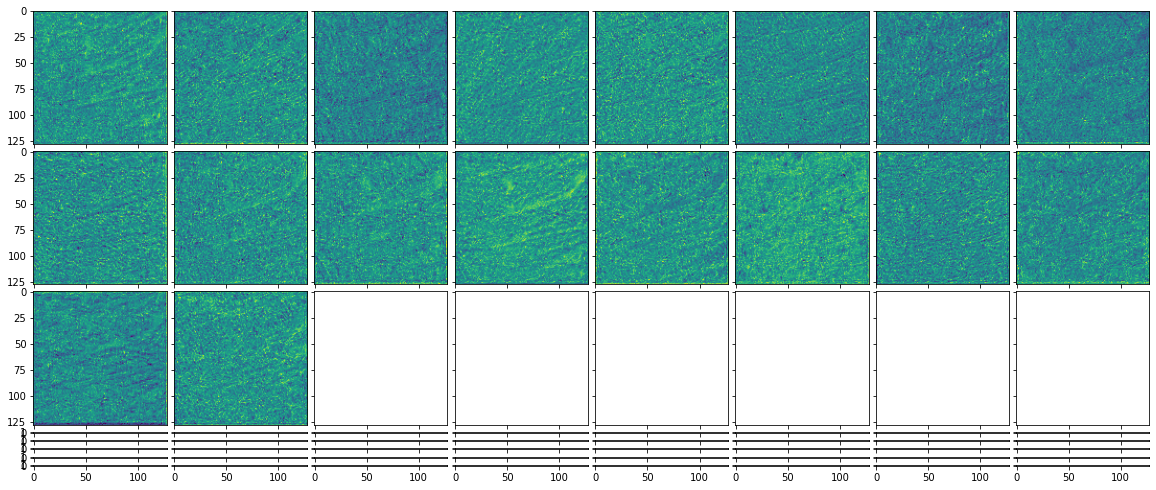

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
%matplotlib inline
# im1 = np.arange(100).reshape((10, 10))
# im2 = im1.T
# im3 = np.flipud(im1)
# im4 = np.fliplr(im2)

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
i=1
max_num = feature_maps.shape[-1]
for ax, im in zip(grid, range(0, max_num)):
    # Iterating over the grid returns the Axes.
    ax.imshow(feature_maps[0, :, :, i-1], cmap='viridis')
    i += 1

plt.show()

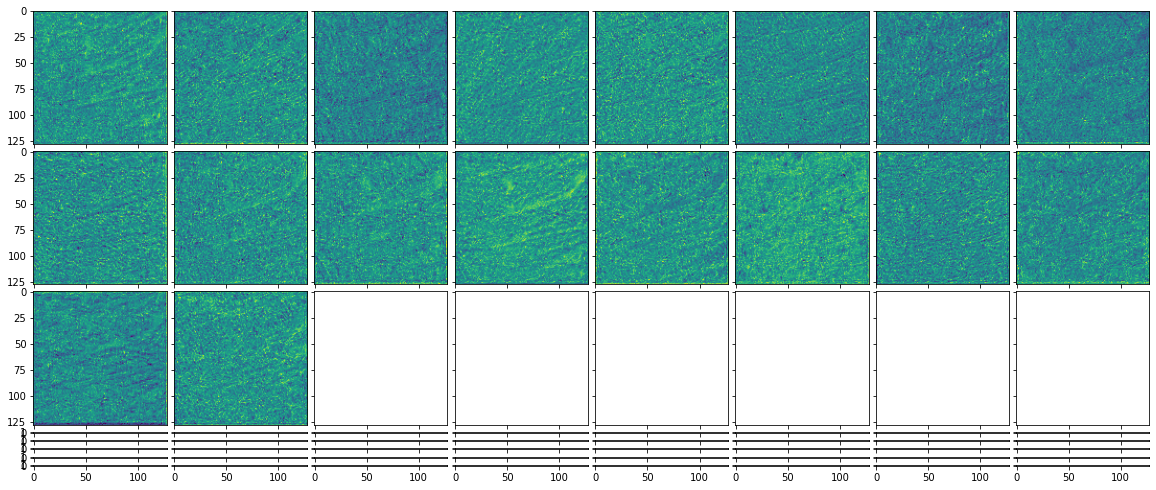

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
%matplotlib inline
# im1 = np.arange(100).reshape((10, 10))
# im2 = im1.T
# im3 = np.flipud(im1)
# im4 = np.fliplr(im2)

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
i=1
max_num = feature_maps.shape[-1]
for ax, im in zip(grid, range(0, max_num)):
    # Iterating over the grid returns the Axes.
    ax.imshow(feature_maps[0, :, :, i-1], cmap='viridis')
    i += 1

plt.show()

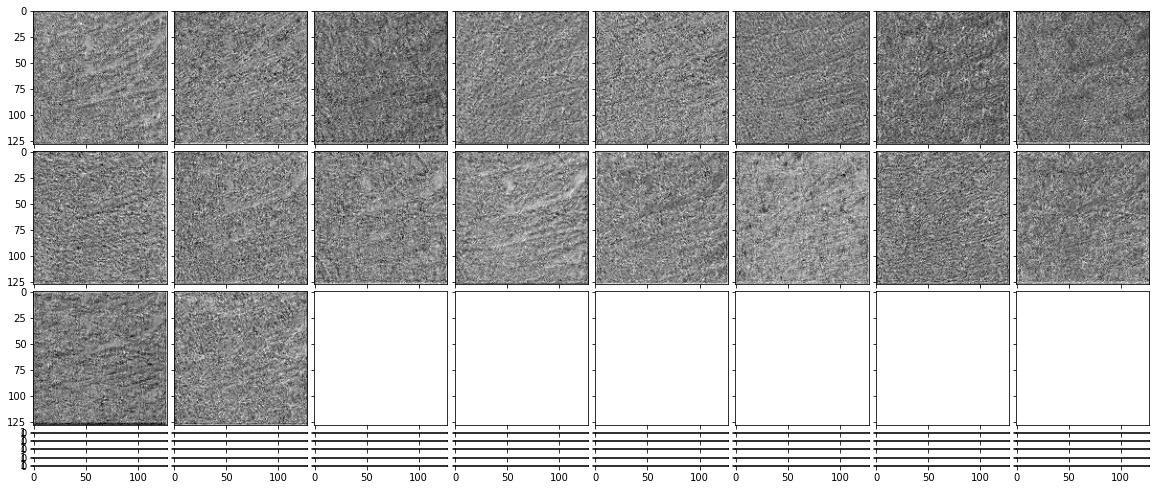

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
%matplotlib inline
# im1 = np.arange(100).reshape((10, 10))
# im2 = im1.T
# im3 = np.flipud(im1)
# im4 = np.fliplr(im2)

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
i=1
max_num = feature_maps.shape[-1]
for ax, im in zip(grid, range(0, max_num)):
    # Iterating over the grid returns the Axes.
    ax.imshow(feature_maps[0, :, :, i-1], cmap='gray')
    i += 1

plt.show()

In [ ]:
print(model.layers[448].output)

Tensor("predict_conv_3/BiasAdd:0", shape=(?, 128, 128, 18), dtype=float32)


In [ ]:
from keras import backend as K

# layer_name = 'conv2d_175'
layer_num = 447
filter_index = 0

layer_output = model.layers[layer_num].output
print("layer_output: ", layer_output)
loss = K.mean(layer_output[:, :, :, filter_index])

m_input = model.layers[0].input
# The call to `gradients` returns a list of tensors (of size 1 in this case)
# hence we only keep the first element -- which is a tensor.
grads = K.gradients(loss, m_input)[0]

# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

print(grads)

iterate = K.function([m_input], [loss, grads])

# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, INPUT_IMG_HEIGHT, INPUT_IMG_WIDTH, 3))])

input_img_data = np.random.random((1, INPUT_IMG_HEIGHT, INPUT_IMG_HEIGHT, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=INPUT_IMG_HEIGHT):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    # layer_output = model.get_layer(layer_name).output
    layer_output = model.layers[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, m_input)[0]

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([m_input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)




layer_output:  Tensor("predict_conv_2/BiasAdd:0", shape=(?, 64, 64, 18), dtype=float32)
Tensor("truediv:0", shape=(?, 1024, 1024, 3), dtype=float32)


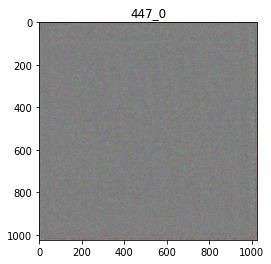

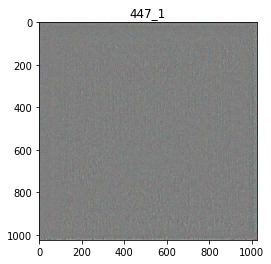

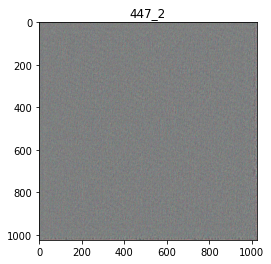

KeyboardInterrupt: ignored

In [ ]:
# layer_name = 'conv2d_135'
layer_name = 447

for i in range(64):
  plt.imshow(generate_pattern(layer_name, i))
  plt.title("{}_{}".format(layer_name, i))
  plt.show()


In [ ]:
# layer_name = 'conv2d_135'
layer_name = 328

for i in range(64):
  plt.imshow(generate_pattern(layer_name, i))
  plt.title("{}_{}".format(layer_name, i))
  plt.show()


In [ ]:
# layer_name = 'conv2d_135'
layer_name = 200

for i in range(64):
  plt.imshow(generate_pattern(layer_name, i))
  plt.title("{}_{}".format(layer_name, i))
  plt.show()


In [ ]:
# layer_name = 'conv2d_135'
layer_name = 150

for i in range(64):
  plt.imshow(generate_pattern(layer_name, i))
  plt.title("{}_{}".format(layer_name, i))
  plt.show()


### Generate Ground Truths for No Tiles

In [ ]:
import cv2

test_file = "dataset/test_annotations.txt"
dataType="test"
final_imgs = "dataset/".format(dataType)
main_dir = "/content/gdrive/My Drive/CNHIinternship/"
gt_dir = main_dir+'test_txt_ground_truths_notiles/'

def read_img_paths_gt(file, labeldirectory, dataType):
    with open(file) as fp:
        fp.seek(0, 0)
        line = fp.readline()
        i = 0
        while line:
          i += 1
          data = line.strip().split(" ")
          imgName = data[0].split("/").pop().replace('.jpg', '.txt')
          print(imgName)
          f = open(labeldirectory+imgName,"a")
          for boxes in data[1:]:
              box_str = "wheat"
              box_info = boxes.split(',')
              x1 = int(box_info[0])
              y1 = int(box_info[1])
              x2 = int(box_info[2])
              y2 = int(box_info[3])
              box_str += " " + (' ').join(box_info[:-1])
  #             image_paths.append(origDirectory+line.strip())
              print(box_str)
              f.write(box_str+"\n")
          # if i == 2:
          #   print(line)
          #   img = draw_ground_truths(line)
          #   cv2.imwrite("/content/test-gt.jpg", img)
          line = fp.readline()
        
#read_img_paths_gt(test_file, gt_dir, "test")
# print(imagePaths[1], len(imagePaths))

### Detection Code

In [ ]:
font_dir = '/content/dataset/font'
if not os.path.isdir(font_dir):
  os.makedirs(font_dir)

os.chdir(font_dir)

!wget https://github.com/qqwweee/keras-yolo3/blob/master/font/FiraMono-Medium.otf?raw=true
!wget https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/font/SIL%20Open%20Font%20License.txt

os.chdir('/content')

--2020-08-06 02:42:18--  https://github.com/qqwweee/keras-yolo3/blob/master/font/FiraMono-Medium.otf?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/qqwweee/keras-yolo3/raw/master/font/FiraMono-Medium.otf [following]
--2020-08-06 02:42:18--  https://github.com/qqwweee/keras-yolo3/raw/master/font/FiraMono-Medium.otf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/font/FiraMono-Medium.otf [following]
--2020-08-06 02:42:18--  https://raw.githubusercontent.com/qqwweee/keras-yolo3/master/font/FiraMono-Medium.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

In [ ]:
# -*- coding: utf-8 -*-
"""
Class definition of YOLO_v3 style detection model on image and video
"""

import colorsys
import os
from timeit import default_timer as timer
import time
import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.layers import Input
from PIL import Image, ImageFont, ImageDraw

# from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
# from yolo3.utils import letterbox_image
import os
from keras.utils import multi_gpu_model
# INPUT_IMG_HEIGHT = 704
# INPUT_IMG_WIDTH = 704

# INPUT_IMG_HEIGHT = 768
# INPUT_IMG_WIDTH = 768

from PIL import Image
import cv2
import numpy as np
from timeit import default_timer as timer
import time
import matplotlib.pyplot as plt


class YOLO(object):
    _defaults = {
        "model_path": '8',
        "anchors_path": 'yolo_anchors.txt',
        "classes_path": 'grains-new-data/classes.txt',
        "score" : 0.1,
        "iou" : 0.45, #0.45, 0.3
        "model_image_size" : (INPUT_IMG_HEIGHT,INPUT_IMG_WIDTH),
        "gpu_num" : 1,
    }

    @classmethod
    def get_defaults(cls, n):
        if n in cls._defaults:
            return cls._defaults[n]
        else:
            return "Unrecognized attribute name '" + n + "'"

    def __init__(self, **kwargs):
        print(kwargs)
        self.__dict__.update(self._defaults) # set up default values
        self.__dict__.update(kwargs) # and update with user overrides
        self.class_names = self._get_class()
        self.anchors = self._get_anchors()
        self.sess = K.get_session()
        self.boxes, self.scores, self.classes = self.generate()

    def _get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def _get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def generate(self):
        print(self.model_path)
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        # Load model, or construct model and load weights.
        num_anchors = len(self.anchors)
        print("num_anchors: ",num_anchors)
        num_classes = len(self.class_names)
        is_tiny_version = False#num_anchors==6 # default setting
        print("Session: ", self.sess)
        try:
            self.yolo_model = yolo3_efficientnet_body(Input(shape=(INPUT_IMG_HEIGHT,INPUT_IMG_HEIGHT,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path)
        except:
            self.yolo_model = tiny_yolo_body(Input(shape=(INPUT_IMG_HEIGHT,INPUT_IMG_HEIGHT,3)), num_anchors//2, num_classes) \
                if is_tiny_version else print("Hello")#yolo_body_res(Input(shape=(None,None,3)), num_anchors//3, num_classes)
            self.yolo_model = yolo3_efficientnet_body(Input(shape=(INPUT_IMG_HEIGHT,INPUT_IMG_HEIGHT,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path)
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == \
                num_anchors/len(self.yolo_model.output) * (num_classes + 5), \
                'Mismatch between model and given anchor and class sizes'

        print("YOLO DETECTION SUMMARY: \n",self.yolo_model.summary())
        # print(self.yolo_model.output)
        # print(self.yolo_model.layers[152].output)
        # print(self.yolo_model.layers[92].output)
        print('{} model, anchors, and classes loaded.'.format(model_path))

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))
        np.random.seed(10101)  # Fixed seed for consistent colors across runs.
        np.random.shuffle(self.colors)  # Shuffle colors to decorrelate adjacent classes.
        np.random.seed(None)  # Reset seed to default.

        # Generate output tensor targets for filtered bounding boxes.
        self.input_image_shape = K.placeholder(shape=(2, ))
        if self.gpu_num>=2:
            self.yolo_model = multi_gpu_model(self.yolo_model, gpus=self.gpu_num)
        boxes, scores, classes = yolo_eval(self.yolo_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score, iou_threshold=self.iou)
        return boxes, scores, classes

    # def detect_multiple_images(self, img_path, output_folder, filename):
    #     with open(filename) as file_pointer:
    #     i = 1
    #     file_pointer.seek(0, 0)
    #     line = file_pointer.readline()
    #     while line:
    #       img_name = line.strip()
    #       image = img_path+line.strip()
    #       print("Generating results for {} data".format(image))
    #       output="{}/{}".format(output_folder, img_name)
    #       detect_img(yolo, image, output)
    #       line = file_pointer.readline()

    def do_custom_test(model, r_image):
        image = np.array(r_image)
        print(image)
        print(np.argmax(image[0]))
        print(model.output)
        african_elephant_output = model.output[:, 579]

	# The is the output feature map of the `block5_conv3` layer,
	# the last convolutional layer in VGG16
        last_conv_layer = model.get_layer('conv2d_202')

	# This is the gradient of the "african elephant" class with regard to
	# the output feature map of `block5_conv3`
        grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

	# This is a vector of shape (512,), where each entry
	# is the mean intensity of the gradient over a specific feature map channel
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

	# This function allows us to access the values of the quantities we just defined:
	# `pooled_grads` and the output feature map of `block5_conv3`,
	# given a sample image
        iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

	# These are the values of these two quantities, as Numpy arrays,
	# given our sample image of two elephants
        pooled_grads_value, conv_layer_output_value = iterate([x])

	# We multiply each channel in the feature map array
	# by "how important this channel is" with regard to the elephant class
        for i in range(512):
        	conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

	# The channel-wise mean of the resulting feature map
	# is our heatmap of class activation
        heatmap = np.mean(conv_layer_output_value, axis=-1)
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
        plt.matshow(heatmap)
        plt.show()

    def detect_image(self, image):
        start = timer()
        start_time = time.process_time()
        initial_start_time = time.time()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0]%32 == 0, 'Multiples of 32 required'
            assert self.model_image_size[1]%32 == 0, 'Multiples of 32 required'
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (image.width - (image.width % 32),
                              image.height - (image.height % 32))
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype='float32')

        print(image_data.shape)
        image_data /= 255.
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

        out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                K.learning_phase(): 0
            })
        # do_custom_test(self.yolo_model, image)

        print('Found {} boxes for {}'.format(len(out_boxes), 'img'))

        font = ImageFont.truetype(font='/content/dataset/font/FiraMono-Medium.otf?raw=true',
                    size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
        thickness = (image.size[0] + image.size[1]) // 300

        box_info = []
        for i, c in reversed(list(enumerate(out_classes))):
            predicted_class = self.class_names[c]
            box = out_boxes[i]
            score = out_scores[i]

            label = '{} {:.2f}'.format(predicted_class, score)
            draw = ImageDraw.Draw(image)
            label_size = draw.textsize(label, font)
            print(box)
            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            print(label, (left, top), (right, bottom))
            obj = {"class_name": predicted_class, "score": score, "x1y1": (left, top), "x2y2": (right, bottom)}
            box_info.append(obj)
            if top - label_size[1] >= 0:
                text_origin = np.array([left, top - label_size[1]])
            else:
                text_origin = np.array([left, top + 1])

            # My kingdom for a good redistributable image drawing library.
            for i in range(thickness):
                draw.rectangle(
                    [left + i, top + i, right - i, bottom - i],
                    outline=self.colors[c])
            draw.rectangle(
                [tuple(text_origin), tuple(text_origin + label_size)],
                fill=self.colors[c])
            draw.text(text_origin, label, fill=(0, 0, 0), font=font)
            del draw

        end = timer()
        elapsed_time = time.process_time() - start_time
        print("Detection Time: ")
        print(end - start)
        print(elapsed_time, " seconds")
        print("Total Execution Time--- %s seconds ---" % (time.time() - initial_start_time))

        return image, box_info

    def close_session(self):
        self.sess.close()

def detect_video(yolo, video_path, output_path=""):
    import cv2
    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        raise IOError("Couldn't open webcam or video")
    video_FourCC    = int(vid.get(cv2.CAP_PROP_FOURCC))
    video_fps       = vid.get(cv2.CAP_PROP_FPS)
    video_size      = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
                        int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    isOutput = True if output_path != "" else False
    if isOutput:
        print("!!! TYPE:", type(output_path), type(video_FourCC), type(video_fps), type(video_size))
        out = cv2.VideoWriter(output_path, video_FourCC, video_fps, video_size)
    accum_time = 0
    curr_fps = 0
    fps = "FPS: ??"
    prev_time = timer()
    while True:
        return_value, frame = vid.read()
        image = Image.fromarray(frame)
        image = yolo.detect_image(image)
        result = np.asarray(image)
        curr_time = timer()
        exec_time = curr_time - prev_time
        prev_time = curr_time
        accum_time = accum_time + exec_time
        curr_fps = curr_fps + 1
        if accum_time > 1:
            accum_time = accum_time - 1
            fps = "FPS: " + str(curr_fps)
            curr_fps = 0
        cv2.putText(result, text=fps, org=(3, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.50, color=(255, 0, 0), thickness=1)
        cv2.namedWindow("result", cv2.WINDOW_NORMAL)
        cv2.imshow("result", result)
        if isOutput:
            out.write(result)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    yolo.close_session()


In [ ]:
import sys
import argparse
from PIL import Image
import cv2
import numpy as np
from timeit import default_timer as timer
import time
import matplotlib.pyplot as plt
import glob

def create(file):
    f = open(file,'a')
    return f

def improve_contrast_image_using_clahe2(bgr_image: np.array) -> np.array:
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(40, 40))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv = cv2.merge(hsv_planes)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def improve_contrast_image_using_clahe(bgr_image: np.array) -> np.array:
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(20, 20))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv = cv2.merge(hsv_planes)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def improve_contrast_image_using_clahe_tiles(bgr_image: np.array) -> np.array:
    hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    hsv_planes = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(10, 10))
    hsv_planes[2] = clahe.apply(hsv_planes[2])
    hsv = cv2.merge(hsv_planes)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def preprocess_image(pil_image):
    print("Preprocessing Time: ")
    start = timer()
    start_time = time.process_time()
    initial_start_time = time.time()
    opencvImage = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    arr = improve_contrast_image_using_clahe(opencvImage)
    arr = arr[:,:,::-1]
    PIL_image = Image.fromarray(arr.astype('uint8'), 'RGB')
    end = timer()
    elapsed_time = time.process_time() - start_time
    print(end - start)
    print(elapsed_time, " seconds")
    print("Total Execution Time--- %s seconds ---" % (time.time() - initial_start_time))
    return PIL_image


def detect_multiple_imgs(yolo, img_path, output_folder, filename):
    test_dir = "/content/dataset/test_set/"
    files = glob.glob(test_dir+"*.jpg")
    print(len(files))
    for idx, imageData in enumerate(files):
      print("\n\n\nGenerating results for {} data".format(imageData))
      a = imageData.split('/')
      testimageName = a[-1]#.split('.')[0]
      # testImage = cv2.imread(imageInfo)
      output="{}/{}".format(output_folder, testimageName)
      #detect Grains on the Split
      detect_img(yolo, imageData, output)
      # detect_img(yolo, idx, imageData)
            
    yolo.close_session()

# def detect_multiple_imgs(yolo, img_path, output_folder, filename):
#     with open(filename) as file_pointer:
#        i = 1
#        file_pointer.seek(0, 0)
#        line = file_pointer.readline()
#        initial_start_time2 = time.time()
#        while line:
#          img_name = line.strip()
#          image = img_path+line.strip()
#          print("Generating results for {} data".format(image))
#          output="{}/{}".format(output_folder, img_name)
#          detect_img(yolo, image, output)
#          i += 1
#          line = file_pointer.readline()
#        print("Average Detection Time--- %s seconds ---" % ((time.time() - initial_start_time2)/i))
#        yolo.close_session()

def detect_img(yolo, input_img, output_img):
    print(input_img, output_img)
    # img = input('Input image filename:')

    try:
        image = Image.open(input_img)
    except:
        print('Open Error! Try again!')
    else:
        #image = preprocess_image(image)
        r_image, box_info = yolo.detect_image(image)
        # img = cv2.cvtColor(r_image.numpy(), cv2.COLOR_RGB2BGR)
        # img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
        # cv2.imwrite("new_output.jpg", r_image)
        # logging.info('output saved to: {}'.format("new_output.jpg"))
        f_path = output_img.split(".jpg")[0]+".txt"
        f = create(f_path)
        print(box_info)
        for box in box_info:
            class_name = box['class_name']
            confidence = box["score"]
            x1 , y1=  box["x1y1"]
            x2 , y2=  box["x2y2"]
            f.write("{} {} {} {} {} {}\n".format(class_name,confidence,x1 , y1, x2 , y2))
        f.close()
        im1 = r_image.save(output_img) 
        # r_image.show()
    # yolo.close_session()

def custom_detect_img(yolo, input_img, output_img):
    print(input_img, output_img)
    # img = input('Input image filename:')

    try:
        image = Image.open(input_img)
    except:
        print('Open Error! Try again!')
    else:
        #image = preprocess_image(image)
        r_image, box_info, model = yolo.detect_image(image)
        image = np.array(r_image)
        print(image)
        print(np.argmax(image[0]))
        print(model.output)
        african_elephant_output = model.output[:, 579]

	# The is the output feature map of the `block5_conv3` layer,
	# the last convolutional layer in VGG16
        last_conv_layer = model.get_layer('conv2d_202')

	# This is the gradient of the "african elephant" class with regard to
	# the output feature map of `block5_conv3`
        grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

	# This is a vector of shape (512,), where each entry
	# is the mean intensity of the gradient over a specific feature map channel
        pooled_grads = K.mean(grads, axis=(0, 1, 2))

	# This function allows us to access the values of the quantities we just defined:
	# `pooled_grads` and the output feature map of `block5_conv3`,
	# given a sample image
        iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

	# These are the values of these two quantities, as Numpy arrays,
	# given our sample image of two elephants
        pooled_grads_value, conv_layer_output_value = iterate([x])

	# We multiply each channel in the feature map array
	# by "how important this channel is" with regard to the elephant class
        for i in range(512):
        	conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

	# The channel-wise mean of the resulting feature map
	# is our heatmap of class activation
        heatmap = np.mean(conv_layer_output_value, axis=-1)
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
        plt.matshow(heatmap)
        plt.show()

        # img = cv2.cvtColor(r_image.numpy(), cv2.COLOR_RGB2BGR)
        # img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
        # cv2.imwrite("new_output.jpg", r_image)
        # logging.info('output saved to: {}'.format("new_output.jpg"))
        f_path = output_img.split(".jpg")[0]+".txt"
        f = create(f_path)
        print(box_info)
        for box in box_info:
            class_name = box['class_name']
            confidence = box["score"]
            x1 , y1=  box["x1y1"]
            x2 , y2=  box["x2y2"]
            f.write("{} {} {} {} {} {}\n".format(class_name,confidence,x1 , y1, x2 , y2))
        f.close()
        im1 = r_image.save(output_img) 
        r_image.show()
    yolo.close_session()

FLAGS = None

# if __name__ == '__main__':
#     # class YOLO defines the default value, so suppress any default here
#     parser = argparse.ArgumentParser(argument_default=argparse.SUPPRESS)
#     '''
#     Command line options
#     '''
#     parser.add_argument(
#         '--model', type=str, dest='model_path',
#         help='path to model weight file, default ' + YOLO.get_defaults("model_path")
#     )

#     parser.add_argument('--filename', type=str, help='path to file, default ')

#     parser.add_argument( '--output_dir', type=str, help='path to output_dir, default ')

#     parser.add_argument( '--image_path', type=str, help='path to input img_dir, default ')

#     parser.add_argument(
#         '--anchors', type=str, dest='anchors_path',
#         help='path to anchor definitions, default ' + YOLO.get_defaults("anchors_path")
#     )

#     parser.add_argument(
#         '--classes', type=str, dest='classes_path',
#         help='path to class definitions, default ' + YOLO.get_defaults("classes_path")
#     )

#     parser.add_argument(
#         '--gpu_num', type=int,
#         help='Number of GPU to use, default ' + str(YOLO.get_defaults("gpu_num"))
#     )

#     parser.add_argument(
#         '--image', default=False, action="store_true",
#         help='Image detection mode, will ignore all positional arguments'
#     )
#     '''
#     Command line positional arguments -- for video detection mode
#     '''
#     parser.add_argument(
#         "--input", nargs='?', type=str,required=False,default='./path2your_video',
#         help = "Video input path"
#     )

#     parser.add_argument(
#         "--output", nargs='?', type=str, default="",
#         help = "[Optional] Video output path"
#     )

#     FLAGS = parser.parse_args()

    # if FLAGS.image:
    #     """
    #     Image detection mode, disregard any remaining command line arguments
    #     """
    #     print("Image detection mode")
    #     if "input" in FLAGS:
    #         print(" Ignoring remaining command line arguments: " + FLAGS.input + "," + FLAGS.output)
    #     #custom_detect_img(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output)
    #     detect_img(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output)
    #     #detect_multiple_imgs(YOLO(**vars(FLAGS)), FLAGS.image_path, FLAGS.output_dir, FLAGS.filename)
    # elif "input" in FLAGS:
    #     detect_video(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output)
    # else:
    #     print("Must specify at least video_input_path.  See usage with --help.")

In [ ]:

# param 1: file name 
# param 2-N: different block sizes

import sys
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as pyplot #change all variable names
import numpy as np


data_type = "test"
#img_path = "/home/sania/Documents/KULeuven/internship/CNHi%20Grain%20Loss%20App/common/dataPreProcessing/scripts/PythonFiles/cropped_images/new_data/{}_set/".format(data_type)
# main_dir = "/home/sania/Documents/KULeuven/internship/thesis-personal/"
main_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/'
img_path = "/content/dataset/{}_set/".format(data_type)
# img_path = "dataset/{}_set/".format(data_type)
output_folder=main_dir+"grains-output"
file_name = "/content/dataset/{}_image_names.txt".format(data_type)
#model_file = main_dir+"model_data/ep009-loss23.978-val_loss27.721_g_drive.h5"
model_file = main_dir+"000/trained_weights_final.h5"
# anchor_file = main_dir+"dataset/yolo_anchors.txt"
# model_file = main_dir+"000/trained_weights_stage_1.h5"
#model_file = "model_data/10thjune/ep065-loss45.931-val_loss62.601.h5"
#anchor_file = main_dir+"tiles-dataset/yolo_anchors.txt"
anchor_file = main_dir+"000/yolo_anchors.txt"
#anchor_file = "yolo_anchors.txt"
class_file = "/content/dataset/classes.txt"
output_dir="{}/{}".format(output_folder, data_type)

command=""
def detect_all_imgs():
  # with open(file_name) as file_pointer:
  #   i = 1
  #   file_pointer.seek(0, 0)
  #   line = file_pointer.readline()
  #   print("Generating results for {} data".format(data_type))
  #   while line:
  #     img_name = line.strip()
  #     image = img_path+line.strip()
  #     print("Image Name: ", image)
  #     # command = "python detect.py  --classes ./data/grains.names --num_classes 1 --weights ./checkpoints/epochs_100/yolov3_train.tf --image {} --output ./output/epochs_100/iou_0.75_score_0.4/val_data/{}".format(image, img_name)
  #     command = "python yolo_video.py --model={} --anchors={} --classes=/home/sania/Documents/KULeuven/internship/thesis-personal/dataset/classes.txt --image --input={} --output={}/{}/{}".format(model_file, anchor_file, image, output_folder, data_type, img_name)
  #     print(command)
  #     os.system(command)
  #     line = file_pointer.readline()
  #     i += 1

  FLAGS = {"model_path": model_file,
        "anchors_path": anchor_file,
        "classes_path": class_file,
        "score" : 0.1,
        "iou" : 0.7, #0.45, 0.3
        "model_image_size" : (INPUT_IMG_HEIGHT,INPUT_IMG_WIDTH),
        "gpu_num" : 1,
    }
  # FLAGS = "--model={} --anchors={} --classes=/home/sania/Documents/KULeuven/internship/thesis-personal/dataset/classes.txt --classes=grains-new-data/classes.txt --image --image_path={} --output_dir={}/{} --filename={}".format(model_file, anchor_file, img_path, output_folder, data_type, file_name)
  
  yolo = YOLO(**FLAGS)
  print(FLAGS)
  detect_multiple_imgs(yolo, img_path, output_dir, file_name)
  # command = "python yolo_video.py --model={} --anchors={} --classes=/home/sania/Documents/KULeuven/internship/thesis-personal/dataset/classes.txt --classes=grains-new-data/classes.txt --image --image_path={} --output_dir={}/{} --filename={}".format(model_file, anchor_file, img_path, output_folder, data_type, file_name)
  # os.system(command)
  print("Data is successfully detected.")

detect_all_imgs()

Streaming output truncated to the last 5000 lines.

Generating results for /content/dataset/test_set/98077ece-0000000.jpg data
/content/dataset/test_set/98077ece-0000000.jpg /content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test/98077ece-0000000.jpg
(1024, 1024, 3)
Found 11 boxes for img
[1315.9294 1236.6112 1397.3457 1292.4213]
wheat 0.10 (1237, 1316) (1292, 1397)
[474.72882 399.4698  538.62695 445.83994]
wheat 0.12 (399, 475) (446, 539)
[  -7.082925 1679.2815     30.942299 1733.735   ]
wheat 0.16 (1679, 0) (1734, 31)
[1403.4749 1075.2592 1496.5137 1127.5862]
wheat 0.16 (1075, 1403) (1128, 1497)
[1409.8209   377.1842  1519.0972   438.58838]
wheat 0.22 (377, 1410) (439, 1519)
[ 631.7646  1109.0186   685.18115 1186.2346 ]
wheat 0.26 (1109, 632) (1186, 685)
[ 761.7676  1453.6267   837.87714 1510.2505 ]
wheat 0.37 (1454, 762) (1510, 838)
[458.60144 397.01443 536.02454 465.0815 ]
wheat 0.45 (397, 459) (465, 536)
[1410.5465   953.89514 1473.8092  1041.0258 ]


In [ ]:
K.clear_session()

In [ ]:
# x=[1,2,3]
# max(x)
from functools import reduce

def Maximum(data):
    return reduce(lambda x, y: x if x > y else y, data)

print(Maximum([0, 8]))

def maximum(a, b): 
      
    if a >= b: 
        return a 
    else: 
        return b 

import python_utils
box = np.array([301.19922 ,  61.277466, 372.472 ,   191.0293  ])
# box = np.array([301.1 ,  61.2, 372.4 ,   191.0  ])
# box = np.array([301 ,  61, 372 ,   191  ])
# top = 301.19922
# r = top + 0.5
# print(r)

# top, left, bottom, right = 0,0,0,0
top, left, bottom, right = box
print(top, left, bottom, right)
print(maximum(0,8))
print("here:", (float(left)+0.5),maximum(0,np.floor(left + 0.5).astype('int32')), bottom, right)
# r1 = max(0, np.floor(r + 0.5).astype('int32'))
# r2 = max(0, np.floor(left + 0.5).astype('int32'))
top = maximum(0, np.floor(top + 0.5).astype('int32'))
left = maximum(0, np.floor(left + 0.5).astype('int32'))

#K.clear_session()
#!rm -r "/content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles/"
max = maximum

In [ ]:
#!rm -r '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test'
!ls "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test"
#!rm -r "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/"

In [ ]:
print(yolo_model.output)

In [ ]:
y_m = model
y_m.load_weights(model_path, by_name=True, skip_mismatch=True) 

In [ ]:
# print(y_m)
os.chdir("/content")

In [ ]:
num_anchors = len(anchors)
print(num_anchors/len(y_m.output) * (num_classes + 5))

In [ ]:
print(len(y_m.output),  y_m.layers[-1].output_shape[-1], num_anchors, num_classes)
assert y_m.layers[-1].output_shape[-1] == num_anchors/len(y_m.output) * (num_classes + 5), 'Mismatch between model and given anchor and class sizes'

In [ ]:
YOLO OUTPUT
[<tf.Tensor 'conv2d_59/BiasAdd:0' shape=(?, ?, ?, 18) dtype=float32>, <tf.Tensor 'conv2d_67/BiasAdd:0' shape=(?, ?, ?, 18) dtype=float32>, <tf.Tensor 'conv2d_75/BiasAdd:0' shape=(?, ?, ?, 18) dtype=float32>] 9 1 3 18

### Evaluation

In [ ]:
test_dir = '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test'
test_dir = test_dir
if not os.path.isdir(test_dir):
  os.makedirs(test_dir)

main_dir = '/content/gdrive/My Drive/CNHIinternship/'
gt_dir = main_dir+'test_txt_ground_truths_notiles'

if not os.path.isdir(gt_dir):
  os.makedirs(gt_dir)

dt_dir = main_dir+'logs_efficient_net_no_tiles/test_detections_yolo_keras'
if not os.path.isdir(dt_dir):
  os.makedirs(dt_dir)

In [ ]:
import os
import glob

prev_dir = "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test"

files = glob.glob(prev_dir+"/*.txt")
print(files)
print(len(files))

dt_dir = "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras"

files1 = glob.glob(dt_dir+"/*.txt")
print(files1)
print(len(files1))

files = glob.glob(gt_dir+"/*.txt")
print(files)
print(len(files))

f1 = []
f2 = []
j = 0
for f in files1:
  imgName = f.split("/").pop()
  f1.append(imgName)
  j += 1

j = 0
for f in files:
  imgName = f.split("/").pop()
  f2.append(imgName)
  j += 1

f1.sort()
f2.sort()

print(f1[76])
print(f2[76])

j = 0
for f in f1:
  # print(j)
  if (f1[j] != f2[j]):
    print(j, f1[j], f2[j])
  j += 1

[]
0
['/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/7b4ac898-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/dcaae853-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/a1dd2489-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/9ebd7eff-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/159299d8-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/72a0b094-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/c21e485f-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/6d3c08c5-0000000.txt', '/content/gdrive/My Drive/CNHIinternship/l

IndexError: ignored

In [ ]:
!rm "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras/83d2da07-0000000.txt"

In [ ]:
import glob
prev_dir = "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test"

os.chdir(prev_dir)
files = glob.glob("*.txt")
print(files)

!mv *.txt "../../test_detections_yolo_keras/"
dir = "/content"

os.chdir(dir)
!ls .

['7b4ac898-0000000.txt', 'dcaae853-0000000.txt', 'a1dd2489-0000000.txt', '9ebd7eff-0000000.txt', '159299d8-0000000.txt', '72a0b094-0000000.txt', 'c21e485f-0000000.txt', '6d3c08c5-0000000.txt', '3616c676-0000000.txt', '7c9d8cbd-0000000.txt', 'fd1629dd-0000000.txt', '9218edb1-0000000.txt', '4368545a-0000000.txt', 'add98e10-0000000.txt', '43348926-0000000.txt', 'a5ece960-0000000.txt', '409394e8-0000000.txt', '9b7a805e-0000000.txt', 'eec7fd49-0000000.txt', '5bb32705-0000000.txt', '43691f38-0000000.txt', 'e107d3fa-0000000.txt', 'f22582b8-0000000.txt', '07671c70-0000000.txt', '0c9aea9d-0000000.txt', '78318588-0000000.txt', '83d2da07-0000000.txt', '074aecfa-0000000.txt', '2523348f-0000000.txt', 'b5e21e5b-0000000.txt', '2c9ec5e3-0000000.txt', '9c69d6a4-0000000.txt', 'd8885d73-0000000.txt', 'e1e48628-0000000.txt', '0c5a59b1-0000000.txt', '7446074f-0000000.txt', '07dc2898-0000000.txt', 'ae368eb6-0000000.txt', 'de3d6c0d-0000000.txt', '9fc5b323-0000000.txt', '967deb49-0000000.txt', '1e5627cf-00000

In [ ]:
from enum import Enum

import cv2


class MethodAveragePrecision(Enum):
    """
    Class representing if the coordinates are relative to the
    image size or are absolute values.

        Developed by: Rafael Padilla
        Last modification: Apr 28 2018
    """
    EveryPointInterpolation = 1
    ElevenPointInterpolation = 2


class CoordinatesType(Enum):
    """
    Class representing if the coordinates are relative to the
    image size or are absolute values.

        Developed by: Rafael Padilla
        Last modification: Apr 28 2018
    """
    Relative = 1
    Absolute = 2


class BBType(Enum):
    """
    Class representing if the bounding box is groundtruth or not.

        Developed by: Rafael Padilla
        Last modification: May 24 2018
    """
    GroundTruth = 1
    Detected = 2


class BBFormat(Enum):
    """
    Class representing the format of a bounding box.
    It can be (X,Y,width,height) => XYWH
    or (X1,Y1,X2,Y2) => XYX2Y2

        Developed by: Rafael Padilla
        Last modification: May 24 2018
    """
    XYWH = 1
    XYX2Y2 = 2


# size => (width, height) of the image
# box => (X1, X2, Y1, Y2) of the bounding box
def convertToRelativeValues(size, box):
    dw = 1. / (size[0])
    dh = 1. / (size[1])
    cx = (box[1] + box[0]) / 2.0
    cy = (box[3] + box[2]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = cx * dw
    y = cy * dh
    w = w * dw
    h = h * dh
    # x,y => (bounding_box_center)/width_of_the_image
    # w => bounding_box_width / width_of_the_image
    # h => bounding_box_height / height_of_the_image
    return (x, y, w, h)


# size => (width, height) of the image
# box => (centerX, centerY, w, h) of the bounding box relative to the image
def convertToAbsoluteValues(size, box):
    # w_box = round(size[0] * box[2])
    # h_box = round(size[1] * box[3])
    xIn = round(((2 * float(box[0]) - float(box[2])) * size[0] / 2))
    yIn = round(((2 * float(box[1]) - float(box[3])) * size[1] / 2))
    xEnd = xIn + round(float(box[2]) * size[0])
    yEnd = yIn + round(float(box[3]) * size[1])
    if xIn < 0:
        xIn = 0
    if yIn < 0:
        yIn = 0
    if xEnd >= size[0]:
        xEnd = size[0] - 1
    if yEnd >= size[1]:
        yEnd = size[1] - 1
    return (xIn, yIn, xEnd, yEnd)


def add_bb_into_image(image, bb, color=(255, 0, 0), thickness=2, label=None):
    r = int(color[0])
    g = int(color[1])
    b = int(color[2])

    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    fontThickness = 1
    x1, y1, x2, y2 = bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
    # print(image)
    x1 = int(x1)
    y1 = int(y1)
    x2 = int(x2)
    y2 = int(y2)
    # cv2.rectangle(image, (x1,y1), (x2,y2), (255,0,0), 2)
    print("bb: {}, {}, {}, {}".format(x1,y1,x2,y2))
    cv2.rectangle(image, (x1, y1), (x2, y2), (b, g, r), thickness)
    # Add label
    if label is not None:
        # Get size of the text box
        (tw, th) = cv2.getTextSize(label, font, fontScale, fontThickness)[0]
        # Top-left coord of the textbox
        (xin_bb, yin_bb) = (x1 + thickness, y1 - th + int(12.5 * fontScale))
        # Checking position of the text top-left (outside or inside the bb)
        if yin_bb - th <= 0:  # if outside the image
            yin_bb = y1 + th  # put it inside the bb
        r_Xin = x1 - int(thickness / 2)
        r_Yin = y1 - th - int(thickness / 2)
        # Draw filled rectangle to put the text in it
        cv2.rectangle(image, (r_Xin, r_Yin - thickness),
                      (r_Xin + tw + thickness * 3, r_Yin + th + int(12.5 * fontScale)), (b, g, r),
                      -1)
        cv2.putText(image, label, (xin_bb, yin_bb), font, fontScale, (0, 0, 0), fontThickness,
                    cv2.LINE_AA)
    return image

In [ ]:
class BoundingBox:
    def __init__(self,
                 imageName,
                 classId,
                 x,
                 y,
                 w,
                 h,
                 typeCoordinates=CoordinatesType.Absolute,
                 imgSize=None,
                 bbType=BBType.GroundTruth,
                 classConfidence=None,
                 format=BBFormat.XYWH):
        """Constructor.
        Args:
            imageName: String representing the image name.
            classId: String value representing class id.
            x: Float value representing the X upper-left coordinate of the bounding box.
            y: Float value representing the Y upper-left coordinate of the bounding box.
            w: Float value representing the width bounding box.
            h: Float value representing the height bounding box.
            typeCoordinates: (optional) Enum (Relative or Absolute) represents if the bounding box
            coordinates (x,y,w,h) are absolute or relative to size of the image. Default:'Absolute'.
            imgSize: (optional) 2D vector (width, height)=>(int, int) represents the size of the
            image of the bounding box. If typeCoordinates is 'Relative', imgSize is required.
            bbType: (optional) Enum (Groundtruth or Detection) identifies if the bounding box
            represents a ground truth or a detection. If it is a detection, the classConfidence has
            to be informed.
            classConfidence: (optional) Float value representing the confidence of the detected
            class. If detectionType is Detection, classConfidence needs to be informed.
            format: (optional) Enum (BBFormat.XYWH or BBFormat.XYX2Y2) indicating the format of the
            coordinates of the bounding boxes. BBFormat.XYWH: <left> <top> <width> <height>
            BBFormat.XYX2Y2: <left> <top> <right> <bottom>.
        """
        self._imageName = imageName
        self._typeCoordinates = typeCoordinates
        if typeCoordinates == CoordinatesType.Relative and imgSize is None:
            raise IOError(
                'Parameter \'imgSize\' is required. It is necessary to inform the image size.')
        if bbType == BBType.Detected and classConfidence is None:
            raise IOError(
                'For bbType=\'Detection\', it is necessary to inform the classConfidence value.')
        # if classConfidence != None and (classConfidence < 0 or classConfidence > 1):
        # raise IOError('classConfidence value must be a real value between 0 and 1. Value: %f' %
        # classConfidence)

        self._classConfidence = classConfidence
        self._bbType = bbType
        self._classId = classId
        self._format = format

        # If relative coordinates, convert to absolute values
        # For relative coords: (x,y,w,h)=(X_center/img_width , Y_center/img_height)
        if (typeCoordinates == CoordinatesType.Relative):
            (self._x, self._y, self._w, self._h) = convertToAbsoluteValues(imgSize, (x, y, w, h))
            self._width_img = imgSize[0]
            self._height_img = imgSize[1]
            if format == BBFormat.XYWH:
                self._x2 = self._w
                self._y2 = self._h
                self._w = self._x2 - self._x
                self._h = self._y2 - self._y
                print("bb: {}, {}, {}, {}".format(x,y,w,h))
            else:
                raise IOError(
                    'For relative coordinates, the format must be XYWH (x,y,width,height)')
        # For absolute coords: (x,y,w,h)=real bb coords
        else:
            self._x = x
            self._y = y
            if format == BBFormat.XYWH:
                self._w = w
                self._h = h
                self._x2 = self._x + self._w
                self._y2 = self._y + self._h
            else:  # format == BBFormat.XYX2Y2: <left> <top> <right> <bottom>.
                self._x2 = w
                self._y2 = h
                self._w = self._x2 - self._x
                self._h = self._y2 - self._y
        if imgSize is None:
            self._width_img = None
            self._height_img = None
        else:
            self._width_img = imgSize[0]
            self._height_img = imgSize[1]

    def getAbsoluteBoundingBox(self, format=BBFormat.XYWH):
        if format == BBFormat.XYWH:
            return (self._x, self._y, self._w, self._h)
        elif format == BBFormat.XYX2Y2:
            return (self._x, self._y, self._x2, self._y2)

    def getRelativeBoundingBox(self, imgSize=None):
        if imgSize is None and self._width_img is None and self._height_img is None:
            raise IOError(
                'Parameter \'imgSize\' is required. It is necessary to inform the image size.')
        if imgSize is None:
            return convertToRelativeValues((imgSize[0], imgSize[1]),
                                           (self._x, self._y, self._w, self._h))
        else:
            return convertToRelativeValues((self._width_img, self._height_img),
                                           (self._x, self._y, self._w, self._h))

    def getImageName(self):
        return self._imageName

    def getConfidence(self):
        return self._classConfidence

    def getFormat(self):
        return self._format

    def getClassId(self):
        return self._classId

    def getImageSize(self):
        return (self._width_img, self._height_img)

    def getCoordinatesType(self):
        return self._typeCoordinates

    def getBBType(self):
        return self._bbType

    @staticmethod
    def compare(det1, det2):
        det1BB = det1.getAbsoluteBoundingBox()
        det1ImgSize = det1.getImageSize()
        det2BB = det2.getAbsoluteBoundingBox()
        det2ImgSize = det2.getImageSize()

        if det1.getClassId() == det2.getClassId() and \
           det1.classConfidence == det2.classConfidenc() and \
           det1BB[0] == det2BB[0] and \
           det1BB[1] == det2BB[1] and \
           det1BB[2] == det2BB[2] and \
           det1BB[3] == det2BB[3] and \
           det1ImgSize[0] == det1ImgSize[0] and \
           det2ImgSize[1] == det2ImgSize[1]:
            return True
        return False

    @staticmethod
    def clone(boundingBox):
        absBB = boundingBox.getAbsoluteBoundingBox(format=BBFormat.XYWH)
        # return (self._x,self._y,self._x2,self._y2)
        newBoundingBox = BoundingBox(
            boundingBox.getImageName(),
            boundingBox.getClassId(),
            absBB[0],
            absBB[1],
            absBB[2],
            absBB[3],
            typeCoordinates=boundingBox.getCoordinatesType(),
            imgSize=boundingBox.getImageSize(),
            bbType=boundingBox.getBBType(),
            classConfidence=boundingBox.getConfidence(),
            format=BBFormat.XYWH)
        return newBoundingBox

In [ ]:
class BoundingBoxes:
    def __init__(self):
        self._boundingBoxes = []

    def addBoundingBox(self, bb):
        self._boundingBoxes.append(bb)

    def removeBoundingBox(self, _boundingBox):
        for d in self._boundingBoxes:
            if BoundingBox.compare(d, _boundingBox):
                del self._boundingBoxes[d]
                return

    def removeAllBoundingBoxes(self):
        self._boundingBoxes = []

    def getBoundingBoxes(self):
        return self._boundingBoxes

    def getBoundingBoxByClass(self, classId):
        boundingBoxes = []
        for d in self._boundingBoxes:
            if d.getClassId() == classId:  # get only specified bounding box type
                boundingBoxes.append(d)
        return boundingBoxes

    def getClasses(self):
        classes = []
        for d in self._boundingBoxes:
            c = d.getClassId()
            if c not in classes:
                classes.append(c)
        return classes

    def getBoundingBoxesByType(self, bbType):
        # get only specified bb type
        return [d for d in self._boundingBoxes if d.getBBType() == bbType]

    def getBoundingBoxesByImageName(self, imageName):
        # get only specified bb type
        return [d for d in self._boundingBoxes if d.getImageName() == imageName]

    def count(self, bbType=None):
        if bbType is None:  # Return all bounding boxes
            return len(self._boundingBoxes)
        count = 0
        for d in self._boundingBoxes:
            if d.getBBType() == bbType:  # get only specified bb type
                count += 1
        return count

    def clone(self):
        newBoundingBoxes = BoundingBoxes()
        for d in self._boundingBoxes:
            det = BoundingBox.clone(d)
            newBoundingBoxes.addBoundingBox(det)
        return newBoundingBoxes

    def drawAllBoundingBoxes(self, image, imageName):
        bbxes = self.getBoundingBoxesByImageName(imageName)
        for bb in bbxes:
            if bb.getBBType() == BBType.GroundTruth:  # if ground truth
                image = add_bb_into_image(image, bb, color=(0, 255, 0))  # green
            else:  # if detection
                image = add_bb_into_image(image, bb, color=(255, 0, 0))  # red
        return image

    # def drawAllBoundingBoxes(self, image):
    #     for gt in self.getBoundingBoxesByType(BBType.GroundTruth):
    #         image = add_bb_into_image(image, gt ,color=(0,255,0))
    #     for det in self.getBoundingBoxesByType(BBType.Detected):
    #         image = add_bb_into_image(image, det ,color=(255,0,0))
    #     return image

In [ ]:
###########################################################################################
#                                                                                         #
# Evaluator class: Implements the most popular metrics for object detection               #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import os
import sys
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np


class Evaluator:
    def GetPascalVOCMetrics(self,
                            boundingboxes,
                            IOUThreshold=0.5,
                            method=MethodAveragePrecision.EveryPointInterpolation):
        """Get the metrics used by the VOC Pascal 2012 challenge.
        Get
        Args:
            boundingboxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold: IOU threshold indicating which detections will be considered TP or FP
            (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation);
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        ret = []  # list containing metrics (precision, recall, average precision) of each class
        # List with all ground truths (Ex: [imageName,class,confidence=1, (bb coordinates XYX2Y2)])
        groundTruths = []
        # List with all detections (Ex: [imageName,class,confidence,(bb coordinates XYX2Y2)])
        detections = []
        # Get all classes
        classes = []
        # Loop through all bounding boxes and separate them into GTs and detections
        for bb in boundingboxes.getBoundingBoxes():
            # [imageName, class, confidence, (bb coordinates XYX2Y2)]
            if bb.getBBType() == BBType.GroundTruth:
                groundTruths.append([
                    bb.getImageName(),
                    bb.getClassId(), 1,
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            else:
                detections.append([
                    bb.getImageName(),
                    bb.getClassId(),
                    bb.getConfidence(),
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            # get class
            if bb.getClassId() not in classes:
                classes.append(bb.getClassId())
        classes = sorted(classes)
        # Precision x Recall is obtained individually by each class
        # Loop through by classes
        for c in classes:
            # Get only detection of class c
            dects = []
            [dects.append(d) for d in detections if d[1] == c]
            # Get only ground truths of class c
            gts = []
            [gts.append(g) for g in groundTruths if g[1] == c]
            npos = len(gts)
            # sort detections by decreasing confidence
            dects = sorted(dects, key=lambda conf: conf[2], reverse=True)
            TP = np.zeros(len(dects))
            FP = np.zeros(len(dects))
            # create dictionary with amount of gts for each image
            det = Counter([cc[0] for cc in gts])
            for key, val in det.items():
                det[key] = np.zeros(val)
            # print("Evaluating class: %s (%d detections)" % (str(c), len(dects)))
            # Loop through detections
            for d in range(len(dects)):
                # print('dect %s => %s' % (dects[d][0], dects[d][3],))
                # Find ground truth image
                gt = [gt for gt in gts if gt[0] == dects[d][0]]
                iouMax = sys.float_info.min
                for j in range(len(gt)):
                    # print('Ground truth gt => %s' % (gt[j][3],))
                    iou = Evaluator.iou(dects[d][3], gt[j][3])
                    if iou > iouMax:
                        iouMax = iou
                        jmax = j
                # Assign detection as true positive/don't care/false positive
                if iouMax >= IOUThreshold:
                    if det[dects[d][0]][jmax] == 0:
                        TP[d] = 1  # count as true positive
                        det[dects[d][0]][jmax] = 1  # flag as already 'seen'
                        # print("TP")
                    else:
                        FP[d] = 1  # count as false positive
                        # print("FP")
                # - A detected "cat" is overlaped with a GT "cat" with IOU >= IOUThreshold.
                else:
                    FP[d] = 1  # count as false positive
                    # print("FP")
            # compute precision, recall and average precision
            acc_FP = np.cumsum(FP)
            acc_TP = np.cumsum(TP)
            rec = acc_TP / npos
            prec = np.divide(acc_TP, (acc_FP + acc_TP))
            # Depending on the method, call the right implementation
            if method == MethodAveragePrecision.EveryPointInterpolation:
                [ap, mpre, mrec, ii] = Evaluator.CalculateAveragePrecision(rec, prec)
            else:
                [ap, mpre, mrec, _] = Evaluator.ElevenPointInterpolatedAP(rec, prec)
            # add class result in the dictionary to be returned
            r = {
                'class': c,
                'precision': prec,
                'recall': rec,
                'AP': ap,
                'interpolated precision': mpre,
                'interpolated recall': mrec,
                'total positives': npos,
                'total TP': np.sum(TP),
                'total FP': np.sum(FP)
            }
            ret.append(r)
        return ret

    def PlotPrecisionRecallCurve(self,
                                 boundingBoxes,
                                 IOUThreshold=0.5,
                                 method=MethodAveragePrecision.EveryPointInterpolation,
                                 showAP=False,
                                 showInterpolatedPrecision=False,
                                 savePath=None,
                                 showGraphic=True):
        """PlotPrecisionRecallCurve
        Plot the Precision x Recall curve for a given class.
        Args:
            boundingBoxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold (optional): IOU threshold indicating which detections will be considered
            TP or FP (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation).
            showAP (optional): if True, the average precision value will be shown in the title of
            the graph (default = False);
            showInterpolatedPrecision (optional): if True, it will show in the plot the interpolated
             precision (default = False);
            savePath (optional): if informed, the plot will be saved as an image in this path
            (ex: /home/mywork/ap.png) (default = None);
            showGraphic (optional): if True, the plot will be shown (default = True)
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        results = self.GetPascalVOCMetrics(boundingBoxes, IOUThreshold, method)
        result = None
        # Each resut represents a class
        for result in results:
            if result is None:
                raise IOError('Error: Class %d could not be found.' % classId)

            classId = result['class']
            precision = result['precision']
            recall = result['recall']
            average_precision = result['AP']
            mpre = result['interpolated precision']
            mrec = result['interpolated recall']
            npos = result['total positives']
            total_tp = result['total TP']
            total_fp = result['total FP']

            plt.close()
            if showInterpolatedPrecision:
                if method == MethodAveragePrecision.EveryPointInterpolation:
                    plt.plot(mrec, mpre, '--r', label='Interpolated precision (every point)')
                elif method == MethodAveragePrecision.ElevenPointInterpolation:
                    # Uncomment the line below if you want to plot the area
                    # plt.plot(mrec, mpre, 'or', label='11-point interpolated precision')
                    # Remove duplicates, getting only the highest precision of each recall value
                    nrec = []
                    nprec = []
                    for idx in range(len(mrec)):
                        r = mrec[idx]
                        if r not in nrec:
                            idxEq = np.argwhere(mrec == r)
                            nrec.append(r)
                            nprec.append(max([mpre[int(id)] for id in idxEq]))
                    plt.plot(nrec, nprec, 'or', label='11-point interpolated precision')
            plt.plot(recall, precision, label='Precision')
            plt.xlabel('recall')
            plt.ylabel('precision')
            if showAP:
                ap_str = "{0:.2f}%".format(average_precision * 100)
                # ap_str = "{0:.4f}%".format(average_precision * 100)
                plt.title('Precision x Recall curve \nClass: %s, AP: %s' % (str(classId), ap_str))
            else:
                plt.title('Precision x Recall curve \nClass: %s' % str(classId))
            plt.legend(shadow=True)
            plt.grid()
            ############################################################
            # Uncomment the following block to create plot with points #
            ############################################################
            # plt.plot(recall, precision, 'bo')
            # labels = ['R', 'Y', 'J', 'A', 'U', 'C', 'M', 'F', 'D', 'B', 'H', 'P', 'E', 'X', 'N', 'T',
            # 'K', 'Q', 'V', 'I', 'L', 'S', 'G', 'O']
            # dicPosition = {}
            # dicPosition['left_zero'] = (-30,0)
            # dicPosition['left_zero_slight'] = (-30,-10)
            # dicPosition['right_zero'] = (30,0)
            # dicPosition['left_up'] = (-30,20)
            # dicPosition['left_down'] = (-30,-25)
            # dicPosition['right_up'] = (20,20)
            # dicPosition['right_down'] = (20,-20)
            # dicPosition['up_zero'] = (0,30)
            # dicPosition['up_right'] = (0,30)
            # dicPosition['left_zero_long'] = (-60,-2)
            # dicPosition['down_zero'] = (-2,-30)
            # vecPositions = [
            #     dicPosition['left_down'],
            #     dicPosition['left_zero'],
            #     dicPosition['right_zero'],
            #     dicPosition['right_zero'],  #'R', 'Y', 'J', 'A',
            #     dicPosition['left_up'],
            #     dicPosition['left_up'],
            #     dicPosition['right_up'],
            #     dicPosition['left_up'],  # 'U', 'C', 'M', 'F',
            #     dicPosition['left_zero'],
            #     dicPosition['right_up'],
            #     dicPosition['right_down'],
            #     dicPosition['down_zero'],  #'D', 'B', 'H', 'P'
            #     dicPosition['left_up'],
            #     dicPosition['up_zero'],
            #     dicPosition['right_up'],
            #     dicPosition['left_up'],  # 'E', 'X', 'N', 'T',
            #     dicPosition['left_zero'],
            #     dicPosition['right_zero'],
            #     dicPosition['left_zero_long'],
            #     dicPosition['left_zero_slight'],  # 'K', 'Q', 'V', 'I',
            #     dicPosition['right_down'],
            #     dicPosition['left_down'],
            #     dicPosition['right_up'],
            #     dicPosition['down_zero']
            # ]  # 'L', 'S', 'G', 'O'
            # for idx in range(len(labels)):
            #     box = dict(boxstyle='round,pad=.5',facecolor='yellow',alpha=0.5)
            #     plt.annotate(labels[idx],
            #                 xy=(recall[idx],precision[idx]), xycoords='data',
            #                 xytext=vecPositions[idx], textcoords='offset points',
            #                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            #                 bbox=box)
            if savePath is not None:
                plt.savefig(os.path.join(savePath, classId + '.png'))
            if showGraphic is True:
                plt.show()
                # plt.waitforbuttonpress()
                plt.pause(0.05)
        return results

    @staticmethod
    def CalculateAveragePrecision(rec, prec):
        mrec = []
        mrec.append(0)
        [mrec.append(e) for e in rec]
        mrec.append(1)
        mpre = []
        mpre.append(0)
        [mpre.append(e) for e in prec]
        mpre.append(0)
        for i in range(len(mpre) - 1, 0, -1):
            mpre[i - 1] = max(mpre[i - 1], mpre[i])
        ii = []
        for i in range(len(mrec) - 1):
            if mrec[1:][i] != mrec[0:-1][i]:
                ii.append(i + 1)
        ap = 0
        for i in ii:
            ap = ap + np.sum((mrec[i] - mrec[i - 1]) * mpre[i])
        # return [ap, mpre[1:len(mpre)-1], mrec[1:len(mpre)-1], ii]
        return [ap, mpre[0:len(mpre) - 1], mrec[0:len(mpre) - 1], ii]

    @staticmethod
    # 11-point interpolated average precision
    def ElevenPointInterpolatedAP(rec, prec):
        # def CalculateAveragePrecision2(rec, prec):
        mrec = []
        # mrec.append(0)
        [mrec.append(e) for e in rec]
        # mrec.append(1)
        mpre = []
        # mpre.append(0)
        [mpre.append(e) for e in prec]
        # mpre.append(0)
        recallValues = np.linspace(0, 1, 11)
        recallValues = list(recallValues[::-1])
        rhoInterp = []
        recallValid = []
        # For each recallValues (0, 0.1, 0.2, ... , 1)
        for r in recallValues:
            # Obtain all recall values higher or equal than r
            argGreaterRecalls = np.argwhere(mrec[:] >= r)
            pmax = 0
            # If there are recalls above r
            if argGreaterRecalls.size != 0:
                pmax = max(mpre[argGreaterRecalls.min():])
            recallValid.append(r)
            rhoInterp.append(pmax)
        # By definition AP = sum(max(precision whose recall is above r))/11
        ap = sum(rhoInterp) / 11
        # Generating values for the plot
        rvals = []
        rvals.append(recallValid[0])
        [rvals.append(e) for e in recallValid]
        rvals.append(0)
        pvals = []
        pvals.append(0)
        [pvals.append(e) for e in rhoInterp]
        pvals.append(0)
        # rhoInterp = rhoInterp[::-1]
        cc = []
        for i in range(len(rvals)):
            p = (rvals[i], pvals[i - 1])
            if p not in cc:
                cc.append(p)
            p = (rvals[i], pvals[i])
            if p not in cc:
                cc.append(p)
        recallValues = [i[0] for i in cc]
        rhoInterp = [i[1] for i in cc]
        return [ap, rhoInterp, recallValues, None]

    # For each detections, calculate IOU with reference
    @staticmethod
    def _getAllIOUs(reference, detections):
        ret = []
        bbReference = reference.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
        # img = np.zeros((200,200,3), np.uint8)
        for d in detections:
            bb = d.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
            iou = Evaluator.iou(bbReference, bb)
            # Show blank image with the bounding boxes
            # img = add_bb_into_image(img, d, color=(255,0,0), thickness=2, label=None)
            # img = add_bb_into_image(img, reference, color=(0,255,0), thickness=2, label=None)
            ret.append((iou, reference, d))  # iou, reference, detection
        # cv2.imshow("comparing",img)
        # cv2.waitKey(0)
        # cv2.destroyWindow("comparing")
        return sorted(ret, key=lambda i: i[0], reverse=True)  # sort by iou (from highest to lowest)

    @staticmethod
    def iou(boxA, boxB):
        # if boxes dont intersect
        if Evaluator._boxesIntersect(boxA, boxB) is False:
            return 0
        interArea = Evaluator._getIntersectionArea(boxA, boxB)
        union = Evaluator._getUnionAreas(boxA, boxB, interArea=interArea)
        # intersection over union
        iou = interArea / union
        assert iou >= 0
        return iou

    # boxA = (Ax1,Ay1,Ax2,Ay2)
    # boxB = (Bx1,By1,Bx2,By2)
    @staticmethod
    def _boxesIntersect(boxA, boxB):
        if boxA[0] > boxB[2]:
            return False  # boxA is right of boxB
        if boxB[0] > boxA[2]:
            return False  # boxA is left of boxB
        if boxA[3] < boxB[1]:
            return False  # boxA is above boxB
        if boxA[1] > boxB[3]:
            return False  # boxA is below boxB
        return True

    @staticmethod
    def _getIntersectionArea(boxA, boxB):
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxA[3], boxB[3])
        # intersection area
        return (xB - xA + 1) * (yB - yA + 1)

    @staticmethod
    def _getUnionAreas(boxA, boxB, interArea=None):
        area_A = Evaluator._getArea(boxA)
        area_B = Evaluator._getArea(boxB)
        if interArea is None:
            interArea = Evaluator._getIntersectionArea(boxA, boxB)
        return float(area_A + area_B - interArea)

    @staticmethod
    def _getArea(box):
        return (box[2] - box[0] + 1) * (box[3] - box[1] + 1)

In [ ]:
###########################################################################################
#                                                                                         #
# This sample shows how to evaluate object detections applying the following metrics:     #
#  * Precision x Recall curve       ---->       used by VOC PASCAL 2012)                  #
#  * Average Precision (AP)         ---->       used by VOC PASCAL 2012)                  #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import argparse
import glob
import os
import shutil
# from argparse import RawTextHelpFormatter
import sys

# Validate formats
def ValidateFormats(argFormat, argName, errors):
    if argFormat == 'xywh':
        return BBFormat.XYWH
    elif argFormat == 'xyrb':
        return BBFormat.XYX2Y2
    elif argFormat is None:
        return BBFormat.XYWH  # default when nothing is passed
    else:
        errors.append(
            'argument %s: invalid value. It must be either \'xywh\' or \'xyrb\'' % argName)


# Validate mandatory args
def ValidateMandatoryArgs(arg, argName, errors):
    if arg is None:
        errors.append('argument %s: required argument' % argName)
    else:
        return True


def ValidateImageSize(arg, argName, argInformed, errors):
    errorMsg = 'argument %s: required argument if %s is relative' % (argName, argInformed)
    ret = None
    if arg is None:
        errors.append(errorMsg)
    else:
        arg = arg.replace('(', '').replace(')', '')
        args = arg.split(',')
        if len(args) != 2:
            errors.append(
                '%s. It must be in the format \'width,height\' (e.g. \'600,400\')' % errorMsg)
        else:
            if not args[0].isdigit() or not args[1].isdigit():
                errors.append(
                    '%s. It must be in INdiaTEGER the format \'width,height\' (e.g. \'600,400\')' %
                    errorMsg)
            else:
                ret = (int(args[0]), int(args[1]))
    return ret


# Validate coordinate types
def ValidateCoordinatesTypes(arg, argName, errors):
    if arg == 'abs':
        return CoordinatesType.Absolute
    elif arg == 'rel':
        return CoordinatesType.Relative
    elif arg is None:
        return CoordinatesType.Absolute  # default when nothing is passed
    errors.append('argument %s: invalid value. It must be either \'rel\' or \'abs\'' % argName)


def ValidatePaths(arg, nameArg, errors):
    if arg is None:
        errors.append('argument %s: invalid directory' % nameArg)
    elif os.path.isdir(arg) is False and os.path.isdir(os.path.join(currentPath, arg)) is False:
        errors.append('argument %s: directory does not exist \'%s\'' % (nameArg, arg))
    # elif os.path.isdir(os.path.join(currentPath, arg)) is True:
    #     arg = os.path.join(currentPath, arg)
    else:
        arg = os.path.join(currentPath, arg)
    return arg


def getBoundingBoxes(directory,
                     isGT,
                     bbFormat,
                     coordType,
                     allBoundingBoxes=None,
                     allClasses=None,
                     imgSize=(0, 0)):
    """Read txt files containing bounding boxes (ground truth and detections)."""
    if allBoundingBoxes is None:
        allBoundingBoxes = BoundingBoxes()
    if allClasses is None:
        allClasses = []
    # Read ground truths
    os.chdir(directory)
    files = glob.glob("*.txt")
    files.sort()
    # Read GT detections from txt file
    # Each line of the files in the groundtruths folder represents a ground truth bounding box
    # (bounding boxes that a detector should detect)
    # Each value of each line is  "class_id, x, y, width, height" respectively
    # Class_id represents the class of the bounding box
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        nameOfImage = f.replace(".txt", "")
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n", "")
            if line.replace(' ', '') == '':
                continue
            splitLine = line.split(" ")
            if isGT:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                x = float(splitLine[1])
                y = float(splitLine[2])
                w = float(splitLine[3])
                h = float(splitLine[4])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.GroundTruth,
                    format=bbFormat)
            else:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                confidence = float(splitLine[1])
                x = float(splitLine[2])
                y = float(splitLine[3])
                w = float(splitLine[4])
                h = float(splitLine[5])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.Detected,
                    confidence,
                    format=bbFormat)
            allBoundingBoxes.addBoundingBox(bb)
            if idClass not in allClasses:
                allClasses.append(idClass)
        fh1.close()
    return allBoundingBoxes, allClasses


# Get current path to set default folders
# currentPath = os.path.dirname(os.path.abspath(__file__))
currentPath = output_dir

VERSION = '0.1 (beta)'

parser = argparse.ArgumentParser(
    prog='Object Detection Metrics - Pascal VOC',
    description='This project applies the most popular metrics used to evaluate object detection '
    'algorithms.\nThe current implemention runs the Pascal VOC metrics.\nFor further references, '
    'please check:\nhttps://github.com/rafaelpadilla/Object-Detection-Metrics',
    epilog="Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)")
# formatter_class=RawTextHelpFormatter)
parser.add_argument('-v', '--version', action='version', version='%(prog)s ' + VERSION)
# Positional arguments
# Mandatory
parser.add_argument(
    '-gt',
    '--gtfolder',
    dest='gtFolder',
    default=os.path.join(currentPath, 'groundtruths'),
    metavar='',
    help='folder containing your ground truth bounding boxes')
parser.add_argument(
    '-det',
    '--detfolder',
    dest='detFolder',
    default=os.path.join(currentPath, 'detections'),
    metavar='',
    help='folder containing your detected bounding boxes')
# Optional
parser.add_argument(
    '-t',
    '--threshold',
    dest='iouThreshold',
    type=float,
    default=0.5,
    metavar='',
    help='IOU threshold. Default 0.5')
parser.add_argument(
    '-gtformat',
    dest='gtFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the ground truth bounding boxes: '
    '(\'xywh\': <left> <top> <width> <height>)'
    ' or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-detformat',
    dest='detFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the detected bounding boxes '
    '(\'xywh\': <left> <top> <width> <height>) '
    'or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-gtcoords',
    dest='gtCoordinates',
    default='abs',
    metavar='',
    help='reference of the ground truth bounding box coordinates: absolute '
    'values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-detcoords',
    default='abs',
    dest='detCoordinates',
    metavar='',
    help='reference of the ground truth bounding box coordinates: '
    'absolute values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-imgsize',
    dest='imgSize',
    metavar='',
    help='image size. Required if -gtcoords or -detcoords are \'rel\'')
parser.add_argument(
    '-sp', '--savepath', dest='savePath', metavar='', help='folder where the plots are saved')
parser.add_argument(
    '-np',
    '--noplot',
    dest='showPlot',
    action='store_false',
    help='no plot is shown during execution')
# args = parser.parse_args()
args = parser.parse_args(['--det', dt_dir, '--gt', gt_dir, '--t', '0.1'])

iouThreshold = args.iouThreshold

# Arguments validation
errors = []
# Validate formats
gtFormat = ValidateFormats(args.gtFormat, '-gtformat', errors)
detFormat = ValidateFormats(args.detFormat, '-detformat', errors)
# Groundtruth folder
if ValidateMandatoryArgs(args.gtFolder, '-gt/--gtfolder', errors):
    gtFolder = ValidatePaths(args.gtFolder, '-gt/--gtfolder', errors)
else:
    # errors.pop()
    gtFolder = os.path.join(currentPath, 'groundtruths')
    if os.path.isdir(gtFolder) is False:
        errors.append('folder %s not found' % gtFolder)
# Coordinates types
gtCoordType = ValidateCoordinatesTypes(args.gtCoordinates, '-gtCoordinates', errors)
detCoordType = ValidateCoordinatesTypes(args.detCoordinates, '-detCoordinates', errors)
imgSize = (0, 0)
if gtCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-gtCoordinates', errors)
if detCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-detCoordinates', errors)
# Detection folder
if ValidateMandatoryArgs(args.detFolder, '-det/--detfolder', errors):
    detFolder = ValidatePaths(args.detFolder, '-det/--detfolder', errors)
else:
    # errors.pop()
    detFolder = os.path.join(currentPath, 'detections')
    if os.path.isdir(detFolder) is False:
        errors.append('folder %s not found' % detFolder)
if args.savePath is not None:
    savePath = ValidatePaths(args.savePath, '-sp/--savepath', errors)
else:
    savePath = os.path.join(currentPath, 'results')
# Validate savePath
# If error, show error messages
if len(errors) != 0:
    print("""usage: Object Detection Metrics [-h] [-v] [-gt] [-det] [-t] [-gtformat]
                                [-detformat] [-save]""")
    print('Object Detection Metrics: error(s): ')
    [print(e) for e in errors]
    sys.exit()

# Create directory to save results
shutil.rmtree(savePath, ignore_errors=True)  # Clear folder
os.makedirs(savePath)
# Show plot during execution
showPlot = args.showPlot

# print('iouThreshold= %f' % iouThreshold)
# print('savePath = %s' % savePath)
# print('gtFormat = %s' % gtFormat)
# print('detFormat = %s' % detFormat)
# print('gtFolder = %s' % gtFolder)
# print('detFolder = %s' % detFolder)
# print('gtCoordType = %s' % gtCoordType)
# print('detCoordType = %s' % detCoordType)
# print('showPlot %s' % showPlot)

# Get groundtruth boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    gtFolder, True, gtFormat, gtCoordType, imgSize=imgSize)
# Get detected boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    detFolder, False, detFormat, detCoordType, allBoundingBoxes, allClasses, imgSize=imgSize)
allClasses.sort()

evaluator = Evaluator()
acc_AP = 0
validClasses = 0

# Plot Precision x Recall curve
detections = evaluator.PlotPrecisionRecallCurve(
    allBoundingBoxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThreshold=iouThreshold,  # IOU threshold
    method=MethodAveragePrecision.ElevenPointInterpolation, #EveryPointInterpolation, #ElevenPointInterpolation
    showAP=True,  # Show Average Precision in the title of the plot
    showInterpolatedPrecision=True,  # Don't plot the interpolated precision curve
    savePath=savePath,
    showGraphic=showPlot)

f = open(os.path.join(savePath, 'results.txt'), 'w')
f.write('Object Detection Metrics\n')
f.write('https://github.com/rafaelpadilla/Object-Detection-Metrics\n\n\n')
f.write('Average Precision (AP), Precision and Recall per class:')

# each detection is a class
for metricsPerClass in detections:

    # Get metric values per each class
    cl = metricsPerClass['class']
    ap = metricsPerClass['AP']
    precision = metricsPerClass['precision']
    recall = metricsPerClass['recall']
    totalPositives = metricsPerClass['total positives']
    total_TP = metricsPerClass['total TP']
    total_FP = metricsPerClass['total FP']

    if totalPositives > 0:
        validClasses = validClasses + 1
        acc_AP = acc_AP + ap
        prec = ['%.2f' % p for p in precision]
        rec = ['%.2f' % r for r in recall]
        ap_str = "{0:.2f}%".format(ap * 100)
        # ap_str = "{0:.4f}%".format(ap * 100)
        print('AP: %s (%s)' % (ap_str, cl))
        f.write('\n\nClass: %s' % cl)
        f.write('\nAP: %s' % ap_str)
        f.write('\nPrecision: %s' % prec)
        f.write('\nRecall: %s' % rec)

mAP = acc_AP / validClasses
mAP_str = "{0:.2f}%".format(mAP * 100)
print('mAP: %s' % mAP_str)
f.write('\n\n\nmAP: %s' % mAP_str)

#### Evaluate All

In [ ]:
# main_dir = '/content/gdrive/My Drive/CNHIinternship/'
# gt_dir = main_dir+'test_txt_ground_truths_tiles'

# dt_dir = main_dir+'logs_efficient_net_no_tiles/test_detections_yolo_keras'
output_dir = "/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/grains-output/test"

print(gt_dir)
print(dt_dir)

/content/gdrive/My Drive/CNHIinternship/test_txt_ground_truths_notiles
/content/gdrive/My Drive/CNHIinternship/logs_efficient_net_no_tiles/test_detections_yolo_keras


In [ ]:
###########################################################################################
#                                                                                         #
# Evaluator class: Implements the most popular metrics for object detection               #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import os
import sys
from collections import Counter

import matplotlib.pyplot as pl
import numpy as np


class Evaluator:
    def GetPascalVOCMetrics(self,
                            boundingboxes,
                            IOUThreshold=0.5,
                            method=MethodAveragePrecision.EveryPointInterpolation):
        """Get the metrics used by the VOC Pascal 2012 challenge.
        Get
        Args:
            boundingboxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold: IOU threshold indicating which detections will be considered TP or FP
            (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation);
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        ret = []  # list containing metrics (precision, recall, average precision) of each class
        # List with all ground truths (Ex: [imageName,class,confidence=1, (bb coordinates XYX2Y2)])
        groundTruths = []
        # List with all detections (Ex: [imageName,class,confidence,(bb coordinates XYX2Y2)])
        detections = []
        # Get all classes
        classes = []
        # Loop through all bounding boxes and separate them into GTs and detections
        for bb in boundingboxes.getBoundingBoxes():
            # [imageName, class, confidence, (bb coordinates XYX2Y2)]
            if bb.getBBType() == BBType.GroundTruth:
                groundTruths.append([
                    bb.getImageName(),
                    bb.getClassId(), 1,
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            else:
                detections.append([
                    bb.getImageName(),
                    bb.getClassId(),
                    bb.getConfidence(),
                    bb.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
                ])
            # get class
            if bb.getClassId().lower() not in classes:
                classes.append(bb.getClassId())
        classes = sorted(classes)
        # Precision x Recall is obtained individually by each class
        # Loop through by classes
        for c in classes:
            # Get only detection of class c
            dects = []
            [dects.append(d) for d in detections if d[1].lower() == c]
            # Get only ground truths of class c
            gts = []
            [gts.append(g) for g in groundTruths if g[1] == c]
            npos = len(gts)
            # sort detections by decreasing confidence
            dects = sorted(dects, key=lambda conf: conf[2], reverse=True)
            TP = np.zeros(len(dects))
            FP = np.zeros(len(dects))
            TG = len(gts)
            # create dictionary with amount of gts for each image
            det = Counter([cc[0] for cc in gts])
            for key, val in det.items():
                det[key] = np.zeros(val)
            # print("Evaluating class: %s (%d detections)" % (str(c), len(dects)))
            # Loop through detections
            for d in range(len(dects)):
                # print('dect %s => %s' % (dects[d][0], dects[d][3],))
                # Find ground truth image
                gt = [gt for gt in gts if gt[0] == dects[d][0]]
                iouMax = sys.float_info.min
                for j in range(len(gt)):
                    print('Ground truth gt => %s' % (gt[j][3],))
                    iou = Evaluator.iou(dects[d][3], gt[j][3])
                    if iou > iouMax:
                        iouMax = iou
                        jmax = j
                # Assign detection as true positive/don't care/false positive
                if iouMax >= IOUThreshold:
                    if det[dects[d][0]][jmax] == 0:
                        TP[d] = 1  # count as true positive
                        det[dects[d][0]][jmax] = 1  # flag as already 'seen'
                        # print("TP")
                    else:
                        FP[d] = 1  # count as false positive
                        # print("FP")
                # - A detected "cat" is overlaped with a GT "cat" with IOU >= IOUThreshold.
                else:
                    FP[d] = 1  # count as false positive
                    # print("FP")
            # compute precision, recall and average precision
            acc_FP = np.cumsum(FP)
            acc_TP = np.cumsum(TP)
            rec = acc_TP / npos
            prec = np.divide(acc_TP, (acc_FP + acc_TP))
            # Depending on the method, call the right implementation
            if method == MethodAveragePrecision.EveryPointInterpolation:
                [ap, mpre, mrec, ii] = Evaluator.CalculateAveragePrecision(rec, prec)
            else:
                [ap, mpre, mrec, _] = Evaluator.ElevenPointInterpolatedAP(rec, prec)
            # add class result in the dictionary to be returned
            r = {
                'class': c,
                'precision': prec,
                'recall': rec,
                'AP': ap,
                'interpolated precision': mpre,
                'interpolated recall': mrec,
                'total positives': npos,
                'total TP': np.sum(TP),
                'total FP': np.sum(FP),
                'total TG': TG
            }
            ret.append(r)
        return ret

    @staticmethod
    def write_results(detections, iouThreshold):
      f = open(os.path.join(savePath, 'results_{}.txt'.format(iouThreshold)), 'w')
      f.write('Object Detection Metrics\n')
      f.write('https://github.com/rafaelpadilla/Object-Detection-Metrics\n\n\n')
      f.write('Average Precision (AP), Precision and Recall per class:')
      print("\n\n IOU Threshold: ", iouThreshold)
      # each detection is a class
      for metricsPerClass in detections:

          # Get metric values per each class
          cl = metricsPerClass['class']
          ap = metricsPerClass['AP']
          precision = metricsPerClass['precision']
          recall = metricsPerClass['recall']
          totalPositives = metricsPerClass['total positives']
          total_TP = metricsPerClass['total TP']
          total_FP = metricsPerClass['total FP']
          total_TG = metricsPerClass['total TG']
          total_TGP = total_TP+total_FP
          validClasses = 0
          acc_AP = 0
          if totalPositives > 0:
              validClasses = validClasses + 1
              acc_AP = acc_AP + ap
              prec = ['%.2f' % p for p in precision]
              rec = ['%.2f' % r for r in recall]
              ap_str = "{0:.2f}%".format(ap * 100)
              # ap_str = "{0:.4f}%".format(ap * 100)
              print('AP: %s (%s)' % (ap_str, cl))
              f.write('\n\nClass: %s' % cl)
              f.write('\nIOU Threshold: %s' % iouThreshold)
              f.write('\nAP: %s' % ap_str)
              f.write('\nPrecision: %s' % prec)
              f.write('\nRecall: %s' % rec)
              f.write('\ntotal_TP: %s' % total_TP)
              f.write('\ntotal_FP: %s' % total_FP)
              f.write('\ntotal grain count actual: %s' % total_TG)
              f.write('\ntotal grain count predicted: %s' % total_TGP)
      print(acc_AP, validClasses)
      mAP = acc_AP / validClasses
      mAP_str = "{0:.2f}%".format(mAP * 100)
      print('mAP: {} IOU: {}'.format(mAP_str, iouThreshold))
      f.write('\n\n\nmAP: %s' % mAP_str)

    def PlotPrecisionRecallCurve(self,
                                 boundingBoxes,
                                 IOUThresholds=[0.5],
                                 method=MethodAveragePrecision.EveryPointInterpolation,
                                 showAP=False,
                                 showInterpolatedPrecision=False,
                                 savePath=None,
                                 showGraphic=True):
        """PlotPrecisionRecallCurve
        Plot the Precision x Recall curve for a given class.
        Args:
            boundingBoxes: Object of the class BoundingBoxes representing ground truth and detected
            bounding boxes;
            IOUThreshold (optional): IOU threshold indicating which detections will be considered
            TP or FP (default value = 0.5);
            method (default = EveryPointInterpolation): It can be calculated as the implementation
            in the official PASCAL VOC toolkit (EveryPointInterpolation), or applying the 11-point
            interpolatio as described in the paper "The PASCAL Visual Object Classes(VOC) Challenge"
            or EveryPointInterpolation"  (ElevenPointInterpolation).
            showAP (optional): if True, the average precision value will be shown in the title of
            the graph (default = False);
            showInterpolatedPrecision (optional): if True, it will show in the plot the interpolated
             precision (default = False);
            savePath (optional): if informed, the plot will be saved as an image in this path
            (ex: /home/mywork/ap.png) (default = None);
            showGraphic (optional): if True, the plot will be shown (default = True)
        Returns:
            A list of dictionaries. Each dictionary contains information and metrics of each class.
            The keys of each dictionary are:
            dict['class']: class representing the current dictionary;
            dict['precision']: array with the precision values;
            dict['recall']: array with the recall values;
            dict['AP']: average precision;
            dict['interpolated precision']: interpolated precision values;
            dict['interpolated recall']: interpolated recall values;
            dict['total positives']: total number of ground truth positives;
            dict['total TP']: total number of True Positive detections;
            dict['total FP']: total number of False Negative detections;
        """
        plt = pl
        plt.close()
        for IOUThreshold in IOUThresholds:
          results = self.GetPascalVOCMetrics(boundingBoxes, IOUThreshold, method)
          result = None
          # Each resut represents a class
          for result in results:
              if result is None:
                  raise IOError('Error: Class %d could not be found.' % classId)

              classId = result['class']
              precision = result['precision']
              recall = result['recall']
              average_precision = result['AP']
              mpre = result['interpolated precision']
              mrec = result['interpolated recall']
              npos = result['total positives']
              total_tp = result['total TP']
              total_fp = result['total FP']

              # 
              if showAP:
                  ap_str = "{0:.2f}%".format(average_precision * 100)
                  # ap_str = "{0:.4f}%".format(average_precision * 100)
                  # plt.title('Precision x Recall curve \nClass: %s, AP: %s' % (str(classId), ap_str))
                  # plt.title('Precision x Recall curve \nClass: {} {}'.format(str(classId), label))
              # else:
              if showInterpolatedPrecision:
                  if method == MethodAveragePrecision.EveryPointInterpolation:
                      label = 'Interpolated precision (every point)'
                      plt.plot(mrec, mpre, '--r', label='')
                  elif method == MethodAveragePrecision.ElevenPointInterpolation:
                      label = '11-point interpolated precision'
                      # Uncomment the line below if you want to plot the area
                      # plt.plot(mrec, mpre, 'or', label='11-point interpolated precision')
                      # Remove duplicates, getting only the highest precision of each recall value
                      nrec = []
                      nprec = []
                      for idx in range(len(mrec)):
                          r = mrec[idx]
                          if r not in nrec:
                              idxEq = np.argwhere(mrec == r)
                              nrec.append(r)
                              nprec.append(max([mpre[int(id)] for id in idxEq]))
                      plt.plot(nrec, nprec, 'or', label='')
              plt.plot(recall, precision, label='Precision @ IOU_{} MAP_{}'.format(IOUThreshold, ap_str))
              self.write_results(results, IOUThreshold)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc = 'best', shadow=True)
        plt.grid()
        plt.title('Precision x Recall curve \nClass: {} {}'.format(str(classId), label))
        if savePath is not None:
          plt.savefig(os.path.join(savePath, classId + '.png'))
        if showGraphic is True:
            plt.show()
            # plt.waitforbuttonpress()
            plt.pause(0.05)
              ############################################################
              # Uncomment the following block to create plot with points #
              ############################################################
              # plt.plot(recall, precision, 'bo')
              # labels = ['R', 'Y', 'J', 'A', 'U', 'C', 'M', 'F', 'D', 'B', 'H', 'P', 'E', 'X', 'N', 'T',
              # 'K', 'Q', 'V', 'I', 'L', 'S', 'G', 'O']
              # dicPosition = {}
              # dicPosition['left_zero'] = (-30,0)
              # dicPosition['left_zero_slight'] = (-30,-10)
              # dicPosition['right_zero'] = (30,0)
              # dicPosition['left_up'] = (-30,20)
              # dicPosition['left_down'] = (-30,-25)
              # dicPosition['right_up'] = (20,20)
              # dicPosition['right_down'] = (20,-20)
              # dicPosition['up_zero'] = (0,30)
              # dicPosition['up_right'] = (0,30)
              # dicPosition['left_zero_long'] = (-60,-2)
              # dicPosition['down_zero'] = (-2,-30)
              # vecPositions = [
              #     dicPosition['left_down'],
              #     dicPosition['left_zero'],
              #     dicPosition['right_zero'],
              #     dicPosition['right_zero'],  #'R', 'Y', 'J', 'A',
              #     dicPosition['left_up'],
              #     dicPosition['left_up'],
              #     dicPosition['right_up'],
              #     dicPosition['left_up'],  # 'U', 'C', 'M', 'F',
              #     dicPosition['left_zero'],
              #     dicPosition['right_up'],
              #     dicPosition['right_down'],
              #     dicPosition['down_zero'],  #'D', 'B', 'H', 'P'
              #     dicPosition['left_up'],
              #     dicPosition['up_zero'],
              #     dicPosition['right_up'],
              #     dicPosition['left_up'],  # 'E', 'X', 'N', 'T',
              #     dicPosition['left_zero'],
              #     dicPosition['right_zero'],
              #     dicPosition['left_zero_long'],
              #     dicPosition['left_zero_slight'],  # 'K', 'Q', 'V', 'I',
              #     dicPosition['right_down'],
              #     dicPosition['left_down'],
              #     dicPosition['right_up'],
              #     dicPosition['down_zero']
              # ]  # 'L', 'S', 'G', 'O'
              # for idx in range(len(labels)):
              #     box = dict(boxstyle='round,pad=.5',facecolor='yellow',alpha=0.5)
              #     plt.annotate(labels[idx],
              #                 xy=(recall[idx],precision[idx]), xycoords='data',
              #                 xytext=vecPositions[idx], textcoords='offset points',
              #                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
              #                 bbox=box)
        # return results

    @staticmethod
    def CalculateAveragePrecision(rec, prec):
        mrec = []
        mrec.append(0)
        [mrec.append(e) for e in rec]
        mrec.append(1)
        mpre = []
        mpre.append(0)
        [mpre.append(e) for e in prec]
        mpre.append(0)
        for i in range(len(mpre) - 1, 0, -1):
            mpre[i - 1] = max(mpre[i - 1], mpre[i])
        ii = []
        for i in range(len(mrec) - 1):
            if mrec[1:][i] != mrec[0:-1][i]:
                ii.append(i + 1)
        ap = 0
        for i in ii:
            ap = ap + np.sum((mrec[i] - mrec[i - 1]) * mpre[i])
        # return [ap, mpre[1:len(mpre)-1], mrec[1:len(mpre)-1], ii]
        return [ap, mpre[0:len(mpre) - 1], mrec[0:len(mpre) - 1], ii]

    @staticmethod
    # 11-point interpolated average precision
    def ElevenPointInterpolatedAP(rec, prec):
        # def CalculateAveragePrecision2(rec, prec):
        mrec = []
        # mrec.append(0)
        [mrec.append(e) for e in rec]
        # mrec.append(1)
        mpre = []
        # mpre.append(0)
        [mpre.append(e) for e in prec]
        # mpre.append(0)
        recallValues = np.linspace(0, 1, 11)
        recallValues = list(recallValues[::-1])
        rhoInterp = []
        recallValid = []
        # For each recallValues (0, 0.1, 0.2, ... , 1)
        for r in recallValues:
            # Obtain all recall values higher or equal than r
            argGreaterRecalls = np.argwhere(mrec[:] >= r)
            pmax = 0
            # If there are recalls above r
            if argGreaterRecalls.size != 0:
                pmax = max(mpre[argGreaterRecalls.min():])
            recallValid.append(r)
            rhoInterp.append(pmax)
        # By definition AP = sum(max(precision whose recall is above r))/11
        ap = sum(rhoInterp) / 11
        # Generating values for the plot
        rvals = []
        rvals.append(recallValid[0])
        [rvals.append(e) for e in recallValid]
        rvals.append(0)
        pvals = []
        pvals.append(0)
        [pvals.append(e) for e in rhoInterp]
        pvals.append(0)
        # rhoInterp = rhoInterp[::-1]
        cc = []
        for i in range(len(rvals)):
            p = (rvals[i], pvals[i - 1])
            if p not in cc:
                cc.append(p)
            p = (rvals[i], pvals[i])
            if p not in cc:
                cc.append(p)
        recallValues = [i[0] for i in cc]
        rhoInterp = [i[1] for i in cc]
        return [ap, rhoInterp, recallValues, None]

    # For each detections, calculate IOU with reference
    @staticmethod
    def _getAllIOUs(reference, detections):
        ret = []
        bbReference = reference.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
        # img = np.zeros((200,200,3), np.uint8)
        for d in detections:
            bb = d.getAbsoluteBoundingBox(BBFormat.XYX2Y2)
            iou = Evaluator.iou(bbReference, bb)
            # Show blank image with the bounding boxes
            # img = add_bb_into_image(img, d, color=(255,0,0), thickness=2, label=None)
            # img = add_bb_into_image(img, reference, color=(0,255,0), thickness=2, label=None)
            ret.append((iou, reference, d))  # iou, reference, detection
        # cv2.imshow("comparing",img)
        # cv2.waitKey(0)
        # cv2.destroyWindow("comparing")
        return sorted(ret, key=lambda i: i[0], reverse=True)  # sort by iou (from highest to lowest)

    @staticmethod
    def iou(boxA, boxB):
        # if boxes dont intersect
        if Evaluator._boxesIntersect(boxA, boxB) is False:
            return 0
        interArea = Evaluator._getIntersectionArea(boxA, boxB)
        union = Evaluator._getUnionAreas(boxA, boxB, interArea=interArea)
        # intersection over union
        iou = interArea / union
        assert iou >= 0
        return iou

    # boxA = (Ax1,Ay1,Ax2,Ay2)
    # boxB = (Bx1,By1,Bx2,By2)
    @staticmethod
    def _boxesIntersect(boxA, boxB):
        if boxA[0] > boxB[2]:
            return False  # boxA is right of boxB
        if boxB[0] > boxA[2]:
            return False  # boxA is left of boxB
        if boxA[3] < boxB[1]:
            return False  # boxA is above boxB
        if boxA[1] > boxB[3]:
            return False  # boxA is below boxB
        return True

    @staticmethod
    def _getIntersectionArea(boxA, boxB):
        xA = max(boxA[0], boxB[0])
        yA = max(boxA[1], boxB[1])
        xB = min(boxA[2], boxB[2])
        yB = min(boxA[3], boxB[3])
        # intersection area
        return (xB - xA + 1) * (yB - yA + 1)

    @staticmethod
    def _getUnionAreas(boxA, boxB, interArea=None):
        area_A = Evaluator._getArea(boxA)
        area_B = Evaluator._getArea(boxB)
        if interArea is None:
            interArea = Evaluator._getIntersectionArea(boxA, boxB)
        return float(area_A + area_B - interArea)

    @staticmethod
    def _getArea(box):
        return (box[2] - box[0] + 1) * (box[3] - box[1] + 1)

Streaming output truncated to the last 5000 lines.
Ground truth gt => (907.0, 598.0, 1878.0, 1249.0)
Ground truth gt => (767.0, 533.0, 1613.0, 1135.0)
Ground truth gt => (753.0, 509.0, 1579.0, 1073.0)
Ground truth gt => (821.0, 548.0, 1696.0, 1160.0)
Ground truth gt => (38.0, 780.0, 156.0, 1624.0)
Ground truth gt => (377.0, 634.0, 843.0, 1339.0)
Ground truth gt => (483.0, 747.0, 1038.0, 1566.0)
Ground truth gt => (723.0, 671.0, 1514.0, 1421.0)
Ground truth gt => (917.0, 955.0, 1935.0, 1962.0)
Ground truth gt => (1228.0, 859.0, 2536.0, 1777.0)
Ground truth gt => (1527.0, 626.0, 3104.0, 1349.0)
Ground truth gt => (1523.0, 842.0, 3112.0, 1778.0)
Ground truth gt => (1421.0, 725.0, 2911.0, 1519.0)
Ground truth gt => (787.0, 1038.0, 1666.0, 2156.0)
Ground truth gt => (835.0, 1139.0, 1739.0, 2358.0)
Ground truth gt => (1319.0, 1049.0, 2689.0, 2174.0)
Ground truth gt => (-2.0, 1221.0, 49.0, 2508.0)
Ground truth gt => (179.0, 1101.0, 411.0, 2264.0)
Ground truth gt => (821.0, 1235.0, 1710.0, 253

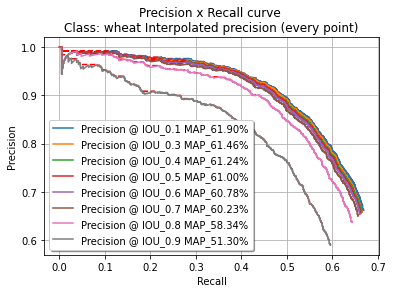

In [ ]:
###########################################################################################
#                                                                                         #
# This sample shows how to evaluate object detections applying the following metrics:     #
#  * Precision x Recall curve       ---->       used by VOC PASCAL 2012)                  #
#  * Average Precision (AP)         ---->       used by VOC PASCAL 2012)                  #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Oct 9th 2018                                                 #
###########################################################################################

import argparse
import glob
import os
import shutil
# from argparse import RawTextHelpFormatter
import sys

# Validate formats
def ValidateFormats(argFormat, argName, errors):
    if argFormat == 'xywh':
        return BBFormat.XYWH
    elif argFormat == 'xyrb':
        return BBFormat.XYX2Y2
    elif argFormat is None:
        return BBFormat.XYWH  # default when nothing is passed
    else:
        errors.append(
            'argument %s: invalid value. It must be either \'xywh\' or \'xyrb\'' % argName)


# Validate mandatory args
def ValidateMandatoryArgs(arg, argName, errors):
    if arg is None:
        errors.append('argument %s: required argument' % argName)
    else:
        return True


def ValidateImageSize(arg, argName, argInformed, errors):
    errorMsg = 'argument %s: required argument if %s is relative' % (argName, argInformed)
    ret = None
    if arg is None:
        errors.append(errorMsg)
    else:
        arg = arg.replace('(', '').replace(')', '')
        args = arg.split(',')
        if len(args) != 2:
            errors.append(
                '%s. It must be in the format \'width,height\' (e.g. \'600,400\')' % errorMsg)
        else:
            if not args[0].isdigit() or not args[1].isdigit():
                errors.append(
                    '%s. It must be in INdiaTEGER the format \'width,height\' (e.g. \'600,400\')' %
                    errorMsg)
            else:
                ret = (int(args[0]), int(args[1]))
    return ret


# Validate coordinate types
def ValidateCoordinatesTypes(arg, argName, errors):
    if arg == 'abs':
        return CoordinatesType.Absolute
    elif arg == 'rel':
        return CoordinatesType.Relative
    elif arg is None:
        return CoordinatesType.Absolute  # default when nothing is passed
    errors.append('argument %s: invalid value. It must be either \'rel\' or \'abs\'' % argName)


def ValidatePaths(arg, nameArg, errors):
    if arg is None:
        errors.append('argument %s: invalid directory' % nameArg)
    elif os.path.isdir(arg) is False and os.path.isdir(os.path.join(currentPath, arg)) is False:
        errors.append('argument %s: directory does not exist \'%s\'' % (nameArg, arg))
    # elif os.path.isdir(os.path.join(currentPath, arg)) is True:
    #     arg = os.path.join(currentPath, arg)
    else:
        arg = os.path.join(currentPath, arg)
    return arg


def getBoundingBoxes(directory,
                     isGT,
                     bbFormat,
                     coordType,
                     allBoundingBoxes=None,
                     allClasses=None,
                     imgSize=(0, 0)):
    """Read txt files containing bounding boxes (ground truth and detections)."""
    if allBoundingBoxes is None:
        allBoundingBoxes = BoundingBoxes()
    if allClasses is None:
        allClasses = []
    # Read ground truths
    os.chdir(directory)
    files = glob.glob("*.txt")
    files.sort()
    # Read GT detections from txt file
    # Each line of the files in the groundtruths folder represents a ground truth bounding box
    # (bounding boxes that a detector should detect)
    # Each value of each line is  "class_id, x, y, width, height" respectively
    # Class_id represents the class of the bounding box
    # x, y represents the most top-left coordinates of the bounding box
    # x2, y2 represents the most bottom-right coordinates of the bounding box
    for f in files:
        nameOfImage = f.replace(".txt", "")
        fh1 = open(f, "r")
        for line in fh1:
            line = line.replace("\n", "")
            if line.replace(' ', '') == '':
                continue
            splitLine = line.split(" ")
            if isGT:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                x = float(splitLine[1])
                y = float(splitLine[2])
                w = float(splitLine[3])
                h = float(splitLine[4])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.GroundTruth,
                    format=bbFormat)
            else:
                # idClass = int(splitLine[0]) #class
                idClass = (splitLine[0])  # class
                confidence = float(splitLine[1])
                x = float(splitLine[2])
                y = float(splitLine[3])
                w = float(splitLine[4])
                h = float(splitLine[5])
                bb = BoundingBox(
                    nameOfImage,
                    idClass,
                    x,
                    y,
                    w,
                    h,
                    coordType,
                    imgSize,
                    BBType.Detected,
                    confidence,
                    format=bbFormat)
            allBoundingBoxes.addBoundingBox(bb)
            if idClass not in allClasses:
                allClasses.append(idClass)
        fh1.close()
    return allBoundingBoxes, allClasses

# Get current path to set default folders
# currentPath = os.path.dirname(os.path.abspath(__file__))
currentPath = output_dir

VERSION = '0.1 (beta)'

parser = argparse.ArgumentParser(
    prog='Object Detection Metrics - Pascal VOC',
    description='This project applies the most popular metrics used to evaluate object detection '
    'algorithms.\nThe current implemention runs the Pascal VOC metrics.\nFor further references, '
    'please check:\nhttps://github.com/rafaelpadilla/Object-Detection-Metrics',
    epilog="Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)")
# formatter_class=RawTextHelpFormatter)
parser.add_argument('-v', '--version', action='version', version='%(prog)s ' + VERSION)
# Positional arguments
# Mandatory
parser.add_argument(
    '-gt',
    '--gtfolder',
    dest='gtFolder',
    default=os.path.join(currentPath, 'groundtruths'),
    metavar='',
    help='folder containing your ground truth bounding boxes')
parser.add_argument(
    '-det',
    '--detfolder',
    dest='detFolder',
    default=os.path.join(currentPath, 'detections'),
    metavar='',
    help='folder containing your detected bounding boxes')
# Optional
parser.add_argument(
    '-t',
    '--threshold',
    dest='iouThreshold',
    type=float,
    default=0.5,
    metavar='',
    help='IOU threshold. Default 0.5')
parser.add_argument(
    '-gtformat',
    dest='gtFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the ground truth bounding boxes: '
    '(\'xywh\': <left> <top> <width> <height>)'
    ' or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-detformat',
    dest='detFormat',
    metavar='',
    default='xywh',
    help='format of the coordinates of the detected bounding boxes '
    '(\'xywh\': <left> <top> <width> <height>) '
    'or (\'xyrb\': <left> <top> <right> <bottom>)')
parser.add_argument(
    '-gtcoords',
    dest='gtCoordinates',
    default='abs',
    metavar='',
    help='reference of the ground truth bounding box coordinates: absolute '
    'values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-detcoords',
    default='abs',
    dest='detCoordinates',
    metavar='',
    help='reference of the ground truth bounding box coordinates: '
    'absolute values (\'abs\') or relative to its image size (\'rel\')')
parser.add_argument(
    '-imgsize',
    dest='imgSize',
    metavar='',
    help='image size. Required if -gtcoords or -detcoords are \'rel\'')
parser.add_argument(
    '-sp', '--savepath', dest='savePath', metavar='', help='folder where the plots are saved')
parser.add_argument(
    '-np',
    '--noplot',
    dest='showPlot',
    action='store_false',
    help='no plot is shown during execution')
# args = parser.parse_args()
args = parser.parse_args(['--det', dt_dir, '--gt', gt_dir, '--t', '0.1'])

iouThreshold = args.iouThreshold

# Arguments validation
errors = []
# Validate formats
gtFormat = ValidateFormats(args.gtFormat, '-gtformat', errors)
detFormat = ValidateFormats(args.detFormat, '-detformat', errors)
# Groundtruth folder
if ValidateMandatoryArgs(args.gtFolder, '-gt/--gtfolder', errors):
    gtFolder = ValidatePaths(args.gtFolder, '-gt/--gtfolder', errors)
else:
    # errors.pop()
    gtFolder = os.path.join(currentPath, 'groundtruths')
    if os.path.isdir(gtFolder) is False:
        errors.append('folder %s not found' % gtFolder)
# Coordinates types
gtCoordType = ValidateCoordinatesTypes(args.gtCoordinates, '-gtCoordinates', errors)
detCoordType = ValidateCoordinatesTypes(args.detCoordinates, '-detCoordinates', errors)
imgSize = (0, 0)
if gtCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-gtCoordinates', errors)
if detCoordType == CoordinatesType.Relative:  # Image size is required
    imgSize = ValidateImageSize(args.imgSize, '-imgsize', '-detCoordinates', errors)
# Detection folder
if ValidateMandatoryArgs(args.detFolder, '-det/--detfolder', errors):
    detFolder = ValidatePaths(args.detFolder, '-det/--detfolder', errors)
else:
    # errors.pop()
    detFolder = os.path.join(currentPath, 'detections')
    if os.path.isdir(detFolder) is False:
        errors.append('folder %s not found' % detFolder)
if args.savePath is not None:
    savePath = ValidatePaths(args.savePath, '-sp/--savepath', errors)
else:
    savePath = os.path.join(currentPath, 'results')
# Validate savePath
# If error, show error messages
if len(errors) != 0:
    print("""usage: Object Detection Metrics [-h] [-v] [-gt] [-det] [-t] [-gtformat]
                                [-detformat] [-save]""")
    print('Object Detection Metrics: error(s): ')
    [print(e) for e in errors]
    sys.exit()

methodtoApply = MethodAveragePrecision.EveryPointInterpolation #EveryPointInterpolation, #ElevenPointInterpolation

savePath = "{}/{}".format(output_dir, methodtoApply)
# Create directory to save results
shutil.rmtree(savePath, ignore_errors=True)  # Clear folder
os.makedirs(savePath)
# Show plot during execution
showPlot = args.showPlot

print('iouThreshold= %f' % iouThreshold)
print('savePath = %s' % savePath)
print('gtFormat = %s' % gtFormat)
print('detFormat = %s' % detFormat)
print('gtFolder = %s' % gtFolder)
print('detFolder = %s' % detFolder)
print('gtCoordType = %s' % gtCoordType)
print('detCoordType = %s' % detCoordType)
print('showPlot %s' % showPlot)
print('method: '+str(methodtoApply))

# Get groundtruth boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    gtFolder, True, gtFormat, gtCoordType, imgSize=imgSize)
# Get detected boxes
allBoundingBoxes, allClasses = getBoundingBoxes(
    detFolder, False, detFormat, detCoordType, allBoundingBoxes, allClasses, imgSize=imgSize)
allClasses.sort()

evaluator = Evaluator()
acc_AP = 0
validClasses = 0

iouThresholds = [0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Plot Precision x Recall curve
evaluator.PlotPrecisionRecallCurve(
    allBoundingBoxes,  # Object containing all bounding boxes (ground truths and detections)
    IOUThresholds=iouThresholds,  # IOU threshold
    method=methodtoApply,
    showAP=True,  # Show Average Precision in the title of the plot
    showInterpolatedPrecision=True,  # Don't plot the interpolated precision curve
    savePath=savePath,
    showGraphic=showPlot)


### THE END
